# Pokemon Generator
## Dataset Creation

In [69]:
from __future__ import print_function, division

from keras.layers import Input, Dense, Reshape, Flatten, Dropout, MaxPooling2D
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam
from tqdm import tqdm
from keras.utils import to_categorical


import matplotlib.pyplot as plt
import sys
import numpy as np

from PIL import Image
import os 



In [70]:
images = []

path = "Dataset/smol/"
colour = [255,255,255]
temp_training_data = []
name_label_data = []
img_size = 60

for img in os.listdir(path):
    
    if(img[-4:].lower() == ".png" or img[-4:].lower() == ".jpg"):
        image = np.array(Image.open(path + img).convert("RGBA").resize((img_size,img_size)))
        r, g, b, a = np.rollaxis(image, axis=-1)
        r[a == 0] = colour[0]
        g[a == 0] = colour[1]
        b[a == 0] = colour[2] 
        image = np.dstack([r, g, b])
        
        temp_training_data.append(image)
        name_label_data.append(img[:-4])
        if("-" in name_label_data[-1]):
            name_label_data[-1] = name_label_data[-1][:name_label_data[-1].find("-")]
            
        temp_training_data.append(np.fliplr(image))
        name_label_data.append(img[:-4])
        
        # Remove hypens from names
        if("-" in name_label_data[-1]):
            name_label_data[-1] = name_label_data[-1][:name_label_data[-1].find("-")]
            
        temp_training_data.append(np.flipud(image))
        name_label_data.append(img[:-4])
        
        # Remove hypens from names
        if("-" in name_label_data[-1]):
            name_label_data[-1] = name_label_data[-1][:name_label_data[-1].find("-")]
        
        temp_training_data.append(np.fliplr(np.flipud(image)))
        name_label_data.append(img[:-4])
        
        # Remove hypens from names
        if("-" in name_label_data[-1]):
            name_label_data[-1] = name_label_data[-1][:name_label_data[-1].find("-")]
        
training_data = np.array(temp_training_data).reshape(-1, img_size, img_size, 3)

In [71]:
# Add alt dataset


path = "Dataset/alt/"


for img in os.listdir(path):
    
    if(img[-4:].lower() == ".png" or img[-4:].lower() == ".jpg"):
        image = np.array(Image.open(path + img).convert("RGBA").resize((img_size,img_size)))
        r, g, b, a = np.rollaxis(image, axis=-1)
        r[a == 0] = colour[0]
        g[a == 0] = colour[1]
        b[a == 0] = colour[2] 
        image = np.dstack([r, g, b])
        
        temp_training_data.append(image)
        name_label_data.append(img[:-4])
        if("-" in name_label_data[-1]):
            name_label_data[-1] = name_label_data[-1][:name_label_data[-1].find("-")]
            
        temp_training_data.append(np.fliplr(image))
        name_label_data.append(img[:-4])
        
        # Remove hypens from names
        if("-" in name_label_data[-1]):
            name_label_data[-1] = name_label_data[-1][:name_label_data[-1].find("-")]
            
        temp_training_data.append(np.flipud(image))
        name_label_data.append(img[:-4])
        
        # Remove hypens from names
        if("-" in name_label_data[-1]):
            name_label_data[-1] = name_label_data[-1][:name_label_data[-1].find("-")]
        
        temp_training_data.append(np.fliplr(np.flipud(image)))
        name_label_data.append(img[:-4])
        
        # Remove hypens from names
        if("-" in name_label_data[-1]):
            name_label_data[-1] = name_label_data[-1][:name_label_data[-1].find("-")]
        
training_data = np.array(temp_training_data).reshape(-1, img_size, img_size, 3)

In [72]:
# Add extra dataset

path = "Dataset/extra/"

for img in os.listdir(path):
    
    if(img[-4:].lower() == ".png" or img[-4:].lower() == ".jpg"):
        image = np.array(Image.open(path + img).convert("RGBA").resize((img_size,img_size)))
        r, g, b, a = np.rollaxis(image, axis=-1)
        r[a == 0] = colour[0]
        g[a == 0] = colour[1]
        b[a == 0] = colour[2] 
        image = np.dstack([r, g, b])
        
        temp_training_data.append(image)
        name_label_data.append(img[:-4])
        if("-" in name_label_data[-1]):
            name_label_data[-1] = name_label_data[-1][:name_label_data[-1].find("-")]
        if(" " in name_label_data[-1]):
            name_label_data[-1] = name_label_data[-1][:name_label_data[-1].find(" ")]
            
        temp_training_data.append(np.fliplr(image))
        name_label_data.append(img[:-4])
        
        # Remove hypens from names
        if("-" in name_label_data[-1]):
            name_label_data[-1] = name_label_data[-1][:name_label_data[-1].find("-")]
        if(" " in name_label_data[-1]):
            name_label_data[-1] = name_label_data[-1][:name_label_data[-1].find(" ")]    
            
            
        temp_training_data.append(np.flipud(image))
        name_label_data.append(img[:-4])
        
        # Remove hypens from names
        if("-" in name_label_data[-1]):
            name_label_data[-1] = name_label_data[-1][:name_label_data[-1].find("-")]
        if(" " in name_label_data[-1]):
            name_label_data[-1] = name_label_data[-1][:name_label_data[-1].find(" ")]
            
        temp_training_data.append(np.fliplr(np.flipud(image)))
        name_label_data.append(img[:-4])
        
        # Remove hypens from names
        if("-" in name_label_data[-1]):
            name_label_data[-1] = name_label_data[-1][:name_label_data[-1].find("-")]
        if(" " in name_label_data[-1]):
            name_label_data[-1] = name_label_data[-1][:name_label_data[-1].find(" ")]
training_data = np.array(temp_training_data).reshape(-1, img_size, img_size, 3)


In [73]:
datasplit = int(len(training_data)*0.90)
x_train = training_data[:datasplit]
x_test = training_data[datasplit:]
print(training_data.shape)

(12820, 60, 60, 3)


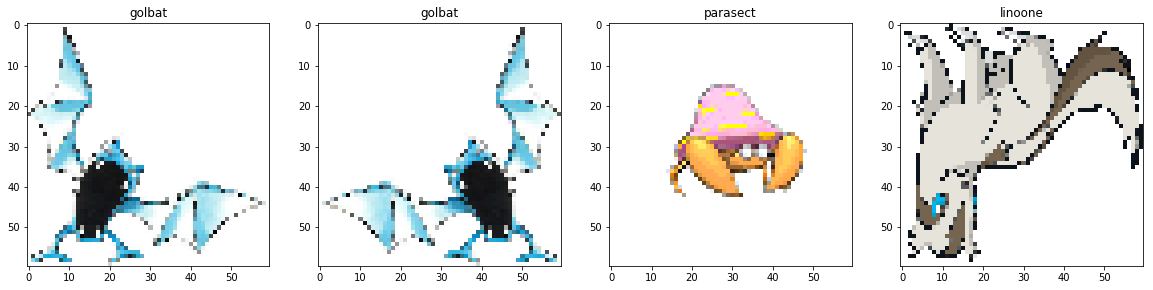

In [74]:
plt.figure(figsize=(20, 5))
plt.subplot(1,4,1)
plt.title(name_label_data[-1])
plt.imshow(image)


plt.subplot(1,4,2)
plt.title(name_label_data[-3])
plt.imshow(training_data[-3])


plt.subplot(1,4,3)
plt.title(name_label_data[1])
plt.imshow(x_train[1])

plt.subplot(1,4,4)
plt.title(name_label_data[datasplit])
plt.imshow(x_test[0])
plt.show()


In [75]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
#x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
#x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(11538, 60, 60, 3)
(1282, 60, 60, 3)


## Extracting Stats

In [76]:
poke_id = []
name = []
type1 = []
type2 = []
total = []
hp = []
attack = []
defence = []
sp_attack = []
sp_defence = []
speed = []
gen = []
legendary = []

filepath = 'Dataset/pokemon.csv'

In [77]:
import csv
# 809 pokemon 
last_id = 999

with open(filepath) as pokemon_vals:
    row_pokemon = csv.DictReader(pokemon_vals)
    for idx, row in enumerate(row_pokemon):
        if(row['#'] != last_id):
            last_id = row['#']
            poke_id.append(row['#'])
            name.append(row['Name'])
            type1.append(row['Type 1'])

            if(row['Type 2'] != ""):
                type2.append(row['Type 2'])
            else:
                type2.append(row['Type 1'])

            if(row['Total'] != ""):
                total.append(row['Total'])
            else:
                total.append(-1)

            if(row['HP'] != ""):
                hp.append(row['HP'])
            else:
                hp.append(-1)

            if(row['Attack'] != ""):
                attack.append(row['Attack'])
            else:
                attack.append(-1)

            if(row['Defense'] != ""):
                defence.append(row['Defense'])
            else:
                defence.append(-1)   

            if(row['Sp. Atk'] != ""):
                sp_attack.append(row['Sp. Atk'])
            else:
                sp_attack.append(-1)

            if(row['Sp. Def'] != ""):
                sp_defence.append(row['Sp. Def'])
            else:
                sp_defence.append(-1)

            if(row['Speed'] != ""):
                speed.append(row['Speed'])
            else:
                speed.append(-1)

            if(row['Generation'] != ""):
                gen.append(row['Generation'])
            else:
                gen.append(-1)

            if(row['Legendary'] != ""):
                legendary.append(row['Legendary'])
            else:
                legendary.append(-1)
            
        


In [78]:
for x in range(1):
    print(poke_id[x])
    print(name[x])
    print(type1[x])
    print(type2[x])
    print(total[x])
    print(hp[x])
    print(attack[x])
    print(defence[x])
    print(sp_attack[x])
    print(sp_defence[x])
    print(speed[x])
    print(gen[x])
    print(legendary[x])
    print()

1
Bulbasaur
Grass
Poison
318
45
49
49
65
65
45
1
False



In [79]:
if(len(name) == len(name_label_data)):
    print("True")


In [80]:
id_label_data = []

# loop through name labels 
# compare name in csv to name label - loop through all names in csv
# if match append poke_id to id_label_data
found = 0
for x in range(len(name_label_data)):
    found = 0
    #print(name_label_data[x])
    try:
        #print("Trying to convert name to int")
        nameid = int(name_label_data[x])
        #print(nameid)
    except:
        #print("name conversion failed")
        #print(name_label_data[x])
        for y in range(len(name)):
            if(name_label_data[x] in name[y].lower()):
                found = 1
                id_label_data.append(y+1)
                break
    else:
        #print("name conversion succeded")
        #print(name_label_data[x])
        for y in range(len(name)):
            if(nameid == int(poke_id[y])):
                found = 1
                id_label_data.append(y+1)
                #print(name_label_data[x])
                break
            
    if(found == 0):
        print(name_label_data[x])
    

In [81]:
print(len(id_label_data))

12820


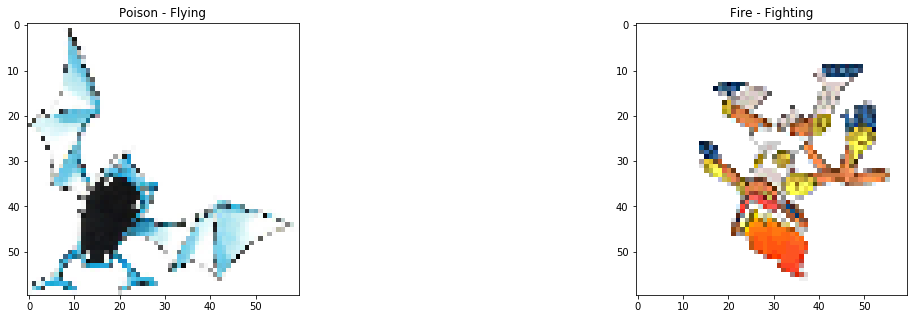

In [82]:
plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
plt.title(str(type1[id_label_data[-1]-1]) + " - " + str(type2[id_label_data[-1]-1]))
plt.imshow(image)


plt.subplot(1,2,2)
plt.title(str(type1[id_label_data[62]-1]) + " - " + str(type2[id_label_data[62]-1]))
plt.imshow(training_data[62])
plt.show()

In [112]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

label_data = []
one_hot_labels = []


types = ["Bug","Dark","Dragon","Electric","Fairy","Fighting",
        "Fire","Flying","Ghost","Grass","Ground","Ice",
        "Normal","Poison","Psychic","Rock","Steel","Water"]

for x in range(len(training_data)):
    for y in range(len(types)):
        #label_data.append(type1[id_label_data[x]-1])
        if(type1[id_label_data[x]-1] == types[y]):
            label_data.append(y)

counter = 0
for x in range(len(id_label_data)):
    found = 0
    #print("ID: " + str(id_label_data[x]))
    #print("Name: " + str(name_label_data[x]))
    #print("Type 1: " + str(type1[id_label_data[x]-1]))
    #print("Type 2: " + str(type2[id_label_data[x]-1]))
    
    for y in range(len(types)):
        if(type1[id_label_data[x]-1] == types[y]):
            temp = to_categorical(y, 18)
            if(type1[id_label_data[x]-1] != type2[id_label_data[x]-1]):
               # print("Test")
                for z in range(len(types)):
                    #print(str(type2[id_label_data[z]-1]) + " ---- " + str(types[z]))
                    if(type2[id_label_data[x]-1] == types[z]):
                        #print("Test2")
                        temp2 = to_categorical(z, 18)
                        temp = temp + temp2
                        print(temp)
            
            one_hot_labels.append(temp)
            found = 1
    #print(temp)
    #print()
    if(found==0):
        print("error")
    counter += 1
    
y_train = np.zeros((x_train.shape[0], 18))
y_test = np.zeros((x_test.shape[0], 18))
for x in range(y_train.shape[0]):
    for y in range(y_train.shape[1]):
        y_train[x][y] = one_hot_labels[x][y]
    
for x in range(y_test.shape[0]):
    for y in range(y_test.shape[1]):
        y_test[x][y] = one_hot_labels[x_train.shape[0]+x][y]

[1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.

[0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.

[0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0.

[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.

[0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.

[1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.

[0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

[1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.

## Building the CNN

In [113]:
channels = 3
img_shape = (img_size, img_size, channels)
num_classes = 18
print(y_train.shape)
print(x_train.shape)

(11538, 18)
(11538, 60, 60, 3)


In [114]:
for x in range(100):
    if(x%4==0):
        print(y_train[x])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.

In [115]:
def create_model():
    model = Sequential()
    model.add(Conv2D(64, kernel_size=3, activation="relu", input_shape=img_shape))
    model.add(Conv2D(32, kernel_size=3, activation="relu"))
    model.add(Flatten())
    model.add(Dense(num_classes, activation="softmax"))
    
    return model

In [116]:
def create_model2():
    model = Sequential()
    model.add(Conv2D(64, (3, 3), input_shape=img_shape))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (3, 3)))
    model.add(Activation('relu'))
    model.add(Conv2D(128, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(1024))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    return model

In [117]:
def create_model3():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=img_shape))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    return model

In [118]:
model = create_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, batch_size=64)

Train on 11538 samples, validate on 1282 samples
Epoch 1/50
11538/11538 [==============================] - 109s 9ms/step - loss: 4.1965 - acc: 0.1363 - val_loss: 3.9328 - val_acc: 0.1778
Epoch 2/50
11538/11538 [==============================] - 109s 9ms/step - loss: 3.7937 - acc: 0.2208 - val_loss: 3.8235 - val_acc: 0.1927
Epoch 3/50
11538/11538 [==============================] - 110s 10ms/step - loss: 3.0661 - acc: 0.3677 - val_loss: 4.0792 - val_acc: 0.2051
Epoch 4/50
11538/11538 [==============================] - 117s 10ms/step - loss: 2.2219 - acc: 0.5557 - val_loss: 4.7963 - val_acc: 0.2012
Epoch 5/50
11538/11538 [==============================] - 111s 10ms/step - loss: 1.9720 - acc: 0.6431 - val_loss: 4.7413 - val_acc: 0.2129
Epoch 6/50
11538/11538 [==============================] - 104s 9ms/step - loss: 1.6934 - acc: 0.6805 - val_loss: 5.1041 - val_acc: 0.2223
Epoch 7/50
11538/11538 [==============================] - 110s 10ms/step - loss: 1.6118 - acc: 0.7069 - val_loss: 5.1502

In [119]:
model = create_model2()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history2 = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, batch_size=64)

Train on 11538 samples, validate on 1282 samples
Epoch 1/50
11538/11538 [==============================] - 305s 26ms/step - loss: 4.2614 - acc: 0.0802 - val_loss: 4.0565 - val_acc: 0.0928
Epoch 2/50
 1856/11538 [===>..........................] - ETA: 3:57 - loss: 4.2355 - acc: 0.1153

KeyboardInterrupt: 

In [ ]:
model = create_model3()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history3 = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, batch_size=64)

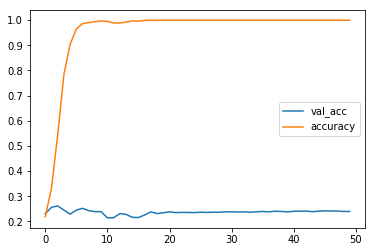

In [91]:
#plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_acc'], label='val_acc')
plt.plot(history.history['acc'], label= 'accuracy')
plt.legend()
#plt.ylim(0,1)
plt.show()


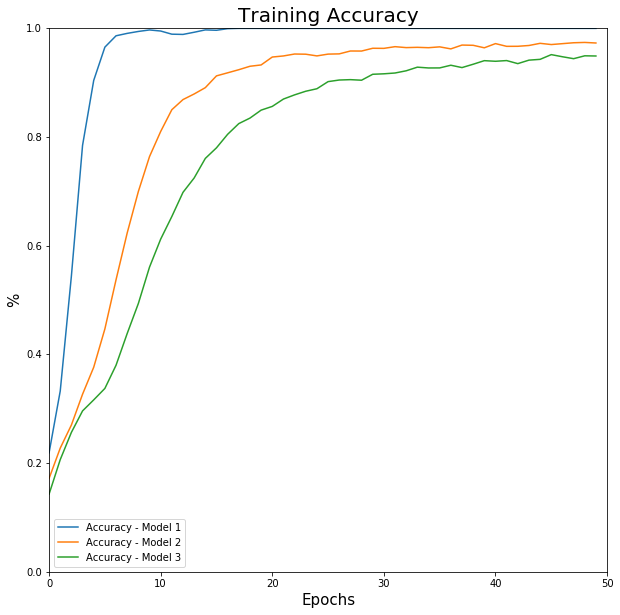

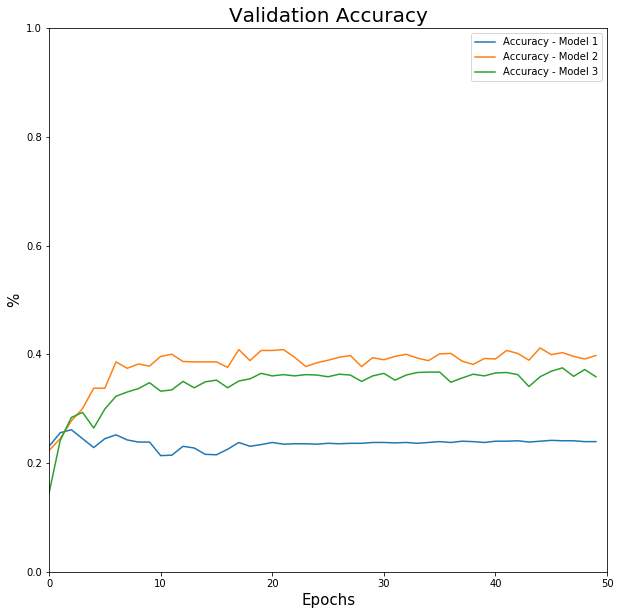

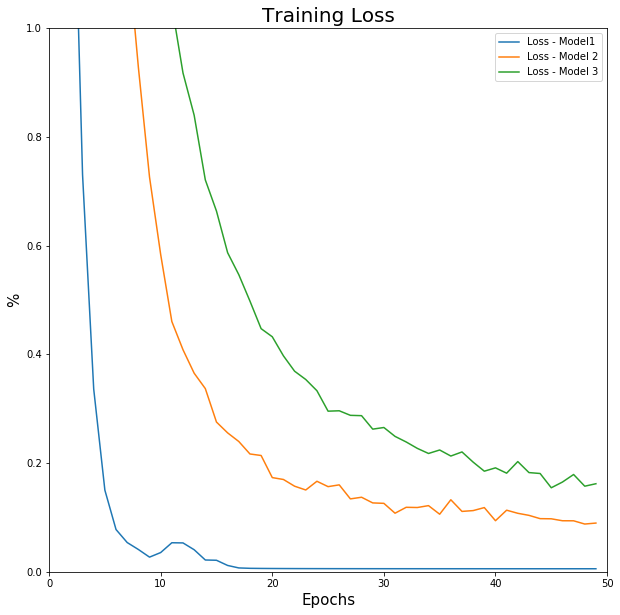

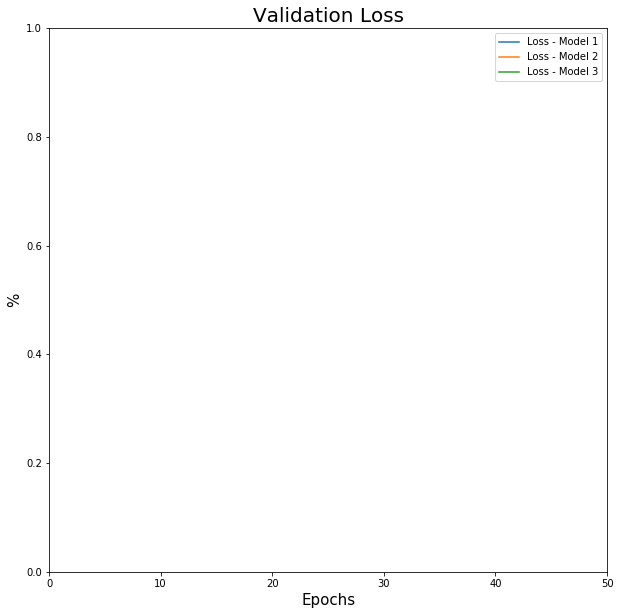

In [95]:
# plot testing accuracy
plt.figure(2, figsize=(10,10))
ax1 = plt.subplot(1, 1, 1)

ax1.plot(history.history['acc'], label='Accuracy - Model 1')
ax1.plot(history2.history['acc'], label='Accuracy - Model 2')
ax1.plot(history3.history['acc'], label='Accuracy - Model 3')

plt.xlabel('Epochs', size=15)
plt.ylabel('%', size=15)
plt.title('Training Accuracy', size=20)
plt.ylim(0, 1)
plt.xlim(0, 50)
plt.legend()
plt.show()


# plot validation accuracy
plt.figure(2, figsize=(10,10))
ax2 = plt.subplot(1, 1, 1)
ax2.plot(history.history['val_acc'], label='Accuracy - Model 1')
ax2.plot(history2.history['val_acc'], label='Accuracy - Model 2')
ax2.plot(history3.history['val_acc'], label='Accuracy - Model 3')

plt.xlabel('Epochs', size=15)
plt.ylabel('%', size=15)
plt.title('Validation Accuracy', size=20)
plt.ylim(0, 1)
plt.xlim(0, 50)
plt.legend()
plt.show()

# plot testing loss
plt.figure(2, figsize=(10,10))
ax2 = plt.subplot(1, 1, 1)
ax2.plot(history.history['loss'], label='Loss - Model1')
ax2.plot(history2.history['loss'], label='Loss - Model 2')
ax2.plot(history3.history['loss'], label='Loss - Model 3')

plt.xlabel('Epochs', size=15)
plt.ylabel('%', size=15)
plt.title('Training Loss', size=20)
plt.ylim(0, 1)
plt.xlim(0, 50)
plt.legend()
plt.show()


# plot testing loss
plt.figure(2, figsize=(10,10))
ax2 = plt.subplot(1, 1, 1)
ax2.plot(history.history['val_loss'], label='Loss - Model 1')
ax2.plot(history2.history['val_loss'], label='Loss - Model 2')
ax2.plot(history3.history['val_loss'], label='Loss - Model 3')

plt.xlabel('Epochs', size=15)
plt.ylabel('%', size=15)
plt.title('Validation Loss', size=20)
plt.ylim(0, 1)
plt.xlim(0, 50)
plt.legend()
plt.show()


## Building the GAN

In [203]:
#Specify parameters of the training dataset
latent_dim = 100
x_train_gan = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test_gan = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [204]:
def adam_optimizer():
    return Adam(lr=0.0002, beta_1=0.5)

In [205]:
def create_generator():
    generator=Sequential()
    generator.add(Dense(units=256,input_dim=100))
    generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(units=512))
    generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(units=1024))
    generator.add(LeakyReLU(0.2))
    '''
    generator.add(Dense(units=1024*2))
    generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(units=1024*4))
    generator.add(LeakyReLU(0.2))
    '''
    generator.add(Dense(units=np.prod(img_shape), activation='tanh'))
    
    generator.compile(loss='binary_crossentropy', optimizer=adam_optimizer())
    return generator


g = create_generator()
g.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_25 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
dense_55 (Dense)             (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_26 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dense_56 (Dense)             (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_27 (LeakyReLU)   (None, 1024)              0         
_________________________________________________________________
dense_57 (Dense)             (None, 10800)             11070000  
Total para

In [206]:
def create_discriminator():
    discriminator=Sequential()
    '''
    discriminator.add(Dense(units=1024*4,input_dim=np.prod(img_shape)))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))
    
    discriminator.add(Dense(units=1024*2))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))
    '''
    discriminator.add(Dense(units=1024,input_dim=np.prod(img_shape)))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))
       
    
    discriminator.add(Dense(units=512))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))
       
    discriminator.add(Dense(units=256))
    discriminator.add(LeakyReLU(0.2))
    
    discriminator.add(Dense(units=1, activation='sigmoid'))
    
    discriminator.compile(loss='binary_crossentropy', optimizer=adam_optimizer())
    return discriminator
d = create_discriminator()
d.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_58 (Dense)             (None, 1024)              11060224  
_________________________________________________________________
leaky_re_lu_28 (LeakyReLU)   (None, 1024)              0         
_________________________________________________________________
dropout_39 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_59 (Dense)             (None, 512)               524800    
_________________________________________________________________
leaky_re_lu_29 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dropout_40 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_60 (Dense)             (None, 256)               131328    
__________

In [207]:
def create_gan(discriminator, generator):
    discriminator.trainable=False
    gan_input = Input(shape=(100,))
    x = generator(gan_input)
    gan_output= discriminator(x)
    gan= Model(inputs=gan_input, outputs=gan_output)
    gan.compile(loss='binary_crossentropy', optimizer='adam')
    return gan
gan = create_gan(d,g)
gan.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 100)               0         
_________________________________________________________________
sequential_20 (Sequential)   (None, 10800)             11752752  
_________________________________________________________________
sequential_21 (Sequential)   (None, 1)                 11716609  
Total params: 23,469,361
Trainable params: 11,752,752
Non-trainable params: 11,716,609
_________________________________________________________________


In [208]:
def plot_generated_images(epoch, generator, examples=100, dim=(10,10), figsize=(10,10)):
    noise= np.random.normal(loc=0, scale=1, size=[examples, 100])
    generated_images = generator.predict(noise)
    generated_images = generated_images.reshape(100,img_size,img_size,3)
    plt.figure(figsize=figsize)
    for i in range(generated_images.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generated_images[i], interpolation='nearest')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig('gan_generated_image %d.png' %epoch)

In [209]:
def training(epochs=1, batch_size=128):
    
    #Loading the data
    batch_count = x_train_gan.shape[0] / batch_size
    
    # Creating GAN
    generator= create_generator()
    discriminator= create_discriminator()
    gan = create_gan(discriminator, generator)
    
    for e in range(1,epochs+1 ):
        print("Epoch %d" %e)
        for _ in tqdm(range(batch_size)):
        #generate  random noise as an input  to  initialize the  generator
            noise= np.random.normal(0,1, [batch_size, 100])
            
            # Generate fake MNIST images from noised input
            generated_images = generator.predict(noise)
            
            # Get a random set of  real images
            image_batch =x_train_gan[np.random.randint(low=0,high=x_train.shape[0],size=batch_size)]
            
            #Construct different batches of  real and fake data 
            X= np.concatenate([image_batch, generated_images])
            
            # Labels for generated and real data
            y_dis=np.zeros(2*batch_size)
            y_dis[:batch_size]=0.9
            
            #Pre train discriminator on  fake and real data  before starting the gan. 
            discriminator.trainable=True
            discriminator.train_on_batch(X, y_dis)
            
            #Tricking the noised input of the Generator as real data
            noise= np.random.normal(0,1, [batch_size, 100])
            y_gen = np.ones(batch_size)
            
            # During the training of gan, 
            # the weights of discriminator should be fixed. 
            #We can enforce that by setting the trainable flag
            discriminator.trainable=False
            
            #training  the GAN by alternating the training of the Discriminator 
            #and training the chained GAN model with Discriminator’s weights freezed.
            gan.train_on_batch(noise, y_gen)
            
        if e == 1 or e % 20 == 0:
           
            plot_generated_images(e, generator)
            
training(2880,128)

Epoch 1


100%|██████████| 128/128 [00:09<00:00, 13.00it/s]


Epoch 2


100%|██████████| 128/128 [00:05<00:00, 21.86it/s]


Epoch 3


100%|██████████| 128/128 [00:05<00:00, 23.03it/s]


Epoch 4


100%|██████████| 128/128 [00:05<00:00, 22.15it/s]


Epoch 5


100%|██████████| 128/128 [00:05<00:00, 21.57it/s]


Epoch 6


100%|██████████| 128/128 [00:05<00:00, 22.53it/s]


Epoch 7


100%|██████████| 128/128 [00:05<00:00, 22.39it/s]


Epoch 8


100%|██████████| 128/128 [00:05<00:00, 21.56it/s]


Epoch 9


100%|██████████| 128/128 [00:05<00:00, 21.78it/s]


Epoch 10


100%|██████████| 128/128 [00:06<00:00, 20.40it/s]


Epoch 11


100%|██████████| 128/128 [00:06<00:00, 20.02it/s]


Epoch 12


100%|██████████| 128/128 [00:05<00:00, 21.98it/s]


Epoch 13


100%|██████████| 128/128 [00:05<00:00, 22.07it/s]


Epoch 14


100%|██████████| 128/128 [00:05<00:00, 21.48it/s]


Epoch 15


100%|██████████| 128/128 [00:05<00:00, 21.99it/s]


Epoch 16


100%|██████████| 128/128 [00:05<00:00, 21.99it/s]


Epoch 17


100%|██████████| 128/128 [00:05<00:00, 22.32it/s]


Epoch 18


100%|██████████| 128/128 [00:05<00:00, 22.48it/s]


Epoch 19


100%|██████████| 128/128 [00:05<00:00, 21.94it/s]


Epoch 20


100%|██████████| 128/128 [00:05<00:00, 23.32it/s]


Epoch 21


100%|██████████| 128/128 [00:05<00:00, 22.90it/s]


Epoch 22


100%|██████████| 128/128 [00:05<00:00, 22.15it/s]


Epoch 23


100%|██████████| 128/128 [00:05<00:00, 22.02it/s]


Epoch 24


100%|██████████| 128/128 [00:05<00:00, 22.58it/s]


Epoch 25


100%|██████████| 128/128 [00:05<00:00, 22.40it/s]


Epoch 26


100%|██████████| 128/128 [00:05<00:00, 21.61it/s]


Epoch 27


100%|██████████| 128/128 [00:05<00:00, 22.96it/s]


Epoch 28


100%|██████████| 128/128 [00:05<00:00, 22.76it/s]


Epoch 29


100%|██████████| 128/128 [00:05<00:00, 22.93it/s]


Epoch 30


100%|██████████| 128/128 [00:05<00:00, 23.28it/s]


Epoch 31


100%|██████████| 128/128 [00:05<00:00, 22.28it/s]


Epoch 32


100%|██████████| 128/128 [00:05<00:00, 23.18it/s]


Epoch 33


100%|██████████| 128/128 [00:05<00:00, 22.89it/s]


Epoch 34


100%|██████████| 128/128 [00:05<00:00, 21.94it/s]


Epoch 35


100%|██████████| 128/128 [00:05<00:00, 23.24it/s]


Epoch 36


100%|██████████| 128/128 [00:05<00:00, 23.08it/s]


Epoch 37


100%|██████████| 128/128 [00:05<00:00, 22.85it/s]


Epoch 38


100%|██████████| 128/128 [00:05<00:00, 23.22it/s]


Epoch 39


100%|██████████| 128/128 [00:05<00:00, 23.08it/s]


Epoch 40


100%|██████████| 128/128 [00:05<00:00, 23.04it/s]


Epoch 41


100%|██████████| 128/128 [00:05<00:00, 21.67it/s]


Epoch 42


100%|██████████| 128/128 [00:05<00:00, 22.39it/s]


Epoch 43


100%|██████████| 128/128 [00:05<00:00, 22.24it/s]


Epoch 44


100%|██████████| 128/128 [00:05<00:00, 22.37it/s]


Epoch 45


100%|██████████| 128/128 [00:05<00:00, 22.32it/s]


Epoch 46


100%|██████████| 128/128 [00:05<00:00, 22.31it/s]


Epoch 47


100%|██████████| 128/128 [00:05<00:00, 21.79it/s]


Epoch 48


100%|██████████| 128/128 [00:05<00:00, 21.38it/s]


Epoch 49


100%|██████████| 128/128 [00:05<00:00, 23.18it/s]


Epoch 50


100%|██████████| 128/128 [00:05<00:00, 23.22it/s]


Epoch 51


100%|██████████| 128/128 [00:05<00:00, 23.32it/s]


Epoch 52


100%|██████████| 128/128 [00:05<00:00, 23.30it/s]


Epoch 53


100%|██████████| 128/128 [00:05<00:00, 22.96it/s]


Epoch 54


100%|██████████| 128/128 [00:05<00:00, 22.97it/s]


Epoch 55


100%|██████████| 128/128 [00:05<00:00, 22.85it/s]


Epoch 56


100%|██████████| 128/128 [00:05<00:00, 23.18it/s]


Epoch 57


100%|██████████| 128/128 [00:05<00:00, 22.93it/s]


Epoch 58


100%|██████████| 128/128 [00:05<00:00, 23.16it/s]


Epoch 59


100%|██████████| 128/128 [00:05<00:00, 23.29it/s]


Epoch 60


100%|██████████| 128/128 [00:05<00:00, 23.36it/s]


Epoch 61


100%|██████████| 128/128 [00:05<00:00, 17.95it/s]


Epoch 62


100%|██████████| 128/128 [00:05<00:00, 22.07it/s]


Epoch 63


100%|██████████| 128/128 [00:05<00:00, 23.73it/s]


Epoch 64


100%|██████████| 128/128 [00:05<00:00, 22.64it/s]


Epoch 65


100%|██████████| 128/128 [00:05<00:00, 22.92it/s]


Epoch 66


100%|██████████| 128/128 [00:05<00:00, 22.00it/s]


Epoch 67


100%|██████████| 128/128 [00:05<00:00, 22.53it/s]


Epoch 68


100%|██████████| 128/128 [00:05<00:00, 22.61it/s]


Epoch 69


100%|██████████| 128/128 [00:05<00:00, 22.59it/s]


Epoch 70


100%|██████████| 128/128 [00:05<00:00, 22.50it/s]


Epoch 71


100%|██████████| 128/128 [00:05<00:00, 22.40it/s]


Epoch 72


100%|██████████| 128/128 [00:05<00:00, 23.00it/s]


Epoch 73


100%|██████████| 128/128 [00:05<00:00, 22.49it/s]


Epoch 74


100%|██████████| 128/128 [00:05<00:00, 22.42it/s]


Epoch 75


100%|██████████| 128/128 [00:05<00:00, 22.09it/s]


Epoch 76


100%|██████████| 128/128 [00:05<00:00, 23.28it/s]


Epoch 77


100%|██████████| 128/128 [00:05<00:00, 22.84it/s]


Epoch 78


100%|██████████| 128/128 [00:05<00:00, 20.72it/s]


Epoch 79


100%|██████████| 128/128 [00:05<00:00, 23.03it/s]


Epoch 80


100%|██████████| 128/128 [00:05<00:00, 21.98it/s]


Epoch 81


100%|██████████| 128/128 [00:05<00:00, 22.81it/s]


Epoch 82


100%|██████████| 128/128 [00:05<00:00, 21.48it/s]


Epoch 83


100%|██████████| 128/128 [00:05<00:00, 22.75it/s]


Epoch 84


100%|██████████| 128/128 [00:05<00:00, 21.67it/s]


Epoch 85


100%|██████████| 128/128 [00:05<00:00, 21.67it/s]


Epoch 86


100%|██████████| 128/128 [00:05<00:00, 22.73it/s]


Epoch 87


100%|██████████| 128/128 [00:05<00:00, 22.70it/s]


Epoch 88


100%|██████████| 128/128 [00:05<00:00, 22.97it/s]


Epoch 89


100%|██████████| 128/128 [00:05<00:00, 22.10it/s]


Epoch 90


100%|██████████| 128/128 [00:05<00:00, 22.10it/s]


Epoch 91


100%|██████████| 128/128 [00:05<00:00, 22.97it/s]


Epoch 92


100%|██████████| 128/128 [00:05<00:00, 23.58it/s]


Epoch 93


100%|██████████| 128/128 [00:05<00:00, 23.75it/s]


Epoch 94


100%|██████████| 128/128 [00:05<00:00, 23.42it/s]


Epoch 95


100%|██████████| 128/128 [00:05<00:00, 23.29it/s]


Epoch 96


100%|██████████| 128/128 [00:05<00:00, 23.15it/s]


Epoch 97


100%|██████████| 128/128 [00:05<00:00, 22.51it/s]


Epoch 98


100%|██████████| 128/128 [00:05<00:00, 22.88it/s]


Epoch 99


100%|██████████| 128/128 [00:05<00:00, 23.32it/s]


Epoch 100


100%|██████████| 128/128 [00:05<00:00, 22.46it/s]


Epoch 101


100%|██████████| 128/128 [00:05<00:00, 22.98it/s]


Epoch 102


100%|██████████| 128/128 [00:05<00:00, 23.15it/s]


Epoch 103


100%|██████████| 128/128 [00:05<00:00, 23.10it/s]


Epoch 104


100%|██████████| 128/128 [00:05<00:00, 23.45it/s]


Epoch 105


100%|██████████| 128/128 [00:05<00:00, 23.45it/s]


Epoch 106


100%|██████████| 128/128 [00:05<00:00, 22.98it/s]


Epoch 107


100%|██████████| 128/128 [00:05<00:00, 21.83it/s]


Epoch 108


100%|██████████| 128/128 [00:05<00:00, 23.17it/s]


Epoch 109


100%|██████████| 128/128 [00:05<00:00, 23.65it/s]


Epoch 110


100%|██████████| 128/128 [00:05<00:00, 23.10it/s]


Epoch 111


100%|██████████| 128/128 [00:05<00:00, 21.31it/s]


Epoch 112


100%|██████████| 128/128 [00:05<00:00, 21.93it/s]


Epoch 113


100%|██████████| 128/128 [00:05<00:00, 23.17it/s]


Epoch 114


100%|██████████| 128/128 [00:05<00:00, 23.30it/s]


Epoch 115


100%|██████████| 128/128 [00:05<00:00, 22.48it/s]


Epoch 116


100%|██████████| 128/128 [00:05<00:00, 23.29it/s]


Epoch 117


100%|██████████| 128/128 [00:05<00:00, 22.77it/s]


Epoch 118


100%|██████████| 128/128 [00:05<00:00, 23.37it/s]


Epoch 119


100%|██████████| 128/128 [00:05<00:00, 22.55it/s]


Epoch 120


100%|██████████| 128/128 [00:05<00:00, 22.58it/s]


Epoch 121


100%|██████████| 128/128 [00:05<00:00, 23.04it/s]


Epoch 122


100%|██████████| 128/128 [00:05<00:00, 23.21it/s]


Epoch 123


100%|██████████| 128/128 [00:05<00:00, 22.53it/s]


Epoch 124


100%|██████████| 128/128 [00:05<00:00, 22.21it/s]


Epoch 125


100%|██████████| 128/128 [00:05<00:00, 22.05it/s]


Epoch 126


100%|██████████| 128/128 [00:05<00:00, 21.72it/s]


Epoch 127


100%|██████████| 128/128 [00:05<00:00, 22.46it/s]


Epoch 128


100%|██████████| 128/128 [00:06<00:00, 20.50it/s]


Epoch 129


100%|██████████| 128/128 [00:05<00:00, 21.75it/s]


Epoch 130


100%|██████████| 128/128 [00:05<00:00, 21.78it/s]


Epoch 131


100%|██████████| 128/128 [00:05<00:00, 23.27it/s]


Epoch 132


100%|██████████| 128/128 [00:05<00:00, 22.95it/s]


Epoch 133


100%|██████████| 128/128 [00:05<00:00, 23.12it/s]


Epoch 134


100%|██████████| 128/128 [00:05<00:00, 22.65it/s]


Epoch 135


100%|██████████| 128/128 [00:05<00:00, 22.55it/s]


Epoch 136


100%|██████████| 128/128 [00:05<00:00, 22.70it/s]


Epoch 137


100%|██████████| 128/128 [00:05<00:00, 23.13it/s]


Epoch 138


100%|██████████| 128/128 [00:05<00:00, 22.99it/s]


Epoch 139


100%|██████████| 128/128 [00:05<00:00, 23.37it/s]


Epoch 140


100%|██████████| 128/128 [00:05<00:00, 22.81it/s]


Epoch 141


100%|██████████| 128/128 [00:05<00:00, 21.45it/s]


Epoch 142


100%|██████████| 128/128 [00:05<00:00, 22.48it/s]


Epoch 143


100%|██████████| 128/128 [00:05<00:00, 23.07it/s]


Epoch 144


100%|██████████| 128/128 [00:05<00:00, 23.10it/s]


Epoch 145


100%|██████████| 128/128 [00:05<00:00, 23.39it/s]


Epoch 146


100%|██████████| 128/128 [00:05<00:00, 23.20it/s]


Epoch 147


100%|██████████| 128/128 [00:05<00:00, 23.18it/s]


Epoch 148


100%|██████████| 128/128 [00:05<00:00, 23.42it/s]


Epoch 149


100%|██████████| 128/128 [00:05<00:00, 22.74it/s]


Epoch 150


100%|██████████| 128/128 [00:05<00:00, 22.94it/s]


Epoch 151


100%|██████████| 128/128 [00:05<00:00, 23.19it/s]


Epoch 152


100%|██████████| 128/128 [00:05<00:00, 22.60it/s]


Epoch 153


100%|██████████| 128/128 [00:05<00:00, 23.28it/s]


Epoch 154


100%|██████████| 128/128 [00:05<00:00, 22.14it/s]


Epoch 155


100%|██████████| 128/128 [00:05<00:00, 22.25it/s]


Epoch 156


100%|██████████| 128/128 [00:05<00:00, 23.31it/s]


Epoch 157


100%|██████████| 128/128 [00:05<00:00, 22.03it/s]


Epoch 158


100%|██████████| 128/128 [00:05<00:00, 22.10it/s]


Epoch 159


100%|██████████| 128/128 [00:05<00:00, 23.24it/s]


Epoch 160


100%|██████████| 128/128 [00:05<00:00, 23.06it/s]


Epoch 161


100%|██████████| 128/128 [00:05<00:00, 22.60it/s]


Epoch 162


100%|██████████| 128/128 [00:05<00:00, 21.71it/s]


Epoch 163


100%|██████████| 128/128 [00:05<00:00, 21.92it/s]


Epoch 164


100%|██████████| 128/128 [00:05<00:00, 23.21it/s]


Epoch 165


100%|██████████| 128/128 [00:05<00:00, 23.39it/s]


Epoch 166


100%|██████████| 128/128 [00:05<00:00, 21.49it/s]


Epoch 167


100%|██████████| 128/128 [00:05<00:00, 22.56it/s]


Epoch 168


100%|██████████| 128/128 [00:05<00:00, 23.18it/s]


Epoch 169


100%|██████████| 128/128 [00:05<00:00, 23.27it/s]


Epoch 170


100%|██████████| 128/128 [00:05<00:00, 23.00it/s]


Epoch 171


100%|██████████| 128/128 [00:05<00:00, 23.45it/s]


Epoch 172


100%|██████████| 128/128 [00:05<00:00, 23.15it/s]


Epoch 173


100%|██████████| 128/128 [00:05<00:00, 23.23it/s]


Epoch 174


100%|██████████| 128/128 [00:05<00:00, 22.92it/s]


Epoch 175


100%|██████████| 128/128 [00:05<00:00, 22.33it/s]


Epoch 176


100%|██████████| 128/128 [00:06<00:00, 20.81it/s]


Epoch 177


100%|██████████| 128/128 [00:05<00:00, 22.21it/s]


Epoch 178


100%|██████████| 128/128 [00:05<00:00, 22.76it/s]


Epoch 179


100%|██████████| 128/128 [00:05<00:00, 23.27it/s]


Epoch 180


100%|██████████| 128/128 [00:05<00:00, 23.32it/s]


Epoch 181


100%|██████████| 128/128 [00:05<00:00, 23.02it/s]


Epoch 182


100%|██████████| 128/128 [00:05<00:00, 22.56it/s]


Epoch 183


100%|██████████| 128/128 [00:05<00:00, 23.68it/s]


Epoch 184


100%|██████████| 128/128 [00:05<00:00, 23.21it/s]


Epoch 185


100%|██████████| 128/128 [00:05<00:00, 22.96it/s]


Epoch 186


100%|██████████| 128/128 [00:05<00:00, 23.30it/s]


Epoch 187


100%|██████████| 128/128 [00:05<00:00, 22.70it/s]


Epoch 188


100%|██████████| 128/128 [00:06<00:00, 19.13it/s]


Epoch 189


100%|██████████| 128/128 [00:05<00:00, 22.72it/s]


Epoch 190


100%|██████████| 128/128 [00:05<00:00, 22.29it/s]


Epoch 191


100%|██████████| 128/128 [00:05<00:00, 21.96it/s]


Epoch 192


100%|██████████| 128/128 [00:05<00:00, 22.86it/s]


Epoch 193


100%|██████████| 128/128 [00:05<00:00, 22.62it/s]


Epoch 194


100%|██████████| 128/128 [00:05<00:00, 22.49it/s]


Epoch 195


100%|██████████| 128/128 [00:05<00:00, 22.45it/s]


Epoch 196


100%|██████████| 128/128 [00:05<00:00, 23.11it/s]


Epoch 197


100%|██████████| 128/128 [00:05<00:00, 23.35it/s]


Epoch 198


100%|██████████| 128/128 [00:05<00:00, 23.29it/s]


Epoch 199


100%|██████████| 128/128 [00:05<00:00, 23.11it/s]


Epoch 200


100%|██████████| 128/128 [00:06<00:00, 21.14it/s]


Epoch 201


100%|██████████| 128/128 [00:05<00:00, 22.93it/s]


Epoch 202


100%|██████████| 128/128 [00:05<00:00, 22.72it/s]


Epoch 203


100%|██████████| 128/128 [00:05<00:00, 22.90it/s]


Epoch 204


100%|██████████| 128/128 [00:05<00:00, 22.81it/s]


Epoch 205


100%|██████████| 128/128 [00:05<00:00, 21.85it/s]


Epoch 206


100%|██████████| 128/128 [00:05<00:00, 22.17it/s]


Epoch 207


100%|██████████| 128/128 [00:05<00:00, 21.68it/s]


Epoch 208


100%|██████████| 128/128 [00:05<00:00, 23.15it/s]


Epoch 209


100%|██████████| 128/128 [00:05<00:00, 22.01it/s]


Epoch 210


100%|██████████| 128/128 [00:05<00:00, 22.69it/s]


Epoch 211


100%|██████████| 128/128 [00:05<00:00, 23.19it/s]


Epoch 212


100%|██████████| 128/128 [00:05<00:00, 22.30it/s]


Epoch 213


100%|██████████| 128/128 [00:05<00:00, 22.60it/s]


Epoch 214


100%|██████████| 128/128 [00:05<00:00, 22.48it/s]


Epoch 215


100%|██████████| 128/128 [00:05<00:00, 22.68it/s]


Epoch 216


100%|██████████| 128/128 [00:05<00:00, 22.49it/s]


Epoch 217


100%|██████████| 128/128 [00:05<00:00, 22.88it/s]


Epoch 218


100%|██████████| 128/128 [00:05<00:00, 21.86it/s]


Epoch 219


100%|██████████| 128/128 [00:05<00:00, 21.52it/s]


Epoch 220


100%|██████████| 128/128 [00:05<00:00, 22.35it/s]


Epoch 221


100%|██████████| 128/128 [00:05<00:00, 22.39it/s]


Epoch 222


100%|██████████| 128/128 [00:05<00:00, 22.57it/s]


Epoch 223


100%|██████████| 128/128 [00:05<00:00, 23.03it/s]


Epoch 224


100%|██████████| 128/128 [00:05<00:00, 23.07it/s]


Epoch 225


100%|██████████| 128/128 [00:05<00:00, 22.02it/s]


Epoch 226


100%|██████████| 128/128 [00:05<00:00, 22.50it/s]


Epoch 227


100%|██████████| 128/128 [00:05<00:00, 22.62it/s]


Epoch 228


100%|██████████| 128/128 [00:05<00:00, 23.07it/s]


Epoch 229


100%|██████████| 128/128 [00:05<00:00, 22.84it/s]


Epoch 230


100%|██████████| 128/128 [00:06<00:00, 18.43it/s]


Epoch 231


100%|██████████| 128/128 [00:05<00:00, 21.52it/s]


Epoch 232


100%|██████████| 128/128 [00:06<00:00, 21.20it/s]


Epoch 233


100%|██████████| 128/128 [00:05<00:00, 22.37it/s]


Epoch 234


100%|██████████| 128/128 [00:05<00:00, 21.77it/s]


Epoch 235


100%|██████████| 128/128 [00:05<00:00, 21.69it/s]


Epoch 236


100%|██████████| 128/128 [00:05<00:00, 21.39it/s]


Epoch 237


100%|██████████| 128/128 [00:05<00:00, 22.20it/s]


Epoch 238


100%|██████████| 128/128 [00:05<00:00, 22.03it/s]


Epoch 239


100%|██████████| 128/128 [00:05<00:00, 22.91it/s]


Epoch 240


100%|██████████| 128/128 [00:05<00:00, 23.24it/s]


Epoch 241


100%|██████████| 128/128 [00:05<00:00, 22.53it/s]


Epoch 242


100%|██████████| 128/128 [00:05<00:00, 22.32it/s]


Epoch 243


100%|██████████| 128/128 [00:05<00:00, 23.27it/s]


Epoch 244


100%|██████████| 128/128 [00:05<00:00, 23.37it/s]


Epoch 245


100%|██████████| 128/128 [00:05<00:00, 21.84it/s]


Epoch 246


100%|██████████| 128/128 [00:05<00:00, 20.97it/s]


Epoch 247


100%|██████████| 128/128 [00:05<00:00, 22.32it/s]


Epoch 248


100%|██████████| 128/128 [00:05<00:00, 22.23it/s]


Epoch 249


100%|██████████| 128/128 [00:05<00:00, 22.81it/s]


Epoch 250


100%|██████████| 128/128 [00:05<00:00, 22.93it/s]


Epoch 251


100%|██████████| 128/128 [00:05<00:00, 22.18it/s]


Epoch 252


100%|██████████| 128/128 [00:05<00:00, 22.95it/s]


Epoch 253


100%|██████████| 128/128 [00:05<00:00, 22.06it/s]


Epoch 254


100%|██████████| 128/128 [00:05<00:00, 22.42it/s]


Epoch 255


100%|██████████| 128/128 [00:05<00:00, 23.11it/s]


Epoch 256


100%|██████████| 128/128 [00:06<00:00, 20.81it/s]


Epoch 257


100%|██████████| 128/128 [00:05<00:00, 21.71it/s]


Epoch 258


100%|██████████| 128/128 [00:05<00:00, 22.77it/s]


Epoch 259


100%|██████████| 128/128 [00:05<00:00, 23.06it/s]


Epoch 260


100%|██████████| 128/128 [00:05<00:00, 22.62it/s]


Epoch 261


100%|██████████| 128/128 [00:06<00:00, 21.47it/s]


Epoch 262


100%|██████████| 128/128 [00:05<00:00, 21.68it/s]


Epoch 263


100%|██████████| 128/128 [00:05<00:00, 21.97it/s]


Epoch 264


100%|██████████| 128/128 [00:05<00:00, 21.38it/s]


Epoch 265


100%|██████████| 128/128 [00:05<00:00, 22.50it/s]


Epoch 266


100%|██████████| 128/128 [00:05<00:00, 21.82it/s]


Epoch 267


100%|██████████| 128/128 [00:05<00:00, 23.25it/s]


Epoch 268


100%|██████████| 128/128 [00:05<00:00, 22.74it/s]


Epoch 269


100%|██████████| 128/128 [00:05<00:00, 21.03it/s]


Epoch 270


100%|██████████| 128/128 [00:05<00:00, 21.66it/s]


Epoch 271


100%|██████████| 128/128 [00:05<00:00, 21.56it/s]


Epoch 272


100%|██████████| 128/128 [00:05<00:00, 21.23it/s]


Epoch 273


100%|██████████| 128/128 [00:05<00:00, 21.37it/s]


Epoch 274


100%|██████████| 128/128 [00:06<00:00, 21.33it/s]


Epoch 275


100%|██████████| 128/128 [00:05<00:00, 21.59it/s]


Epoch 276


100%|██████████| 128/128 [00:05<00:00, 21.86it/s]


Epoch 277


100%|██████████| 128/128 [00:05<00:00, 21.38it/s]


Epoch 278


100%|██████████| 128/128 [00:05<00:00, 21.09it/s]


Epoch 279


100%|██████████| 128/128 [00:06<00:00, 21.22it/s]


Epoch 280


100%|██████████| 128/128 [00:05<00:00, 22.85it/s]


Epoch 281


100%|██████████| 128/128 [00:05<00:00, 22.70it/s]


Epoch 282


100%|██████████| 128/128 [00:05<00:00, 21.84it/s]


Epoch 283


100%|██████████| 128/128 [00:06<00:00, 21.01it/s]


Epoch 284


100%|██████████| 128/128 [00:05<00:00, 21.89it/s]


Epoch 285


100%|██████████| 128/128 [00:06<00:00, 21.09it/s]


Epoch 286


100%|██████████| 128/128 [00:05<00:00, 20.78it/s]


Epoch 287


100%|██████████| 128/128 [00:06<00:00, 21.02it/s]


Epoch 288


100%|██████████| 128/128 [00:05<00:00, 22.39it/s]


Epoch 289


100%|██████████| 128/128 [00:05<00:00, 21.40it/s]


Epoch 290


100%|██████████| 128/128 [00:05<00:00, 21.95it/s]


Epoch 291


100%|██████████| 128/128 [00:05<00:00, 22.49it/s]


Epoch 292


100%|██████████| 128/128 [00:05<00:00, 22.87it/s]


Epoch 293


100%|██████████| 128/128 [00:05<00:00, 22.31it/s]


Epoch 294


100%|██████████| 128/128 [00:05<00:00, 23.18it/s]


Epoch 295


100%|██████████| 128/128 [00:05<00:00, 22.26it/s]


Epoch 296


100%|██████████| 128/128 [00:05<00:00, 22.43it/s]


Epoch 297


100%|██████████| 128/128 [00:05<00:00, 22.44it/s]


Epoch 298


100%|██████████| 128/128 [00:05<00:00, 22.47it/s]


Epoch 299


100%|██████████| 128/128 [00:05<00:00, 22.14it/s]


Epoch 300


100%|██████████| 128/128 [00:05<00:00, 22.36it/s]


Epoch 301


100%|██████████| 128/128 [00:05<00:00, 21.94it/s]


Epoch 302


100%|██████████| 128/128 [00:05<00:00, 22.27it/s]


Epoch 303


100%|██████████| 128/128 [00:05<00:00, 22.42it/s]


Epoch 304


100%|██████████| 128/128 [00:05<00:00, 22.68it/s]


Epoch 305


100%|██████████| 128/128 [00:05<00:00, 22.48it/s]


Epoch 306


100%|██████████| 128/128 [00:05<00:00, 21.96it/s]


Epoch 307


100%|██████████| 128/128 [00:05<00:00, 22.31it/s]


Epoch 308


100%|██████████| 128/128 [00:05<00:00, 22.31it/s]


Epoch 309


100%|██████████| 128/128 [00:05<00:00, 22.04it/s]


Epoch 310


100%|██████████| 128/128 [00:05<00:00, 22.55it/s]


Epoch 311


100%|██████████| 128/128 [00:05<00:00, 22.48it/s]


Epoch 312


100%|██████████| 128/128 [00:05<00:00, 22.40it/s]


Epoch 313


100%|██████████| 128/128 [00:05<00:00, 22.49it/s]


Epoch 314


100%|██████████| 128/128 [00:05<00:00, 22.59it/s]


Epoch 315


100%|██████████| 128/128 [00:05<00:00, 22.27it/s]


Epoch 316


100%|██████████| 128/128 [00:05<00:00, 22.00it/s]


Epoch 317


100%|██████████| 128/128 [00:05<00:00, 22.44it/s]


Epoch 318


100%|██████████| 128/128 [00:05<00:00, 22.46it/s]


Epoch 319


100%|██████████| 128/128 [00:05<00:00, 22.61it/s]


Epoch 320


100%|██████████| 128/128 [00:05<00:00, 22.05it/s]


Epoch 321


100%|██████████| 128/128 [00:05<00:00, 22.05it/s]


Epoch 322


100%|██████████| 128/128 [00:05<00:00, 21.76it/s]


Epoch 323


100%|██████████| 128/128 [00:05<00:00, 21.97it/s]


Epoch 324


100%|██████████| 128/128 [00:05<00:00, 22.00it/s]


Epoch 325


100%|██████████| 128/128 [00:05<00:00, 22.13it/s]


Epoch 326


100%|██████████| 128/128 [00:05<00:00, 21.93it/s]


Epoch 327


100%|██████████| 128/128 [00:05<00:00, 22.35it/s]


Epoch 328


100%|██████████| 128/128 [00:05<00:00, 22.03it/s]


Epoch 329


100%|██████████| 128/128 [00:05<00:00, 21.88it/s]


Epoch 330


100%|██████████| 128/128 [00:05<00:00, 22.39it/s]


Epoch 331


100%|██████████| 128/128 [00:05<00:00, 22.25it/s]


Epoch 332


100%|██████████| 128/128 [00:05<00:00, 22.08it/s]


Epoch 333


100%|██████████| 128/128 [00:05<00:00, 22.35it/s]


Epoch 334


100%|██████████| 128/128 [00:05<00:00, 21.66it/s]


Epoch 335


100%|██████████| 128/128 [00:05<00:00, 22.40it/s]


Epoch 336


100%|██████████| 128/128 [00:05<00:00, 22.38it/s]


Epoch 337


100%|██████████| 128/128 [00:05<00:00, 22.27it/s]


Epoch 338


100%|██████████| 128/128 [00:05<00:00, 22.37it/s]


Epoch 339


100%|██████████| 128/128 [00:05<00:00, 22.03it/s]


Epoch 340


100%|██████████| 128/128 [00:05<00:00, 22.01it/s]


Epoch 341


100%|██████████| 128/128 [00:05<00:00, 22.46it/s]


Epoch 342


100%|██████████| 128/128 [00:05<00:00, 22.66it/s]


Epoch 343


100%|██████████| 128/128 [00:05<00:00, 22.22it/s]


Epoch 344


100%|██████████| 128/128 [00:05<00:00, 21.75it/s]


Epoch 345


100%|██████████| 128/128 [00:05<00:00, 22.96it/s]


Epoch 346


100%|██████████| 128/128 [00:05<00:00, 22.36it/s]


Epoch 347


100%|██████████| 128/128 [00:05<00:00, 22.28it/s]


Epoch 348


100%|██████████| 128/128 [00:05<00:00, 21.97it/s]


Epoch 349


100%|██████████| 128/128 [00:05<00:00, 22.07it/s]


Epoch 350


100%|██████████| 128/128 [00:05<00:00, 22.14it/s]


Epoch 351


100%|██████████| 128/128 [00:05<00:00, 22.44it/s]


Epoch 352


100%|██████████| 128/128 [00:05<00:00, 22.10it/s]


Epoch 353


100%|██████████| 128/128 [00:05<00:00, 21.97it/s]


Epoch 354


100%|██████████| 128/128 [00:05<00:00, 21.74it/s]


Epoch 355


100%|██████████| 128/128 [00:05<00:00, 22.22it/s]


Epoch 356


100%|██████████| 128/128 [00:05<00:00, 21.97it/s]


Epoch 357


100%|██████████| 128/128 [00:05<00:00, 21.82it/s]


Epoch 358


100%|██████████| 128/128 [00:05<00:00, 21.84it/s]


Epoch 359


100%|██████████| 128/128 [00:05<00:00, 22.36it/s]


Epoch 360


100%|██████████| 128/128 [00:05<00:00, 22.18it/s]


Epoch 361


100%|██████████| 128/128 [00:05<00:00, 21.63it/s]


Epoch 362


100%|██████████| 128/128 [00:05<00:00, 21.55it/s]


Epoch 363


100%|██████████| 128/128 [00:05<00:00, 21.93it/s]


Epoch 364


100%|██████████| 128/128 [00:05<00:00, 22.56it/s]


Epoch 365


100%|██████████| 128/128 [00:05<00:00, 22.43it/s]


Epoch 366


100%|██████████| 128/128 [00:05<00:00, 22.24it/s]


Epoch 367


100%|██████████| 128/128 [00:05<00:00, 21.40it/s]


Epoch 368


100%|██████████| 128/128 [00:05<00:00, 22.23it/s]


Epoch 369


100%|██████████| 128/128 [00:05<00:00, 22.63it/s]


Epoch 370


100%|██████████| 128/128 [00:05<00:00, 22.93it/s]


Epoch 371


100%|██████████| 128/128 [00:05<00:00, 22.93it/s]


Epoch 372


100%|██████████| 128/128 [00:05<00:00, 22.46it/s]


Epoch 373


100%|██████████| 128/128 [00:05<00:00, 21.76it/s]


Epoch 374


100%|██████████| 128/128 [00:05<00:00, 21.91it/s]


Epoch 375


100%|██████████| 128/128 [00:05<00:00, 22.03it/s]


Epoch 376


100%|██████████| 128/128 [00:05<00:00, 22.52it/s]


Epoch 377


100%|██████████| 128/128 [00:05<00:00, 22.22it/s]


Epoch 378


100%|██████████| 128/128 [00:05<00:00, 22.01it/s]


Epoch 379


100%|██████████| 128/128 [00:05<00:00, 22.00it/s]


Epoch 380


100%|██████████| 128/128 [00:05<00:00, 23.01it/s]


Epoch 381


100%|██████████| 128/128 [00:05<00:00, 22.72it/s]


Epoch 382


100%|██████████| 128/128 [00:05<00:00, 22.82it/s]


Epoch 383


100%|██████████| 128/128 [00:05<00:00, 22.75it/s]


Epoch 384


100%|██████████| 128/128 [00:05<00:00, 22.64it/s]


Epoch 385


100%|██████████| 128/128 [00:05<00:00, 22.17it/s]


Epoch 386


100%|██████████| 128/128 [00:05<00:00, 22.87it/s]


Epoch 387


100%|██████████| 128/128 [00:05<00:00, 22.79it/s]


Epoch 388


100%|██████████| 128/128 [00:05<00:00, 22.09it/s]


Epoch 389


100%|██████████| 128/128 [00:05<00:00, 21.42it/s]


Epoch 390


100%|██████████| 128/128 [00:05<00:00, 21.34it/s]


Epoch 391


100%|██████████| 128/128 [00:05<00:00, 22.99it/s]


Epoch 392


100%|██████████| 128/128 [00:05<00:00, 22.99it/s]


Epoch 393


100%|██████████| 128/128 [00:05<00:00, 22.87it/s]


Epoch 394


100%|██████████| 128/128 [00:05<00:00, 23.04it/s]


Epoch 395


100%|██████████| 128/128 [00:05<00:00, 22.98it/s]


Epoch 396


100%|██████████| 128/128 [00:05<00:00, 23.13it/s]


Epoch 397


100%|██████████| 128/128 [00:05<00:00, 23.09it/s]


Epoch 398


100%|██████████| 128/128 [00:05<00:00, 22.91it/s]


Epoch 399


100%|██████████| 128/128 [00:05<00:00, 22.60it/s]


Epoch 400


100%|██████████| 128/128 [00:05<00:00, 22.14it/s]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Epoch 401


100%|██████████| 128/128 [00:05<00:00, 22.24it/s]


Epoch 402


100%|██████████| 128/128 [00:05<00:00, 22.07it/s]


Epoch 403


100%|██████████| 128/128 [00:06<00:00, 20.92it/s]


Epoch 404


100%|██████████| 128/128 [00:06<00:00, 21.86it/s]


Epoch 405


100%|██████████| 128/128 [00:05<00:00, 21.67it/s]


Epoch 406


100%|██████████| 128/128 [00:05<00:00, 22.68it/s]


Epoch 407


100%|██████████| 128/128 [00:05<00:00, 22.98it/s]


Epoch 408


100%|██████████| 128/128 [00:05<00:00, 23.24it/s]


Epoch 409


100%|██████████| 128/128 [00:05<00:00, 23.26it/s]


Epoch 410


100%|██████████| 128/128 [00:05<00:00, 23.42it/s]


Epoch 411


100%|██████████| 128/128 [00:05<00:00, 23.28it/s]


Epoch 412


100%|██████████| 128/128 [00:05<00:00, 23.20it/s]


Epoch 413


100%|██████████| 128/128 [00:05<00:00, 23.45it/s]


Epoch 414


100%|██████████| 128/128 [00:05<00:00, 23.29it/s]


Epoch 415


100%|██████████| 128/128 [00:05<00:00, 23.16it/s]


Epoch 416


100%|██████████| 128/128 [00:05<00:00, 23.29it/s]


Epoch 417


100%|██████████| 128/128 [00:05<00:00, 23.03it/s]


Epoch 418


100%|██████████| 128/128 [00:05<00:00, 23.38it/s]


Epoch 419


100%|██████████| 128/128 [00:05<00:00, 23.48it/s]


Epoch 420


100%|██████████| 128/128 [00:05<00:00, 22.84it/s]


Epoch 421


100%|██████████| 128/128 [00:05<00:00, 22.80it/s]


Epoch 422


100%|██████████| 128/128 [00:05<00:00, 22.70it/s]


Epoch 423


100%|██████████| 128/128 [00:05<00:00, 23.16it/s]


Epoch 424


100%|██████████| 128/128 [00:05<00:00, 22.84it/s]


Epoch 425


100%|██████████| 128/128 [00:05<00:00, 23.06it/s]


Epoch 426


100%|██████████| 128/128 [00:05<00:00, 23.34it/s]


Epoch 427


100%|██████████| 128/128 [00:05<00:00, 23.25it/s]


Epoch 428


100%|██████████| 128/128 [00:05<00:00, 23.11it/s]


Epoch 429


100%|██████████| 128/128 [00:05<00:00, 23.32it/s]


Epoch 430


100%|██████████| 128/128 [00:05<00:00, 23.31it/s]


Epoch 431


100%|██████████| 128/128 [00:05<00:00, 23.11it/s]


Epoch 432


100%|██████████| 128/128 [00:05<00:00, 23.26it/s]


Epoch 433


100%|██████████| 128/128 [00:05<00:00, 23.30it/s]


Epoch 434


100%|██████████| 128/128 [00:05<00:00, 23.19it/s]


Epoch 435


100%|██████████| 128/128 [00:05<00:00, 23.36it/s]


Epoch 436


100%|██████████| 128/128 [00:05<00:00, 23.38it/s]


Epoch 437


100%|██████████| 128/128 [00:05<00:00, 23.10it/s]


Epoch 438


100%|██████████| 128/128 [00:05<00:00, 23.34it/s]


Epoch 439


100%|██████████| 128/128 [00:05<00:00, 23.21it/s]


Epoch 440


100%|██████████| 128/128 [00:05<00:00, 23.52it/s]


Epoch 441


100%|██████████| 128/128 [00:05<00:00, 22.93it/s]


Epoch 442


100%|██████████| 128/128 [00:05<00:00, 22.91it/s]


Epoch 443


100%|██████████| 128/128 [00:05<00:00, 23.41it/s]


Epoch 444


100%|██████████| 128/128 [00:05<00:00, 23.34it/s]


Epoch 445


100%|██████████| 128/128 [00:05<00:00, 22.81it/s]


Epoch 446


100%|██████████| 128/128 [00:05<00:00, 23.12it/s]


Epoch 447


100%|██████████| 128/128 [00:05<00:00, 23.21it/s]


Epoch 448


100%|██████████| 128/128 [00:05<00:00, 23.11it/s]


Epoch 449


100%|██████████| 128/128 [00:05<00:00, 23.06it/s]


Epoch 450


100%|██████████| 128/128 [00:05<00:00, 23.28it/s]


Epoch 451


100%|██████████| 128/128 [00:05<00:00, 23.23it/s]


Epoch 452


100%|██████████| 128/128 [00:05<00:00, 23.34it/s]


Epoch 453


100%|██████████| 128/128 [00:05<00:00, 23.24it/s]


Epoch 454


100%|██████████| 128/128 [00:05<00:00, 23.08it/s]


Epoch 455


100%|██████████| 128/128 [00:05<00:00, 23.24it/s]


Epoch 456


100%|██████████| 128/128 [00:05<00:00, 23.07it/s]


Epoch 457


100%|██████████| 128/128 [00:05<00:00, 23.31it/s]


Epoch 458


100%|██████████| 128/128 [00:05<00:00, 23.33it/s]


Epoch 459


100%|██████████| 128/128 [00:05<00:00, 23.15it/s]


Epoch 460


100%|██████████| 128/128 [00:05<00:00, 23.00it/s]


Epoch 461


100%|██████████| 128/128 [00:05<00:00, 22.93it/s]


Epoch 462


100%|██████████| 128/128 [00:05<00:00, 22.85it/s]


Epoch 463


100%|██████████| 128/128 [00:05<00:00, 23.33it/s]


Epoch 464


100%|██████████| 128/128 [00:05<00:00, 23.24it/s]


Epoch 465


100%|██████████| 128/128 [00:05<00:00, 23.00it/s]


Epoch 466


100%|██████████| 128/128 [00:05<00:00, 23.08it/s]


Epoch 467


100%|██████████| 128/128 [00:05<00:00, 22.95it/s]


Epoch 468


100%|██████████| 128/128 [00:05<00:00, 23.23it/s]


Epoch 469


100%|██████████| 128/128 [00:05<00:00, 23.32it/s]


Epoch 470


100%|██████████| 128/128 [00:05<00:00, 23.07it/s]


Epoch 471


100%|██████████| 128/128 [00:05<00:00, 23.38it/s]


Epoch 472


100%|██████████| 128/128 [00:05<00:00, 23.34it/s]


Epoch 473


100%|██████████| 128/128 [00:05<00:00, 23.13it/s]


Epoch 474


100%|██████████| 128/128 [00:05<00:00, 23.17it/s]


Epoch 475


100%|██████████| 128/128 [00:05<00:00, 23.31it/s]


Epoch 476


100%|██████████| 128/128 [00:05<00:00, 23.12it/s]


Epoch 477


100%|██████████| 128/128 [00:05<00:00, 23.12it/s]


Epoch 478


100%|██████████| 128/128 [00:05<00:00, 23.46it/s]


Epoch 479


100%|██████████| 128/128 [00:05<00:00, 23.44it/s]


Epoch 480


100%|██████████| 128/128 [00:05<00:00, 23.19it/s]


Epoch 481


100%|██████████| 128/128 [00:05<00:00, 22.93it/s]


Epoch 482


100%|██████████| 128/128 [00:05<00:00, 22.93it/s]


Epoch 483


100%|██████████| 128/128 [00:05<00:00, 23.33it/s]


Epoch 484


100%|██████████| 128/128 [00:05<00:00, 23.09it/s]


Epoch 485


100%|██████████| 128/128 [00:05<00:00, 23.35it/s]


Epoch 486


100%|██████████| 128/128 [00:05<00:00, 23.17it/s]


Epoch 487


100%|██████████| 128/128 [00:05<00:00, 23.03it/s]


Epoch 488


100%|██████████| 128/128 [00:05<00:00, 23.10it/s]


Epoch 489


100%|██████████| 128/128 [00:05<00:00, 23.15it/s]


Epoch 490


100%|██████████| 128/128 [00:05<00:00, 23.17it/s]


Epoch 491


100%|██████████| 128/128 [00:05<00:00, 23.28it/s]


Epoch 492


100%|██████████| 128/128 [00:05<00:00, 23.21it/s]


Epoch 493


100%|██████████| 128/128 [00:05<00:00, 23.06it/s]


Epoch 494


100%|██████████| 128/128 [00:05<00:00, 23.33it/s]


Epoch 495


100%|██████████| 128/128 [00:05<00:00, 23.31it/s]


Epoch 496


100%|██████████| 128/128 [00:05<00:00, 23.24it/s]


Epoch 497


100%|██████████| 128/128 [00:05<00:00, 23.32it/s]


Epoch 498


100%|██████████| 128/128 [00:05<00:00, 23.30it/s]


Epoch 499


100%|██████████| 128/128 [00:05<00:00, 23.28it/s]


Epoch 500


100%|██████████| 128/128 [00:05<00:00, 23.41it/s]


Epoch 501


100%|██████████| 128/128 [00:05<00:00, 22.93it/s]


Epoch 502


100%|██████████| 128/128 [00:05<00:00, 22.93it/s]


Epoch 503


100%|██████████| 128/128 [00:05<00:00, 23.22it/s]


Epoch 504


100%|██████████| 128/128 [00:05<00:00, 23.05it/s]


Epoch 505


100%|██████████| 128/128 [00:05<00:00, 23.39it/s]


Epoch 506


100%|██████████| 128/128 [00:05<00:00, 23.32it/s]


Epoch 507


100%|██████████| 128/128 [00:05<00:00, 23.26it/s]


Epoch 508


100%|██████████| 128/128 [00:05<00:00, 23.28it/s]


Epoch 509


100%|██████████| 128/128 [00:05<00:00, 23.05it/s]


Epoch 510


100%|██████████| 128/128 [00:05<00:00, 22.85it/s]


Epoch 511


100%|██████████| 128/128 [00:05<00:00, 23.28it/s]


Epoch 512


100%|██████████| 128/128 [00:05<00:00, 23.27it/s]


Epoch 513


100%|██████████| 128/128 [00:05<00:00, 23.15it/s]


Epoch 514


100%|██████████| 128/128 [00:05<00:00, 23.24it/s]


Epoch 515


100%|██████████| 128/128 [00:05<00:00, 23.31it/s]


Epoch 516


100%|██████████| 128/128 [00:05<00:00, 23.23it/s]


Epoch 517


100%|██████████| 128/128 [00:05<00:00, 22.63it/s]


Epoch 518


100%|██████████| 128/128 [00:06<00:00, 21.23it/s]


Epoch 519


100%|██████████| 128/128 [00:06<00:00, 21.30it/s]


Epoch 520


100%|██████████| 128/128 [00:05<00:00, 22.58it/s]


Epoch 521


100%|██████████| 128/128 [00:05<00:00, 23.04it/s]


Epoch 522


100%|██████████| 128/128 [00:05<00:00, 23.21it/s]


Epoch 523


100%|██████████| 128/128 [00:05<00:00, 23.30it/s]


Epoch 524


100%|██████████| 128/128 [00:05<00:00, 23.39it/s]


Epoch 525


100%|██████████| 128/128 [00:05<00:00, 23.36it/s]


Epoch 526


100%|██████████| 128/128 [00:05<00:00, 23.16it/s]


Epoch 527


100%|██████████| 128/128 [00:05<00:00, 23.48it/s]


Epoch 528


100%|██████████| 128/128 [00:05<00:00, 23.36it/s]


Epoch 529


100%|██████████| 128/128 [00:05<00:00, 22.97it/s]


Epoch 530


100%|██████████| 128/128 [00:05<00:00, 23.10it/s]


Epoch 531


100%|██████████| 128/128 [00:05<00:00, 23.39it/s]


Epoch 532


100%|██████████| 128/128 [00:05<00:00, 23.31it/s]


Epoch 533


100%|██████████| 128/128 [00:05<00:00, 23.31it/s]


Epoch 534


100%|██████████| 128/128 [00:05<00:00, 23.35it/s]


Epoch 535


100%|██████████| 128/128 [00:05<00:00, 23.39it/s]


Epoch 536


100%|██████████| 128/128 [00:05<00:00, 23.28it/s]


Epoch 537


100%|██████████| 128/128 [00:05<00:00, 23.27it/s]


Epoch 538


100%|██████████| 128/128 [00:05<00:00, 23.48it/s]


Epoch 539


100%|██████████| 128/128 [00:05<00:00, 23.28it/s]


Epoch 540


100%|██████████| 128/128 [00:05<00:00, 23.12it/s]


Epoch 541


100%|██████████| 128/128 [00:05<00:00, 23.15it/s]


Epoch 542


100%|██████████| 128/128 [00:05<00:00, 23.11it/s]


Epoch 543


100%|██████████| 128/128 [00:05<00:00, 23.17it/s]


Epoch 544


100%|██████████| 128/128 [00:05<00:00, 23.31it/s]


Epoch 545


100%|██████████| 128/128 [00:05<00:00, 23.39it/s]


Epoch 546


100%|██████████| 128/128 [00:05<00:00, 23.36it/s]


Epoch 547


100%|██████████| 128/128 [00:05<00:00, 23.12it/s]


Epoch 548


100%|██████████| 128/128 [00:05<00:00, 23.04it/s]


Epoch 549


100%|██████████| 128/128 [00:05<00:00, 23.44it/s]


Epoch 550


100%|██████████| 128/128 [00:05<00:00, 23.28it/s]


Epoch 551


100%|██████████| 128/128 [00:05<00:00, 23.18it/s]


Epoch 552


100%|██████████| 128/128 [00:05<00:00, 23.39it/s]


Epoch 553


100%|██████████| 128/128 [00:05<00:00, 23.37it/s]


Epoch 554


100%|██████████| 128/128 [00:05<00:00, 23.32it/s]


Epoch 555


100%|██████████| 128/128 [00:05<00:00, 23.39it/s]


Epoch 556


100%|██████████| 128/128 [00:05<00:00, 23.42it/s]


Epoch 557


100%|██████████| 128/128 [00:05<00:00, 23.25it/s]


Epoch 558


100%|██████████| 128/128 [00:05<00:00, 23.47it/s]


Epoch 559


100%|██████████| 128/128 [00:05<00:00, 23.49it/s]


Epoch 560


100%|██████████| 128/128 [00:05<00:00, 23.31it/s]


Epoch 561


100%|██████████| 128/128 [00:05<00:00, 22.88it/s]


Epoch 562


100%|██████████| 128/128 [00:05<00:00, 22.86it/s]


Epoch 563


100%|██████████| 128/128 [00:05<00:00, 23.41it/s]


Epoch 564


100%|██████████| 128/128 [00:05<00:00, 23.20it/s]


Epoch 565


100%|██████████| 128/128 [00:05<00:00, 23.16it/s]


Epoch 566


100%|██████████| 128/128 [00:05<00:00, 23.34it/s]


Epoch 567


100%|██████████| 128/128 [00:05<00:00, 23.28it/s]


Epoch 568


100%|██████████| 128/128 [00:05<00:00, 23.29it/s]


Epoch 569


100%|██████████| 128/128 [00:05<00:00, 23.31it/s]


Epoch 570


100%|██████████| 128/128 [00:05<00:00, 23.31it/s]


Epoch 571


100%|██████████| 128/128 [00:05<00:00, 23.00it/s]


Epoch 572


100%|██████████| 128/128 [00:05<00:00, 23.28it/s]


Epoch 573


100%|██████████| 128/128 [00:05<00:00, 23.23it/s]


Epoch 574


100%|██████████| 128/128 [00:05<00:00, 23.28it/s]


Epoch 575


100%|██████████| 128/128 [00:05<00:00, 23.62it/s]


Epoch 576


100%|██████████| 128/128 [00:05<00:00, 23.37it/s]


Epoch 577


100%|██████████| 128/128 [00:05<00:00, 23.19it/s]


Epoch 578


100%|██████████| 128/128 [00:05<00:00, 23.42it/s]


Epoch 579


100%|██████████| 128/128 [00:05<00:00, 23.27it/s]


Epoch 580


100%|██████████| 128/128 [00:05<00:00, 23.18it/s]


Epoch 581


100%|██████████| 128/128 [00:05<00:00, 23.04it/s]


Epoch 582


100%|██████████| 128/128 [00:05<00:00, 22.78it/s]


Epoch 583


100%|██████████| 128/128 [00:05<00:00, 23.13it/s]


Epoch 584


100%|██████████| 128/128 [00:05<00:00, 23.31it/s]


Epoch 585


100%|██████████| 128/128 [00:05<00:00, 23.12it/s]


Epoch 586


100%|██████████| 128/128 [00:05<00:00, 23.26it/s]


Epoch 587


100%|██████████| 128/128 [00:05<00:00, 23.34it/s]


Epoch 588


100%|██████████| 128/128 [00:05<00:00, 23.15it/s]


Epoch 589


100%|██████████| 128/128 [00:05<00:00, 23.35it/s]


Epoch 590


100%|██████████| 128/128 [00:05<00:00, 23.19it/s]


Epoch 591


100%|██████████| 128/128 [00:05<00:00, 23.14it/s]


Epoch 592


100%|██████████| 128/128 [00:05<00:00, 23.27it/s]


Epoch 593


100%|██████████| 128/128 [00:05<00:00, 23.17it/s]


Epoch 594


100%|██████████| 128/128 [00:05<00:00, 23.00it/s]


Epoch 595


100%|██████████| 128/128 [00:05<00:00, 23.36it/s]


Epoch 596


100%|██████████| 128/128 [00:05<00:00, 23.27it/s]


Epoch 597


100%|██████████| 128/128 [00:05<00:00, 23.15it/s]


Epoch 598


100%|██████████| 128/128 [00:05<00:00, 23.23it/s]


Epoch 599


100%|██████████| 128/128 [00:05<00:00, 23.36it/s]


Epoch 600


100%|██████████| 128/128 [00:05<00:00, 23.32it/s]


Epoch 601


100%|██████████| 128/128 [00:05<00:00, 22.88it/s]


Epoch 602


100%|██████████| 128/128 [00:05<00:00, 22.98it/s]


Epoch 603


100%|██████████| 128/128 [00:05<00:00, 23.31it/s]


Epoch 604


100%|██████████| 128/128 [00:05<00:00, 23.21it/s]


Epoch 605


100%|██████████| 128/128 [00:05<00:00, 23.26it/s]


Epoch 606


100%|██████████| 128/128 [00:05<00:00, 23.39it/s]


Epoch 607


100%|██████████| 128/128 [00:05<00:00, 23.10it/s]


Epoch 608


100%|██████████| 128/128 [00:05<00:00, 23.14it/s]


Epoch 609


100%|██████████| 128/128 [00:05<00:00, 23.19it/s]


Epoch 610


100%|██████████| 128/128 [00:05<00:00, 23.28it/s]


Epoch 611


100%|██████████| 128/128 [00:05<00:00, 23.42it/s]


Epoch 612


100%|██████████| 128/128 [00:05<00:00, 23.25it/s]


Epoch 613


100%|██████████| 128/128 [00:05<00:00, 23.33it/s]


Epoch 614


100%|██████████| 128/128 [00:05<00:00, 23.05it/s]


Epoch 615


100%|██████████| 128/128 [00:05<00:00, 23.09it/s]


Epoch 616


100%|██████████| 128/128 [00:05<00:00, 23.08it/s]


Epoch 617


100%|██████████| 128/128 [00:05<00:00, 23.41it/s]


Epoch 618


100%|██████████| 128/128 [00:05<00:00, 23.24it/s]


Epoch 619


100%|██████████| 128/128 [00:05<00:00, 23.21it/s]


Epoch 620


100%|██████████| 128/128 [00:05<00:00, 23.42it/s]


Epoch 621


100%|██████████| 128/128 [00:05<00:00, 23.09it/s]


Epoch 622


100%|██████████| 128/128 [00:05<00:00, 22.81it/s]


Epoch 623


100%|██████████| 128/128 [00:05<00:00, 23.30it/s]


Epoch 624


100%|██████████| 128/128 [00:05<00:00, 23.33it/s]


Epoch 625


100%|██████████| 128/128 [00:05<00:00, 23.31it/s]


Epoch 626


100%|██████████| 128/128 [00:05<00:00, 23.15it/s]


Epoch 627


100%|██████████| 128/128 [00:05<00:00, 23.05it/s]


Epoch 628


100%|██████████| 128/128 [00:05<00:00, 23.17it/s]


Epoch 629


100%|██████████| 128/128 [00:05<00:00, 23.22it/s]


Epoch 630


100%|██████████| 128/128 [00:05<00:00, 23.15it/s]


Epoch 631


100%|██████████| 128/128 [00:05<00:00, 23.22it/s]


Epoch 632


100%|██████████| 128/128 [00:05<00:00, 23.22it/s]


Epoch 633


100%|██████████| 128/128 [00:05<00:00, 23.13it/s]


Epoch 634


100%|██████████| 128/128 [00:05<00:00, 23.43it/s]


Epoch 635


100%|██████████| 128/128 [00:05<00:00, 23.66it/s]


Epoch 636


100%|██████████| 128/128 [00:05<00:00, 22.99it/s]


Epoch 637


100%|██████████| 128/128 [00:05<00:00, 23.37it/s]


Epoch 638


100%|██████████| 128/128 [00:05<00:00, 23.39it/s]


Epoch 639


100%|██████████| 128/128 [00:05<00:00, 23.14it/s]


Epoch 640


100%|██████████| 128/128 [00:05<00:00, 23.38it/s]


Epoch 641


100%|██████████| 128/128 [00:05<00:00, 22.80it/s]


Epoch 642


100%|██████████| 128/128 [00:05<00:00, 23.05it/s]


Epoch 643


100%|██████████| 128/128 [00:05<00:00, 23.24it/s]


Epoch 644


100%|██████████| 128/128 [00:05<00:00, 23.17it/s]


Epoch 645


100%|██████████| 128/128 [00:05<00:00, 23.08it/s]


Epoch 646


100%|██████████| 128/128 [00:05<00:00, 23.21it/s]


Epoch 647


100%|██████████| 128/128 [00:05<00:00, 23.37it/s]


Epoch 648


100%|██████████| 128/128 [00:05<00:00, 23.23it/s]


Epoch 649


100%|██████████| 128/128 [00:05<00:00, 23.03it/s]


Epoch 650


100%|██████████| 128/128 [00:05<00:00, 23.23it/s]


Epoch 651


100%|██████████| 128/128 [00:05<00:00, 23.38it/s]


Epoch 652


100%|██████████| 128/128 [00:05<00:00, 23.17it/s]


Epoch 653


100%|██████████| 128/128 [00:05<00:00, 23.36it/s]


Epoch 654


100%|██████████| 128/128 [00:05<00:00, 23.39it/s]


Epoch 655


100%|██████████| 128/128 [00:05<00:00, 22.40it/s]


Epoch 656


100%|██████████| 128/128 [00:05<00:00, 23.23it/s]


Epoch 657


100%|██████████| 128/128 [00:05<00:00, 23.32it/s]


Epoch 658


100%|██████████| 128/128 [00:05<00:00, 23.27it/s]


Epoch 659


100%|██████████| 128/128 [00:05<00:00, 23.25it/s]


Epoch 660


100%|██████████| 128/128 [00:05<00:00, 23.31it/s]


Epoch 661


100%|██████████| 128/128 [00:05<00:00, 23.08it/s]


Epoch 662


100%|██████████| 128/128 [00:05<00:00, 23.05it/s]


Epoch 663


100%|██████████| 128/128 [00:05<00:00, 23.15it/s]


Epoch 664


100%|██████████| 128/128 [00:05<00:00, 23.31it/s]


Epoch 665


100%|██████████| 128/128 [00:05<00:00, 23.12it/s]


Epoch 666


100%|██████████| 128/128 [00:05<00:00, 23.11it/s]


Epoch 667


100%|██████████| 128/128 [00:05<00:00, 23.23it/s]


Epoch 668


100%|██████████| 128/128 [00:05<00:00, 23.38it/s]


Epoch 669


100%|██████████| 128/128 [00:05<00:00, 23.03it/s]


Epoch 670


100%|██████████| 128/128 [00:05<00:00, 23.38it/s]


Epoch 671


100%|██████████| 128/128 [00:05<00:00, 23.33it/s]


Epoch 672


100%|██████████| 128/128 [00:05<00:00, 23.15it/s]


Epoch 673


100%|██████████| 128/128 [00:05<00:00, 23.27it/s]


Epoch 674


100%|██████████| 128/128 [00:05<00:00, 23.29it/s]


Epoch 675


100%|██████████| 128/128 [00:05<00:00, 23.35it/s]


Epoch 676


100%|██████████| 128/128 [00:05<00:00, 23.26it/s]


Epoch 677


100%|██████████| 128/128 [00:05<00:00, 22.94it/s]


Epoch 678


100%|██████████| 128/128 [00:05<00:00, 22.99it/s]


Epoch 679


100%|██████████| 128/128 [00:05<00:00, 23.35it/s]


Epoch 680


100%|██████████| 128/128 [00:05<00:00, 23.23it/s]


Epoch 681


100%|██████████| 128/128 [00:05<00:00, 22.94it/s]


Epoch 682


100%|██████████| 128/128 [00:05<00:00, 22.93it/s]


Epoch 683


100%|██████████| 128/128 [00:05<00:00, 23.12it/s]


Epoch 684


100%|██████████| 128/128 [00:05<00:00, 23.03it/s]


Epoch 685


100%|██████████| 128/128 [00:05<00:00, 23.23it/s]


Epoch 686


100%|██████████| 128/128 [00:05<00:00, 23.27it/s]


Epoch 687


100%|██████████| 128/128 [00:05<00:00, 23.26it/s]


Epoch 688


100%|██████████| 128/128 [00:05<00:00, 23.18it/s]


Epoch 689


100%|██████████| 128/128 [00:05<00:00, 22.98it/s]


Epoch 690


100%|██████████| 128/128 [00:05<00:00, 23.31it/s]


Epoch 691


100%|██████████| 128/128 [00:05<00:00, 23.16it/s]


Epoch 692


100%|██████████| 128/128 [00:05<00:00, 23.15it/s]


Epoch 693


100%|██████████| 128/128 [00:05<00:00, 23.15it/s]


Epoch 694


100%|██████████| 128/128 [00:05<00:00, 23.12it/s]


Epoch 695


100%|██████████| 128/128 [00:05<00:00, 23.31it/s]


Epoch 696


100%|██████████| 128/128 [00:05<00:00, 23.36it/s]


Epoch 697


100%|██████████| 128/128 [00:05<00:00, 23.06it/s]


Epoch 698


100%|██████████| 128/128 [00:05<00:00, 22.91it/s]


Epoch 699


100%|██████████| 128/128 [00:05<00:00, 22.96it/s]


Epoch 700


100%|██████████| 128/128 [00:05<00:00, 23.11it/s]


Epoch 701


100%|██████████| 128/128 [00:05<00:00, 23.05it/s]


Epoch 702


100%|██████████| 128/128 [00:05<00:00, 22.74it/s]


Epoch 703


100%|██████████| 128/128 [00:05<00:00, 23.16it/s]


Epoch 704


100%|██████████| 128/128 [00:05<00:00, 23.12it/s]


Epoch 705


100%|██████████| 128/128 [00:05<00:00, 23.06it/s]


Epoch 706


100%|██████████| 128/128 [00:05<00:00, 23.21it/s]


Epoch 707


100%|██████████| 128/128 [00:05<00:00, 23.31it/s]


Epoch 708


100%|██████████| 128/128 [00:05<00:00, 23.19it/s]


Epoch 709


100%|██████████| 128/128 [00:05<00:00, 23.28it/s]


Epoch 710


100%|██████████| 128/128 [00:05<00:00, 23.19it/s]


Epoch 711


100%|██████████| 128/128 [00:05<00:00, 23.25it/s]


Epoch 712


100%|██████████| 128/128 [00:05<00:00, 23.05it/s]


Epoch 713


100%|██████████| 128/128 [00:05<00:00, 23.18it/s]


Epoch 714


100%|██████████| 128/128 [00:05<00:00, 23.22it/s]


Epoch 715


100%|██████████| 128/128 [00:05<00:00, 23.26it/s]


Epoch 716


100%|██████████| 128/128 [00:05<00:00, 23.31it/s]


Epoch 717


100%|██████████| 128/128 [00:05<00:00, 23.22it/s]


Epoch 718


100%|██████████| 128/128 [00:05<00:00, 23.28it/s]


Epoch 719


100%|██████████| 128/128 [00:05<00:00, 23.00it/s]


Epoch 720


100%|██████████| 128/128 [00:05<00:00, 22.93it/s]


Epoch 721


100%|██████████| 128/128 [00:05<00:00, 23.05it/s]


Epoch 722


100%|██████████| 128/128 [00:05<00:00, 22.80it/s]


Epoch 723


100%|██████████| 128/128 [00:05<00:00, 23.23it/s]


Epoch 724


100%|██████████| 128/128 [00:05<00:00, 23.21it/s]


Epoch 725


100%|██████████| 128/128 [00:05<00:00, 23.14it/s]


Epoch 726


100%|██████████| 128/128 [00:05<00:00, 23.31it/s]


Epoch 727


100%|██████████| 128/128 [00:05<00:00, 23.36it/s]


Epoch 728


100%|██████████| 128/128 [00:05<00:00, 23.24it/s]


Epoch 729


100%|██████████| 128/128 [00:05<00:00, 23.11it/s]


Epoch 730


100%|██████████| 128/128 [00:05<00:00, 23.18it/s]


Epoch 731


100%|██████████| 128/128 [00:05<00:00, 23.13it/s]


Epoch 732


100%|██████████| 128/128 [00:05<00:00, 23.28it/s]


Epoch 733


100%|██████████| 128/128 [00:05<00:00, 22.99it/s]


Epoch 734


100%|██████████| 128/128 [00:05<00:00, 23.19it/s]


Epoch 735


100%|██████████| 128/128 [00:05<00:00, 23.20it/s]


Epoch 736


100%|██████████| 128/128 [00:05<00:00, 23.28it/s]


Epoch 737


100%|██████████| 128/128 [00:05<00:00, 23.00it/s]


Epoch 738


100%|██████████| 128/128 [00:05<00:00, 23.31it/s]


Epoch 739


100%|██████████| 128/128 [00:05<00:00, 23.27it/s]


Epoch 740


100%|██████████| 128/128 [00:05<00:00, 22.86it/s]


Epoch 741


100%|██████████| 128/128 [00:05<00:00, 22.88it/s]


Epoch 742


100%|██████████| 128/128 [00:05<00:00, 23.01it/s]


Epoch 743


100%|██████████| 128/128 [00:05<00:00, 23.14it/s]


Epoch 744


100%|██████████| 128/128 [00:05<00:00, 23.25it/s]


Epoch 745


100%|██████████| 128/128 [00:05<00:00, 23.22it/s]


Epoch 746


100%|██████████| 128/128 [00:05<00:00, 23.25it/s]


Epoch 747


100%|██████████| 128/128 [00:05<00:00, 23.06it/s]


Epoch 748


100%|██████████| 128/128 [00:05<00:00, 23.17it/s]


Epoch 749


100%|██████████| 128/128 [00:05<00:00, 23.25it/s]


Epoch 750


100%|██████████| 128/128 [00:05<00:00, 23.31it/s]


Epoch 751


100%|██████████| 128/128 [00:05<00:00, 23.16it/s]


Epoch 752


100%|██████████| 128/128 [00:05<00:00, 23.26it/s]


Epoch 753


100%|██████████| 128/128 [00:05<00:00, 23.01it/s]


Epoch 754


100%|██████████| 128/128 [00:05<00:00, 22.99it/s]


Epoch 755


100%|██████████| 128/128 [00:05<00:00, 23.16it/s]


Epoch 756


100%|██████████| 128/128 [00:05<00:00, 23.13it/s]


Epoch 757


100%|██████████| 128/128 [00:05<00:00, 23.22it/s]


Epoch 758


100%|██████████| 128/128 [00:05<00:00, 23.31it/s]


Epoch 759


100%|██████████| 128/128 [00:05<00:00, 23.07it/s]


Epoch 760


100%|██████████| 128/128 [00:05<00:00, 23.31it/s]


Epoch 761


100%|██████████| 128/128 [00:05<00:00, 22.76it/s]


Epoch 762


100%|██████████| 128/128 [00:05<00:00, 22.84it/s]


Epoch 763


100%|██████████| 128/128 [00:05<00:00, 23.32it/s]


Epoch 764


100%|██████████| 128/128 [00:05<00:00, 23.06it/s]


Epoch 765


100%|██████████| 128/128 [00:05<00:00, 23.18it/s]


Epoch 766


100%|██████████| 128/128 [00:05<00:00, 23.21it/s]


Epoch 767


100%|██████████| 128/128 [00:05<00:00, 23.13it/s]


Epoch 768


100%|██████████| 128/128 [00:05<00:00, 23.28it/s]


Epoch 769


100%|██████████| 128/128 [00:05<00:00, 23.29it/s]


Epoch 770


100%|██████████| 128/128 [00:05<00:00, 23.15it/s]


Epoch 771


100%|██████████| 128/128 [00:05<00:00, 23.42it/s]


Epoch 772


100%|██████████| 128/128 [00:05<00:00, 23.30it/s]


Epoch 773


100%|██████████| 128/128 [00:05<00:00, 23.15it/s]


Epoch 774


100%|██████████| 128/128 [00:05<00:00, 23.28it/s]


Epoch 775


100%|██████████| 128/128 [00:05<00:00, 23.31it/s]


Epoch 776


100%|██████████| 128/128 [00:05<00:00, 23.22it/s]


Epoch 777


100%|██████████| 128/128 [00:05<00:00, 23.34it/s]


Epoch 778


100%|██████████| 128/128 [00:05<00:00, 23.26it/s]


Epoch 779


100%|██████████| 128/128 [00:05<00:00, 23.10it/s]


Epoch 780


100%|██████████| 128/128 [00:05<00:00, 23.40it/s]


Epoch 781


100%|██████████| 128/128 [00:05<00:00, 22.84it/s]


Epoch 782


100%|██████████| 128/128 [00:05<00:00, 22.92it/s]


Epoch 783


100%|██████████| 128/128 [00:05<00:00, 23.15it/s]


Epoch 784


100%|██████████| 128/128 [00:05<00:00, 23.20it/s]


Epoch 785


100%|██████████| 128/128 [00:05<00:00, 23.17it/s]


Epoch 786


100%|██████████| 128/128 [00:05<00:00, 23.31it/s]


Epoch 787


100%|██████████| 128/128 [00:05<00:00, 23.11it/s]


Epoch 788


100%|██████████| 128/128 [00:05<00:00, 23.21it/s]


Epoch 789


100%|██████████| 128/128 [00:05<00:00, 23.26it/s]


Epoch 790


100%|██████████| 128/128 [00:05<00:00, 23.19it/s]


Epoch 791


100%|██████████| 128/128 [00:05<00:00, 23.44it/s]


Epoch 792


100%|██████████| 128/128 [00:05<00:00, 23.47it/s]


Epoch 793


100%|██████████| 128/128 [00:05<00:00, 23.22it/s]


Epoch 794


100%|██████████| 128/128 [00:05<00:00, 23.12it/s]


Epoch 795


100%|██████████| 128/128 [00:05<00:00, 23.24it/s]


Epoch 796


100%|██████████| 128/128 [00:05<00:00, 23.15it/s]


Epoch 797


100%|██████████| 128/128 [00:05<00:00, 23.32it/s]


Epoch 798


100%|██████████| 128/128 [00:05<00:00, 23.29it/s]


Epoch 799


100%|██████████| 128/128 [00:05<00:00, 23.15it/s]


Epoch 800


100%|██████████| 128/128 [00:05<00:00, 23.35it/s]


Epoch 801


100%|██████████| 128/128 [00:05<00:00, 22.82it/s]


Epoch 802


100%|██████████| 128/128 [00:05<00:00, 22.78it/s]


Epoch 803


100%|██████████| 128/128 [00:05<00:00, 23.08it/s]


Epoch 804


100%|██████████| 128/128 [00:05<00:00, 23.35it/s]


Epoch 805


100%|██████████| 128/128 [00:05<00:00, 23.23it/s]


Epoch 806


100%|██████████| 128/128 [00:05<00:00, 23.10it/s]


Epoch 807


100%|██████████| 128/128 [00:05<00:00, 23.12it/s]


Epoch 808


100%|██████████| 128/128 [00:05<00:00, 23.15it/s]


Epoch 809


100%|██████████| 128/128 [00:05<00:00, 23.11it/s]


Epoch 810


100%|██████████| 128/128 [00:05<00:00, 23.25it/s]


Epoch 811


100%|██████████| 128/128 [00:05<00:00, 23.21it/s]


Epoch 812


100%|██████████| 128/128 [00:05<00:00, 23.17it/s]


Epoch 813


100%|██████████| 128/128 [00:05<00:00, 23.36it/s]


Epoch 814


100%|██████████| 128/128 [00:05<00:00, 23.41it/s]


Epoch 815


100%|██████████| 128/128 [00:05<00:00, 23.14it/s]


Epoch 816


100%|██████████| 128/128 [00:05<00:00, 23.27it/s]


Epoch 817


100%|██████████| 128/128 [00:05<00:00, 23.12it/s]


Epoch 818


100%|██████████| 128/128 [00:05<00:00, 23.45it/s]


Epoch 819


100%|██████████| 128/128 [00:05<00:00, 23.26it/s]


Epoch 820


100%|██████████| 128/128 [00:05<00:00, 23.08it/s]


Epoch 821


100%|██████████| 128/128 [00:05<00:00, 22.95it/s]


Epoch 822


100%|██████████| 128/128 [00:05<00:00, 23.00it/s]


Epoch 823


100%|██████████| 128/128 [00:05<00:00, 22.83it/s]


Epoch 824


100%|██████████| 128/128 [00:05<00:00, 23.08it/s]


Epoch 825


100%|██████████| 128/128 [00:05<00:00, 23.24it/s]


Epoch 826


100%|██████████| 128/128 [00:05<00:00, 23.17it/s]


Epoch 827


100%|██████████| 128/128 [00:05<00:00, 23.15it/s]


Epoch 828


100%|██████████| 128/128 [00:05<00:00, 23.04it/s]


Epoch 829


100%|██████████| 128/128 [00:05<00:00, 23.25it/s]


Epoch 830


100%|██████████| 128/128 [00:05<00:00, 23.16it/s]


Epoch 831


100%|██████████| 128/128 [00:05<00:00, 23.20it/s]


Epoch 832


100%|██████████| 128/128 [00:05<00:00, 23.18it/s]


Epoch 833


100%|██████████| 128/128 [00:05<00:00, 23.32it/s]


Epoch 834


100%|██████████| 128/128 [00:05<00:00, 23.11it/s]


Epoch 835


100%|██████████| 128/128 [00:05<00:00, 23.40it/s]


Epoch 836


100%|██████████| 128/128 [00:05<00:00, 23.17it/s]


Epoch 837


100%|██████████| 128/128 [00:05<00:00, 23.25it/s]


Epoch 838


100%|██████████| 128/128 [00:05<00:00, 23.38it/s]


Epoch 839


100%|██████████| 128/128 [00:06<00:00, 19.63it/s]


Epoch 840


100%|██████████| 128/128 [00:06<00:00, 20.71it/s]


Epoch 841


100%|██████████| 128/128 [00:08<00:00, 14.58it/s]


Epoch 842


100%|██████████| 128/128 [00:05<00:00, 22.67it/s]


Epoch 843


100%|██████████| 128/128 [00:05<00:00, 22.14it/s]


Epoch 844


100%|██████████| 128/128 [00:05<00:00, 23.06it/s]


Epoch 845


100%|██████████| 128/128 [00:05<00:00, 22.71it/s]


Epoch 846


100%|██████████| 128/128 [00:05<00:00, 22.85it/s]


Epoch 847


100%|██████████| 128/128 [00:05<00:00, 22.35it/s]


Epoch 848


100%|██████████| 128/128 [00:05<00:00, 22.71it/s]


Epoch 849


100%|██████████| 128/128 [00:05<00:00, 23.23it/s]


Epoch 850


100%|██████████| 128/128 [00:05<00:00, 23.11it/s]


Epoch 851


100%|██████████| 128/128 [00:05<00:00, 23.17it/s]


Epoch 852


100%|██████████| 128/128 [00:05<00:00, 23.31it/s]


Epoch 853


100%|██████████| 128/128 [00:05<00:00, 23.23it/s]


Epoch 854


100%|██████████| 128/128 [00:05<00:00, 23.28it/s]


Epoch 855


100%|██████████| 128/128 [00:05<00:00, 23.33it/s]


Epoch 856


100%|██████████| 128/128 [00:05<00:00, 23.18it/s]


Epoch 857


100%|██████████| 128/128 [00:05<00:00, 23.54it/s]


Epoch 858


100%|██████████| 128/128 [00:05<00:00, 23.40it/s]


Epoch 859


100%|██████████| 128/128 [00:05<00:00, 23.07it/s]


Epoch 860


100%|██████████| 128/128 [00:05<00:00, 23.00it/s]


Epoch 861


100%|██████████| 128/128 [00:05<00:00, 23.00it/s]


Epoch 862


100%|██████████| 128/128 [00:05<00:00, 22.74it/s]


Epoch 863


100%|██████████| 128/128 [00:05<00:00, 23.24it/s]


Epoch 864


100%|██████████| 128/128 [00:05<00:00, 23.04it/s]


Epoch 865


100%|██████████| 128/128 [00:05<00:00, 23.27it/s]


Epoch 866


100%|██████████| 128/128 [00:05<00:00, 22.85it/s]


Epoch 867


100%|██████████| 128/128 [00:05<00:00, 23.08it/s]


Epoch 868


100%|██████████| 128/128 [00:05<00:00, 23.26it/s]


Epoch 869


100%|██████████| 128/128 [00:05<00:00, 23.24it/s]


Epoch 870


100%|██████████| 128/128 [00:05<00:00, 23.13it/s]


Epoch 871


100%|██████████| 128/128 [00:05<00:00, 23.33it/s]


Epoch 872


100%|██████████| 128/128 [00:05<00:00, 23.27it/s]


Epoch 873


100%|██████████| 128/128 [00:05<00:00, 23.17it/s]


Epoch 874


100%|██████████| 128/128 [00:05<00:00, 23.31it/s]


Epoch 875


100%|██████████| 128/128 [00:05<00:00, 23.32it/s]


Epoch 876


100%|██████████| 128/128 [00:05<00:00, 23.22it/s]


Epoch 877


100%|██████████| 128/128 [00:05<00:00, 23.33it/s]


Epoch 878


100%|██████████| 128/128 [00:05<00:00, 23.31it/s]


Epoch 879


100%|██████████| 128/128 [00:05<00:00, 23.18it/s]


Epoch 880


100%|██████████| 128/128 [00:05<00:00, 23.27it/s]


Epoch 881


100%|██████████| 128/128 [00:05<00:00, 22.76it/s]


Epoch 882


100%|██████████| 128/128 [00:05<00:00, 22.86it/s]


Epoch 883


100%|██████████| 128/128 [00:05<00:00, 23.26it/s]


Epoch 884


100%|██████████| 128/128 [00:05<00:00, 23.13it/s]


Epoch 885


100%|██████████| 128/128 [00:05<00:00, 23.31it/s]


Epoch 886


100%|██████████| 128/128 [00:05<00:00, 23.02it/s]


Epoch 887


100%|██████████| 128/128 [00:05<00:00, 22.83it/s]


Epoch 888


100%|██████████| 128/128 [00:05<00:00, 23.23it/s]


Epoch 889


100%|██████████| 128/128 [00:05<00:00, 23.26it/s]


Epoch 890


100%|██████████| 128/128 [00:05<00:00, 23.05it/s]


Epoch 891


100%|██████████| 128/128 [00:05<00:00, 23.33it/s]


Epoch 892


100%|██████████| 128/128 [00:05<00:00, 23.32it/s]


Epoch 893


100%|██████████| 128/128 [00:05<00:00, 23.08it/s]


Epoch 894


100%|██████████| 128/128 [00:05<00:00, 23.18it/s]


Epoch 895


100%|██████████| 128/128 [00:05<00:00, 23.25it/s]


Epoch 896


100%|██████████| 128/128 [00:05<00:00, 23.15it/s]


Epoch 897


100%|██████████| 128/128 [00:05<00:00, 23.38it/s]


Epoch 898


100%|██████████| 128/128 [00:05<00:00, 23.32it/s]


Epoch 899


100%|██████████| 128/128 [00:05<00:00, 23.15it/s]


Epoch 900


100%|██████████| 128/128 [00:05<00:00, 23.20it/s]


Epoch 901


100%|██████████| 128/128 [00:05<00:00, 22.73it/s]


Epoch 902


100%|██████████| 128/128 [00:05<00:00, 22.96it/s]


Epoch 903


100%|██████████| 128/128 [00:05<00:00, 23.30it/s]


Epoch 904


100%|██████████| 128/128 [00:05<00:00, 23.07it/s]


Epoch 905


100%|██████████| 128/128 [00:05<00:00, 23.21it/s]


Epoch 906


100%|██████████| 128/128 [00:05<00:00, 23.13it/s]


Epoch 907


100%|██████████| 128/128 [00:05<00:00, 22.78it/s]


Epoch 908


100%|██████████| 128/128 [00:05<00:00, 23.03it/s]


Epoch 909


100%|██████████| 128/128 [00:05<00:00, 23.20it/s]


Epoch 910


100%|██████████| 128/128 [00:05<00:00, 23.15it/s]


Epoch 911


100%|██████████| 128/128 [00:05<00:00, 23.04it/s]


Epoch 912


100%|██████████| 128/128 [00:05<00:00, 23.18it/s]


Epoch 913


100%|██████████| 128/128 [00:05<00:00, 23.31it/s]


Epoch 914


100%|██████████| 128/128 [00:05<00:00, 23.37it/s]


Epoch 915


100%|██████████| 128/128 [00:05<00:00, 23.20it/s]


Epoch 916


100%|██████████| 128/128 [00:05<00:00, 23.25it/s]


Epoch 917


100%|██████████| 128/128 [00:05<00:00, 23.26it/s]


Epoch 918


100%|██████████| 128/128 [00:05<00:00, 23.06it/s]


Epoch 919


100%|██████████| 128/128 [00:05<00:00, 23.23it/s]


Epoch 920


100%|██████████| 128/128 [00:05<00:00, 23.13it/s]


Epoch 921


100%|██████████| 128/128 [00:05<00:00, 22.59it/s]


Epoch 922


100%|██████████| 128/128 [00:05<00:00, 22.90it/s]


Epoch 923


100%|██████████| 128/128 [00:05<00:00, 23.12it/s]


Epoch 924


100%|██████████| 128/128 [00:05<00:00, 23.20it/s]


Epoch 925


100%|██████████| 128/128 [00:05<00:00, 23.12it/s]


Epoch 926


100%|██████████| 128/128 [00:05<00:00, 22.98it/s]


Epoch 927


100%|██████████| 128/128 [00:05<00:00, 23.14it/s]


Epoch 928


100%|██████████| 128/128 [00:05<00:00, 22.99it/s]


Epoch 929


100%|██████████| 128/128 [00:05<00:00, 22.87it/s]


Epoch 930


100%|██████████| 128/128 [00:05<00:00, 23.24it/s]


Epoch 931


100%|██████████| 128/128 [00:05<00:00, 23.15it/s]


Epoch 932


100%|██████████| 128/128 [00:05<00:00, 22.93it/s]


Epoch 933


100%|██████████| 128/128 [00:05<00:00, 23.20it/s]


Epoch 934


100%|██████████| 128/128 [00:05<00:00, 23.24it/s]


Epoch 935


100%|██████████| 128/128 [00:05<00:00, 23.23it/s]


Epoch 936


100%|██████████| 128/128 [00:05<00:00, 23.20it/s]


Epoch 937


100%|██████████| 128/128 [00:05<00:00, 23.43it/s]


Epoch 938


100%|██████████| 128/128 [00:05<00:00, 23.20it/s]


Epoch 939


100%|██████████| 128/128 [00:05<00:00, 23.22it/s]


Epoch 940


100%|██████████| 128/128 [00:05<00:00, 23.25it/s]


Epoch 941


100%|██████████| 128/128 [00:05<00:00, 22.89it/s]


Epoch 942


100%|██████████| 128/128 [00:05<00:00, 22.82it/s]


Epoch 943


100%|██████████| 128/128 [00:05<00:00, 22.89it/s]


Epoch 944


100%|██████████| 128/128 [00:05<00:00, 23.14it/s]


Epoch 945


100%|██████████| 128/128 [00:05<00:00, 23.16it/s]


Epoch 946


100%|██████████| 128/128 [00:05<00:00, 23.05it/s]


Epoch 947


100%|██████████| 128/128 [00:05<00:00, 23.17it/s]


Epoch 948


100%|██████████| 128/128 [00:05<00:00, 23.20it/s]


Epoch 949


100%|██████████| 128/128 [00:05<00:00, 22.67it/s]


Epoch 950


100%|██████████| 128/128 [00:05<00:00, 22.99it/s]


Epoch 951


100%|██████████| 128/128 [00:05<00:00, 23.41it/s]


Epoch 952


100%|██████████| 128/128 [00:05<00:00, 23.15it/s]


Epoch 953


100%|██████████| 128/128 [00:05<00:00, 23.08it/s]


Epoch 954


100%|██████████| 128/128 [00:05<00:00, 23.21it/s]


Epoch 955


100%|██████████| 128/128 [00:05<00:00, 23.11it/s]


Epoch 956


100%|██████████| 128/128 [00:05<00:00, 23.25it/s]


Epoch 957


100%|██████████| 128/128 [00:05<00:00, 23.23it/s]


Epoch 958


100%|██████████| 128/128 [00:05<00:00, 23.06it/s]


Epoch 959


100%|██████████| 128/128 [00:05<00:00, 23.33it/s]


Epoch 960


100%|██████████| 128/128 [00:05<00:00, 23.00it/s]


Epoch 961


100%|██████████| 128/128 [00:05<00:00, 22.97it/s]


Epoch 962


100%|██████████| 128/128 [00:05<00:00, 22.92it/s]


Epoch 963


100%|██████████| 128/128 [00:05<00:00, 23.05it/s]


Epoch 964


100%|██████████| 128/128 [00:05<00:00, 23.08it/s]


Epoch 965


100%|██████████| 128/128 [00:05<00:00, 23.17it/s]


Epoch 966


100%|██████████| 128/128 [00:05<00:00, 22.97it/s]


Epoch 967


100%|██████████| 128/128 [00:05<00:00, 23.20it/s]


Epoch 968


100%|██████████| 128/128 [00:05<00:00, 23.20it/s]


Epoch 969


100%|██████████| 128/128 [00:05<00:00, 23.01it/s]


Epoch 970


100%|██████████| 128/128 [00:05<00:00, 22.92it/s]


Epoch 971


100%|██████████| 128/128 [00:05<00:00, 22.97it/s]


Epoch 972


100%|██████████| 128/128 [00:05<00:00, 23.14it/s]


Epoch 973


100%|██████████| 128/128 [00:05<00:00, 23.00it/s]


Epoch 974


100%|██████████| 128/128 [00:05<00:00, 23.01it/s]


Epoch 975


100%|██████████| 128/128 [00:05<00:00, 23.13it/s]


Epoch 976


100%|██████████| 128/128 [00:05<00:00, 23.19it/s]


Epoch 977


100%|██████████| 128/128 [00:05<00:00, 23.13it/s]


Epoch 978


100%|██████████| 128/128 [00:05<00:00, 23.30it/s]


Epoch 979


100%|██████████| 128/128 [00:05<00:00, 23.14it/s]


Epoch 980


100%|██████████| 128/128 [00:05<00:00, 23.02it/s]


Epoch 981


100%|██████████| 128/128 [00:05<00:00, 22.97it/s]


Epoch 982


100%|██████████| 128/128 [00:05<00:00, 22.74it/s]


Epoch 983


100%|██████████| 128/128 [00:05<00:00, 23.18it/s]


Epoch 984


100%|██████████| 128/128 [00:05<00:00, 22.98it/s]


Epoch 985


100%|██████████| 128/128 [00:05<00:00, 22.90it/s]


Epoch 986


100%|██████████| 128/128 [00:05<00:00, 23.20it/s]


Epoch 987


100%|██████████| 128/128 [00:05<00:00, 23.05it/s]


Epoch 988


100%|██████████| 128/128 [00:05<00:00, 23.09it/s]


Epoch 989


100%|██████████| 128/128 [00:05<00:00, 23.16it/s]


Epoch 990


100%|██████████| 128/128 [00:05<00:00, 23.25it/s]


Epoch 991


100%|██████████| 128/128 [00:05<00:00, 22.71it/s]


Epoch 992


100%|██████████| 128/128 [00:05<00:00, 23.04it/s]


Epoch 993


100%|██████████| 128/128 [00:05<00:00, 23.08it/s]


Epoch 994


100%|██████████| 128/128 [00:05<00:00, 23.05it/s]


Epoch 995


100%|██████████| 128/128 [00:05<00:00, 23.12it/s]


Epoch 996


100%|██████████| 128/128 [00:05<00:00, 23.28it/s]


Epoch 997


100%|██████████| 128/128 [00:05<00:00, 23.04it/s]


Epoch 998


100%|██████████| 128/128 [00:05<00:00, 23.28it/s]


Epoch 999


100%|██████████| 128/128 [00:05<00:00, 23.02it/s]


Epoch 1000


100%|██████████| 128/128 [00:05<00:00, 23.05it/s]


Epoch 1001


100%|██████████| 128/128 [00:05<00:00, 22.60it/s]


Epoch 1002


100%|██████████| 128/128 [00:05<00:00, 22.85it/s]


Epoch 1003


100%|██████████| 128/128 [00:05<00:00, 23.07it/s]


Epoch 1004


100%|██████████| 128/128 [00:05<00:00, 22.96it/s]


Epoch 1005


100%|██████████| 128/128 [00:05<00:00, 23.09it/s]


Epoch 1006


100%|██████████| 128/128 [00:05<00:00, 23.07it/s]


Epoch 1007


100%|██████████| 128/128 [00:05<00:00, 23.15it/s]


Epoch 1008


100%|██████████| 128/128 [00:05<00:00, 23.17it/s]


Epoch 1009


100%|██████████| 128/128 [00:05<00:00, 22.97it/s]


Epoch 1010


100%|██████████| 128/128 [00:05<00:00, 23.27it/s]


Epoch 1011


100%|██████████| 128/128 [00:05<00:00, 22.90it/s]


Epoch 1012


100%|██████████| 128/128 [00:05<00:00, 22.91it/s]


Epoch 1013


100%|██████████| 128/128 [00:05<00:00, 23.12it/s]


Epoch 1014


100%|██████████| 128/128 [00:05<00:00, 23.19it/s]


Epoch 1015


100%|██████████| 128/128 [00:05<00:00, 23.14it/s]


Epoch 1016


100%|██████████| 128/128 [00:05<00:00, 23.14it/s]


Epoch 1017


100%|██████████| 128/128 [00:05<00:00, 23.20it/s]


Epoch 1018


100%|██████████| 128/128 [00:05<00:00, 23.05it/s]


Epoch 1019


100%|██████████| 128/128 [00:05<00:00, 23.24it/s]


Epoch 1020


100%|██████████| 128/128 [00:05<00:00, 23.26it/s]


Epoch 1021


100%|██████████| 128/128 [00:05<00:00, 22.79it/s]


Epoch 1022


100%|██████████| 128/128 [00:05<00:00, 22.73it/s]


Epoch 1023


100%|██████████| 128/128 [00:05<00:00, 22.96it/s]


Epoch 1024


100%|██████████| 128/128 [00:05<00:00, 23.23it/s]


Epoch 1025


100%|██████████| 128/128 [00:05<00:00, 22.93it/s]


Epoch 1026


100%|██████████| 128/128 [00:05<00:00, 23.15it/s]


Epoch 1027


100%|██████████| 128/128 [00:05<00:00, 23.18it/s]


Epoch 1028


100%|██████████| 128/128 [00:05<00:00, 23.12it/s]


Epoch 1029


100%|██████████| 128/128 [00:05<00:00, 23.07it/s]


Epoch 1030


100%|██████████| 128/128 [00:05<00:00, 23.32it/s]


Epoch 1031


100%|██████████| 128/128 [00:05<00:00, 23.30it/s]


Epoch 1032


100%|██████████| 128/128 [00:05<00:00, 22.81it/s]


Epoch 1033


100%|██████████| 128/128 [00:05<00:00, 23.07it/s]


Epoch 1034


100%|██████████| 128/128 [00:05<00:00, 23.15it/s]


Epoch 1035


100%|██████████| 128/128 [00:05<00:00, 23.18it/s]


Epoch 1036


100%|██████████| 128/128 [00:05<00:00, 23.09it/s]


Epoch 1037


100%|██████████| 128/128 [00:05<00:00, 23.25it/s]


Epoch 1038


100%|██████████| 128/128 [00:05<00:00, 23.17it/s]


Epoch 1039


100%|██████████| 128/128 [00:05<00:00, 23.30it/s]


Epoch 1040


100%|██████████| 128/128 [00:05<00:00, 23.23it/s]


Epoch 1041


100%|██████████| 128/128 [00:05<00:00, 22.68it/s]


Epoch 1042


100%|██████████| 128/128 [00:05<00:00, 22.79it/s]


Epoch 1043


100%|██████████| 128/128 [00:05<00:00, 23.03it/s]


Epoch 1044


100%|██████████| 128/128 [00:05<00:00, 23.28it/s]


Epoch 1045


100%|██████████| 128/128 [00:05<00:00, 23.01it/s]


Epoch 1046


100%|██████████| 128/128 [00:05<00:00, 23.00it/s]


Epoch 1047


100%|██████████| 128/128 [00:05<00:00, 23.05it/s]


Epoch 1048


100%|██████████| 128/128 [00:05<00:00, 23.17it/s]


Epoch 1049


100%|██████████| 128/128 [00:05<00:00, 22.89it/s]


Epoch 1050


100%|██████████| 128/128 [00:05<00:00, 23.10it/s]


Epoch 1051


100%|██████████| 128/128 [00:05<00:00, 23.25it/s]


Epoch 1052


100%|██████████| 128/128 [00:05<00:00, 23.07it/s]


Epoch 1053


100%|██████████| 128/128 [00:05<00:00, 22.90it/s]


Epoch 1054


100%|██████████| 128/128 [00:05<00:00, 22.96it/s]


Epoch 1055


100%|██████████| 128/128 [00:05<00:00, 23.03it/s]


Epoch 1056


100%|██████████| 128/128 [00:05<00:00, 23.27it/s]


Epoch 1057


100%|██████████| 128/128 [00:05<00:00, 23.05it/s]


Epoch 1058


100%|██████████| 128/128 [00:05<00:00, 23.15it/s]


Epoch 1059


100%|██████████| 128/128 [00:05<00:00, 23.25it/s]


Epoch 1060


100%|██████████| 128/128 [00:05<00:00, 23.13it/s]


Epoch 1061


100%|██████████| 128/128 [00:05<00:00, 22.91it/s]


Epoch 1062


100%|██████████| 128/128 [00:05<00:00, 22.75it/s]


Epoch 1063


100%|██████████| 128/128 [00:05<00:00, 23.16it/s]


Epoch 1064


100%|██████████| 128/128 [00:05<00:00, 22.96it/s]


Epoch 1065


100%|██████████| 128/128 [00:05<00:00, 23.03it/s]


Epoch 1066


100%|██████████| 128/128 [00:05<00:00, 23.17it/s]


Epoch 1067


100%|██████████| 128/128 [00:05<00:00, 23.01it/s]


Epoch 1068


100%|██████████| 128/128 [00:05<00:00, 22.72it/s]


Epoch 1069


100%|██████████| 128/128 [00:05<00:00, 23.20it/s]


Epoch 1070


100%|██████████| 128/128 [00:05<00:00, 23.09it/s]


Epoch 1071


100%|██████████| 128/128 [00:05<00:00, 23.06it/s]


Epoch 1072


100%|██████████| 128/128 [00:05<00:00, 23.12it/s]


Epoch 1073


100%|██████████| 128/128 [00:05<00:00, 23.05it/s]


Epoch 1074


100%|██████████| 128/128 [00:05<00:00, 22.72it/s]


Epoch 1075


100%|██████████| 128/128 [00:05<00:00, 22.95it/s]


Epoch 1076


100%|██████████| 128/128 [00:05<00:00, 23.05it/s]


Epoch 1077


100%|██████████| 128/128 [00:05<00:00, 23.20it/s]


Epoch 1078


100%|██████████| 128/128 [00:05<00:00, 23.07it/s]


Epoch 1079


100%|██████████| 128/128 [00:05<00:00, 23.36it/s]


Epoch 1080


100%|██████████| 128/128 [00:05<00:00, 23.05it/s]


Epoch 1081


100%|██████████| 128/128 [00:05<00:00, 22.84it/s]


Epoch 1082


100%|██████████| 128/128 [00:05<00:00, 22.61it/s]


Epoch 1083


100%|██████████| 128/128 [00:05<00:00, 23.28it/s]


Epoch 1084


100%|██████████| 128/128 [00:05<00:00, 23.18it/s]


Epoch 1085


100%|██████████| 128/128 [00:05<00:00, 22.97it/s]


Epoch 1086


100%|██████████| 128/128 [00:05<00:00, 23.35it/s]


Epoch 1087


100%|██████████| 128/128 [00:05<00:00, 23.04it/s]


Epoch 1088


100%|██████████| 128/128 [00:05<00:00, 22.87it/s]


Epoch 1089


100%|██████████| 128/128 [00:05<00:00, 23.15it/s]


Epoch 1090


100%|██████████| 128/128 [00:05<00:00, 23.16it/s]


Epoch 1091


100%|██████████| 128/128 [00:05<00:00, 23.00it/s]


Epoch 1092


100%|██████████| 128/128 [00:05<00:00, 23.10it/s]


Epoch 1093


100%|██████████| 128/128 [00:05<00:00, 23.19it/s]


Epoch 1094


100%|██████████| 128/128 [00:05<00:00, 23.06it/s]


Epoch 1095


100%|██████████| 128/128 [00:05<00:00, 22.77it/s]


Epoch 1096


100%|██████████| 128/128 [00:05<00:00, 22.92it/s]


Epoch 1097


100%|██████████| 128/128 [00:05<00:00, 22.96it/s]


Epoch 1098


100%|██████████| 128/128 [00:05<00:00, 23.21it/s]


Epoch 1099


100%|██████████| 128/128 [00:05<00:00, 22.82it/s]


Epoch 1100


100%|██████████| 128/128 [00:05<00:00, 23.15it/s]


Epoch 1101


100%|██████████| 128/128 [00:05<00:00, 22.79it/s]


Epoch 1102


100%|██████████| 128/128 [00:05<00:00, 22.62it/s]


Epoch 1103


100%|██████████| 128/128 [00:05<00:00, 23.14it/s]


Epoch 1104


100%|██████████| 128/128 [00:05<00:00, 23.11it/s]


Epoch 1105


100%|██████████| 128/128 [00:05<00:00, 23.03it/s]


Epoch 1106


100%|██████████| 128/128 [00:05<00:00, 23.18it/s]


Epoch 1107


100%|██████████| 128/128 [00:05<00:00, 23.05it/s]


Epoch 1108


100%|██████████| 128/128 [00:05<00:00, 22.91it/s]


Epoch 1109


100%|██████████| 128/128 [00:05<00:00, 22.88it/s]


Epoch 1110


100%|██████████| 128/128 [00:05<00:00, 23.03it/s]


Epoch 1111


100%|██████████| 128/128 [00:05<00:00, 23.20it/s]


Epoch 1112


100%|██████████| 128/128 [00:05<00:00, 23.21it/s]


Epoch 1113


100%|██████████| 128/128 [00:05<00:00, 23.05it/s]


Epoch 1114


100%|██████████| 128/128 [00:05<00:00, 23.36it/s]


Epoch 1115


100%|██████████| 128/128 [00:05<00:00, 23.25it/s]


Epoch 1116


100%|██████████| 128/128 [00:05<00:00, 22.78it/s]


Epoch 1117


100%|██████████| 128/128 [00:05<00:00, 22.98it/s]


Epoch 1118


100%|██████████| 128/128 [00:05<00:00, 23.13it/s]


Epoch 1119


100%|██████████| 128/128 [00:05<00:00, 23.13it/s]


Epoch 1120


100%|██████████| 128/128 [00:05<00:00, 23.15it/s]


Epoch 1121


100%|██████████| 128/128 [00:05<00:00, 22.63it/s]


Epoch 1122


100%|██████████| 128/128 [00:05<00:00, 22.83it/s]


Epoch 1123


100%|██████████| 128/128 [00:05<00:00, 23.17it/s]


Epoch 1124


100%|██████████| 128/128 [00:05<00:00, 22.94it/s]


Epoch 1125


100%|██████████| 128/128 [00:05<00:00, 23.08it/s]


Epoch 1126


100%|██████████| 128/128 [00:05<00:00, 23.09it/s]


Epoch 1127


100%|██████████| 128/128 [00:05<00:00, 22.98it/s]


Epoch 1128


100%|██████████| 128/128 [00:05<00:00, 23.18it/s]


Epoch 1129


100%|██████████| 128/128 [00:05<00:00, 23.33it/s]


Epoch 1130


100%|██████████| 128/128 [00:05<00:00, 22.96it/s]


Epoch 1131


100%|██████████| 128/128 [00:05<00:00, 23.16it/s]


Epoch 1132


100%|██████████| 128/128 [00:05<00:00, 23.28it/s]


Epoch 1133


100%|██████████| 128/128 [00:05<00:00, 23.03it/s]


Epoch 1134


100%|██████████| 128/128 [00:05<00:00, 23.06it/s]


Epoch 1135


100%|██████████| 128/128 [00:05<00:00, 23.18it/s]


Epoch 1136


100%|██████████| 128/128 [00:05<00:00, 23.05it/s]


Epoch 1137


100%|██████████| 128/128 [00:05<00:00, 23.08it/s]


Epoch 1138


100%|██████████| 128/128 [00:05<00:00, 22.92it/s]


Epoch 1139


100%|██████████| 128/128 [00:05<00:00, 22.74it/s]


Epoch 1140


100%|██████████| 128/128 [00:05<00:00, 23.11it/s]


Epoch 1141


100%|██████████| 128/128 [00:05<00:00, 22.84it/s]


Epoch 1142


100%|██████████| 128/128 [00:05<00:00, 22.85it/s]


Epoch 1143


100%|██████████| 128/128 [00:05<00:00, 23.17it/s]


Epoch 1144


100%|██████████| 128/128 [00:05<00:00, 22.97it/s]


Epoch 1145


100%|██████████| 128/128 [00:05<00:00, 23.04it/s]


Epoch 1146


100%|██████████| 128/128 [00:05<00:00, 23.11it/s]


Epoch 1147


100%|██████████| 128/128 [00:05<00:00, 23.03it/s]


Epoch 1148


100%|██████████| 128/128 [00:05<00:00, 22.99it/s]


Epoch 1149


100%|██████████| 128/128 [00:05<00:00, 23.14it/s]


Epoch 1150


100%|██████████| 128/128 [00:05<00:00, 22.91it/s]


Epoch 1151


100%|██████████| 128/128 [00:05<00:00, 23.07it/s]


Epoch 1152


100%|██████████| 128/128 [00:05<00:00, 23.00it/s]


Epoch 1153


100%|██████████| 128/128 [00:05<00:00, 23.08it/s]


Epoch 1154


100%|██████████| 128/128 [00:05<00:00, 23.02it/s]


Epoch 1155


100%|██████████| 128/128 [00:05<00:00, 22.82it/s]


Epoch 1156


100%|██████████| 128/128 [00:05<00:00, 23.13it/s]


Epoch 1157


100%|██████████| 128/128 [00:05<00:00, 23.01it/s]


Epoch 1158


100%|██████████| 128/128 [00:05<00:00, 22.70it/s]


Epoch 1159


100%|██████████| 128/128 [00:05<00:00, 22.66it/s]


Epoch 1160


100%|██████████| 128/128 [00:05<00:00, 22.85it/s]


Epoch 1161


100%|██████████| 128/128 [00:05<00:00, 22.95it/s]


Epoch 1162


100%|██████████| 128/128 [00:05<00:00, 22.91it/s]


Epoch 1163


100%|██████████| 128/128 [00:05<00:00, 23.05it/s]


Epoch 1164


100%|██████████| 128/128 [00:05<00:00, 23.05it/s]


Epoch 1165


100%|██████████| 128/128 [00:05<00:00, 23.06it/s]


Epoch 1166


100%|██████████| 128/128 [00:05<00:00, 23.03it/s]


Epoch 1167


100%|██████████| 128/128 [00:05<00:00, 23.17it/s]


Epoch 1168


100%|██████████| 128/128 [00:05<00:00, 23.08it/s]


Epoch 1169


100%|██████████| 128/128 [00:05<00:00, 23.06it/s]


Epoch 1170


100%|██████████| 128/128 [00:05<00:00, 23.19it/s]


Epoch 1171


100%|██████████| 128/128 [00:05<00:00, 23.23it/s]


Epoch 1172


100%|██████████| 128/128 [00:05<00:00, 22.79it/s]


Epoch 1173


100%|██████████| 128/128 [00:05<00:00, 22.84it/s]


Epoch 1174


100%|██████████| 128/128 [00:05<00:00, 23.01it/s]


Epoch 1175


100%|██████████| 128/128 [00:05<00:00, 23.14it/s]


Epoch 1176


100%|██████████| 128/128 [00:05<00:00, 23.11it/s]


Epoch 1177


100%|██████████| 128/128 [00:05<00:00, 23.08it/s]


Epoch 1178


100%|██████████| 128/128 [00:05<00:00, 23.13it/s]


Epoch 1179


100%|██████████| 128/128 [00:05<00:00, 23.09it/s]


Epoch 1180


100%|██████████| 128/128 [00:05<00:00, 23.17it/s]


Epoch 1181


100%|██████████| 128/128 [00:05<00:00, 22.90it/s]


Epoch 1182


100%|██████████| 128/128 [00:05<00:00, 22.78it/s]


Epoch 1183


100%|██████████| 128/128 [00:05<00:00, 22.97it/s]


Epoch 1184


100%|██████████| 128/128 [00:05<00:00, 23.06it/s]


Epoch 1185


100%|██████████| 128/128 [00:05<00:00, 23.04it/s]


Epoch 1186


100%|██████████| 128/128 [00:05<00:00, 23.00it/s]


Epoch 1187


100%|██████████| 128/128 [00:05<00:00, 23.12it/s]


Epoch 1188


100%|██████████| 128/128 [00:05<00:00, 23.23it/s]


Epoch 1189


100%|██████████| 128/128 [00:05<00:00, 22.98it/s]


Epoch 1190


100%|██████████| 128/128 [00:05<00:00, 23.19it/s]


Epoch 1191


100%|██████████| 128/128 [00:05<00:00, 23.11it/s]


Epoch 1192


100%|██████████| 128/128 [00:05<00:00, 22.92it/s]


Epoch 1193


100%|██████████| 128/128 [00:05<00:00, 23.18it/s]


Epoch 1194


100%|██████████| 128/128 [00:05<00:00, 22.83it/s]


Epoch 1195


100%|██████████| 128/128 [00:05<00:00, 23.10it/s]


Epoch 1196


100%|██████████| 128/128 [00:05<00:00, 23.06it/s]


Epoch 1197


100%|██████████| 128/128 [00:05<00:00, 23.04it/s]


Epoch 1198


100%|██████████| 128/128 [00:05<00:00, 23.18it/s]


Epoch 1199


100%|██████████| 128/128 [00:05<00:00, 23.09it/s]


Epoch 1200


100%|██████████| 128/128 [00:05<00:00, 23.00it/s]


Epoch 1201


100%|██████████| 128/128 [00:05<00:00, 22.76it/s]


Epoch 1202


100%|██████████| 128/128 [00:05<00:00, 22.83it/s]


Epoch 1203


100%|██████████| 128/128 [00:05<00:00, 23.00it/s]


Epoch 1204


100%|██████████| 128/128 [00:05<00:00, 23.03it/s]


Epoch 1205


100%|██████████| 128/128 [00:05<00:00, 23.03it/s]


Epoch 1206


100%|██████████| 128/128 [00:05<00:00, 23.10it/s]


Epoch 1207


100%|██████████| 128/128 [00:05<00:00, 23.06it/s]


Epoch 1208


100%|██████████| 128/128 [00:05<00:00, 22.72it/s]


Epoch 1209


100%|██████████| 128/128 [00:05<00:00, 22.83it/s]


Epoch 1210


100%|██████████| 128/128 [00:05<00:00, 22.98it/s]


Epoch 1211


100%|██████████| 128/128 [00:05<00:00, 22.83it/s]


Epoch 1212


100%|██████████| 128/128 [00:05<00:00, 23.28it/s]


Epoch 1213


100%|██████████| 128/128 [00:05<00:00, 22.98it/s]


Epoch 1214


100%|██████████| 128/128 [00:05<00:00, 23.15it/s]


Epoch 1215


100%|██████████| 128/128 [00:05<00:00, 23.06it/s]


Epoch 1216


100%|██████████| 128/128 [00:05<00:00, 23.07it/s]


Epoch 1217


100%|██████████| 128/128 [00:05<00:00, 22.94it/s]


Epoch 1218


100%|██████████| 128/128 [00:05<00:00, 23.10it/s]


Epoch 1219


100%|██████████| 128/128 [00:05<00:00, 23.15it/s]


Epoch 1220


100%|██████████| 128/128 [00:05<00:00, 23.02it/s]


Epoch 1221


100%|██████████| 128/128 [00:05<00:00, 22.69it/s]


Epoch 1222


100%|██████████| 128/128 [00:05<00:00, 22.51it/s]


Epoch 1223


100%|██████████| 128/128 [00:05<00:00, 23.27it/s]


Epoch 1224


100%|██████████| 128/128 [00:05<00:00, 23.08it/s]


Epoch 1225


100%|██████████| 128/128 [00:05<00:00, 22.74it/s]


Epoch 1226


100%|██████████| 128/128 [00:05<00:00, 23.18it/s]


Epoch 1227


100%|██████████| 128/128 [00:05<00:00, 23.20it/s]


Epoch 1228


100%|██████████| 128/128 [00:05<00:00, 22.86it/s]


Epoch 1229


100%|██████████| 128/128 [00:05<00:00, 23.05it/s]


Epoch 1230


100%|██████████| 128/128 [00:05<00:00, 23.03it/s]


Epoch 1231


100%|██████████| 128/128 [00:05<00:00, 23.18it/s]


Epoch 1232


100%|██████████| 128/128 [00:05<00:00, 23.11it/s]


Epoch 1233


100%|██████████| 128/128 [00:05<00:00, 23.21it/s]


Epoch 1234


100%|██████████| 128/128 [00:05<00:00, 22.95it/s]


Epoch 1235


100%|██████████| 128/128 [00:05<00:00, 23.12it/s]


Epoch 1236


100%|██████████| 128/128 [00:05<00:00, 23.13it/s]


Epoch 1237


100%|██████████| 128/128 [00:05<00:00, 23.18it/s]


Epoch 1238


100%|██████████| 128/128 [00:05<00:00, 23.17it/s]


Epoch 1239


100%|██████████| 128/128 [00:05<00:00, 23.03it/s]


Epoch 1240


100%|██████████| 128/128 [00:05<00:00, 23.25it/s]


Epoch 1241


100%|██████████| 128/128 [00:05<00:00, 22.46it/s]


Epoch 1242


100%|██████████| 128/128 [00:05<00:00, 22.85it/s]


Epoch 1243


100%|██████████| 128/128 [00:05<00:00, 22.94it/s]


Epoch 1244


100%|██████████| 128/128 [00:05<00:00, 22.97it/s]


Epoch 1245


100%|██████████| 128/128 [00:05<00:00, 23.17it/s]


Epoch 1246


100%|██████████| 128/128 [00:05<00:00, 22.94it/s]


Epoch 1247


100%|██████████| 128/128 [00:05<00:00, 23.10it/s]


Epoch 1248


100%|██████████| 128/128 [00:05<00:00, 23.15it/s]


Epoch 1249


100%|██████████| 128/128 [00:05<00:00, 22.92it/s]


Epoch 1250


100%|██████████| 128/128 [00:05<00:00, 23.10it/s]


Epoch 1251


100%|██████████| 128/128 [00:05<00:00, 23.17it/s]


Epoch 1252


100%|██████████| 128/128 [00:05<00:00, 22.92it/s]


Epoch 1253


100%|██████████| 128/128 [00:05<00:00, 23.03it/s]


Epoch 1254


100%|██████████| 128/128 [00:05<00:00, 23.00it/s]


Epoch 1255


100%|██████████| 128/128 [00:05<00:00, 22.92it/s]


Epoch 1256


100%|██████████| 128/128 [00:05<00:00, 22.98it/s]


Epoch 1257


100%|██████████| 128/128 [00:05<00:00, 22.98it/s]


Epoch 1258


100%|██████████| 128/128 [00:05<00:00, 23.07it/s]


Epoch 1259


100%|██████████| 128/128 [00:05<00:00, 22.90it/s]


Epoch 1260


100%|██████████| 128/128 [00:05<00:00, 22.85it/s]


Epoch 1261


100%|██████████| 128/128 [00:05<00:00, 22.68it/s]


Epoch 1262


100%|██████████| 128/128 [00:05<00:00, 22.83it/s]


Epoch 1263


100%|██████████| 128/128 [00:05<00:00, 23.06it/s]


Epoch 1264


100%|██████████| 128/128 [00:05<00:00, 23.12it/s]


Epoch 1265


100%|██████████| 128/128 [00:05<00:00, 23.01it/s]


Epoch 1266


100%|██████████| 128/128 [00:05<00:00, 23.24it/s]


Epoch 1267


100%|██████████| 128/128 [00:05<00:00, 23.24it/s]


Epoch 1268


100%|██████████| 128/128 [00:05<00:00, 23.07it/s]


Epoch 1269


100%|██████████| 128/128 [00:05<00:00, 23.31it/s]


Epoch 1270


100%|██████████| 128/128 [00:05<00:00, 23.26it/s]


Epoch 1271


100%|██████████| 128/128 [00:05<00:00, 23.18it/s]


Epoch 1272


100%|██████████| 128/128 [00:05<00:00, 23.20it/s]


Epoch 1273


100%|██████████| 128/128 [00:05<00:00, 23.12it/s]


Epoch 1274


100%|██████████| 128/128 [00:05<00:00, 23.04it/s]


Epoch 1275


100%|██████████| 128/128 [00:05<00:00, 23.23it/s]


Epoch 1276


100%|██████████| 128/128 [00:05<00:00, 23.16it/s]


Epoch 1277


100%|██████████| 128/128 [00:05<00:00, 22.91it/s]


Epoch 1278


100%|██████████| 128/128 [00:05<00:00, 23.35it/s]


Epoch 1279


100%|██████████| 128/128 [00:05<00:00, 23.28it/s]


Epoch 1280


100%|██████████| 128/128 [00:05<00:00, 22.97it/s]


Epoch 1281


100%|██████████| 128/128 [00:05<00:00, 22.87it/s]


Epoch 1282


100%|██████████| 128/128 [00:05<00:00, 22.62it/s]


Epoch 1283


100%|██████████| 128/128 [00:05<00:00, 22.81it/s]


Epoch 1284


100%|██████████| 128/128 [00:05<00:00, 22.85it/s]


Epoch 1285


100%|██████████| 128/128 [00:05<00:00, 23.03it/s]


Epoch 1286


100%|██████████| 128/128 [00:05<00:00, 22.98it/s]


Epoch 1287


100%|██████████| 128/128 [00:05<00:00, 23.13it/s]


Epoch 1288


100%|██████████| 128/128 [00:05<00:00, 23.05it/s]


Epoch 1289


100%|██████████| 128/128 [00:05<00:00, 23.21it/s]


Epoch 1290


100%|██████████| 128/128 [00:05<00:00, 23.28it/s]


Epoch 1291


100%|██████████| 128/128 [00:05<00:00, 23.21it/s]


Epoch 1292


100%|██████████| 128/128 [00:05<00:00, 23.29it/s]


Epoch 1293


100%|██████████| 128/128 [00:05<00:00, 23.27it/s]


Epoch 1294


100%|██████████| 128/128 [00:05<00:00, 22.96it/s]


Epoch 1295


100%|██████████| 128/128 [00:05<00:00, 23.16it/s]


Epoch 1296


100%|██████████| 128/128 [00:05<00:00, 23.20it/s]


Epoch 1297


100%|██████████| 128/128 [00:05<00:00, 23.14it/s]


Epoch 1298


100%|██████████| 128/128 [00:05<00:00, 23.25it/s]


Epoch 1299


100%|██████████| 128/128 [00:05<00:00, 23.16it/s]


Epoch 1300


100%|██████████| 128/128 [00:05<00:00, 22.89it/s]


Epoch 1301


100%|██████████| 128/128 [00:05<00:00, 22.85it/s]


Epoch 1302


100%|██████████| 128/128 [00:05<00:00, 22.73it/s]


Epoch 1303


100%|██████████| 128/128 [00:05<00:00, 23.15it/s]


Epoch 1304


100%|██████████| 128/128 [00:05<00:00, 22.93it/s]


Epoch 1305


100%|██████████| 128/128 [00:05<00:00, 22.75it/s]


Epoch 1306


100%|██████████| 128/128 [00:05<00:00, 22.64it/s]


Epoch 1307


100%|██████████| 128/128 [00:05<00:00, 23.08it/s]


Epoch 1308


100%|██████████| 128/128 [00:05<00:00, 23.16it/s]


Epoch 1309


100%|██████████| 128/128 [00:05<00:00, 23.33it/s]


Epoch 1310


100%|██████████| 128/128 [00:05<00:00, 23.15it/s]


Epoch 1311


100%|██████████| 128/128 [00:05<00:00, 23.07it/s]


Epoch 1312


100%|██████████| 128/128 [00:05<00:00, 23.05it/s]


Epoch 1313


100%|██████████| 128/128 [00:05<00:00, 23.01it/s]


Epoch 1314


100%|██████████| 128/128 [00:05<00:00, 23.29it/s]


Epoch 1315


100%|██████████| 128/128 [00:05<00:00, 23.32it/s]


Epoch 1316


100%|██████████| 128/128 [00:05<00:00, 23.02it/s]


Epoch 1317


100%|██████████| 128/128 [00:05<00:00, 23.10it/s]


Epoch 1318


100%|██████████| 128/128 [00:05<00:00, 23.25it/s]


Epoch 1319


100%|██████████| 128/128 [00:05<00:00, 23.03it/s]


Epoch 1320


100%|██████████| 128/128 [00:05<00:00, 23.13it/s]


Epoch 1321


100%|██████████| 128/128 [00:05<00:00, 22.82it/s]


Epoch 1322


100%|██████████| 128/128 [00:05<00:00, 22.85it/s]


Epoch 1323


100%|██████████| 128/128 [00:05<00:00, 23.11it/s]


Epoch 1324


100%|██████████| 128/128 [00:05<00:00, 23.01it/s]


Epoch 1325


100%|██████████| 128/128 [00:05<00:00, 22.80it/s]


Epoch 1326


100%|██████████| 128/128 [00:05<00:00, 23.16it/s]


Epoch 1327


100%|██████████| 128/128 [00:05<00:00, 23.05it/s]


Epoch 1328


100%|██████████| 128/128 [00:05<00:00, 22.93it/s]


Epoch 1329


100%|██████████| 128/128 [00:05<00:00, 23.10it/s]


Epoch 1330


100%|██████████| 128/128 [00:05<00:00, 23.09it/s]


Epoch 1331


100%|██████████| 128/128 [00:05<00:00, 23.18it/s]


Epoch 1332


100%|██████████| 128/128 [00:05<00:00, 23.24it/s]


Epoch 1333


100%|██████████| 128/128 [00:05<00:00, 22.97it/s]


Epoch 1334


100%|██████████| 128/128 [00:05<00:00, 23.14it/s]


Epoch 1335


100%|██████████| 128/128 [00:05<00:00, 23.19it/s]


Epoch 1336


100%|██████████| 128/128 [00:05<00:00, 22.93it/s]


Epoch 1337


100%|██████████| 128/128 [00:05<00:00, 23.19it/s]


Epoch 1338


100%|██████████| 128/128 [00:05<00:00, 23.16it/s]


Epoch 1339


100%|██████████| 128/128 [00:05<00:00, 23.06it/s]


Epoch 1340


100%|██████████| 128/128 [00:05<00:00, 22.81it/s]


Epoch 1341


100%|██████████| 128/128 [00:05<00:00, 22.60it/s]


Epoch 1342


100%|██████████| 128/128 [00:05<00:00, 23.17it/s]


Epoch 1343


100%|██████████| 128/128 [00:05<00:00, 23.08it/s]


Epoch 1344


100%|██████████| 128/128 [00:05<00:00, 22.91it/s]


Epoch 1345


100%|██████████| 128/128 [00:05<00:00, 23.25it/s]


Epoch 1346


100%|██████████| 128/128 [00:05<00:00, 22.73it/s]


Epoch 1347


100%|██████████| 128/128 [00:05<00:00, 22.81it/s]


Epoch 1348


100%|██████████| 128/128 [00:05<00:00, 23.08it/s]


Epoch 1349


100%|██████████| 128/128 [00:05<00:00, 23.00it/s]


Epoch 1350


100%|██████████| 128/128 [00:05<00:00, 23.00it/s]


Epoch 1351


100%|██████████| 128/128 [00:05<00:00, 23.05it/s]


Epoch 1352


100%|██████████| 128/128 [00:05<00:00, 23.23it/s]


Epoch 1353


100%|██████████| 128/128 [00:05<00:00, 23.26it/s]


Epoch 1354


100%|██████████| 128/128 [00:05<00:00, 23.11it/s]


Epoch 1355


100%|██████████| 128/128 [00:05<00:00, 23.11it/s]


Epoch 1356


100%|██████████| 128/128 [00:05<00:00, 23.25it/s]


Epoch 1357


100%|██████████| 128/128 [00:05<00:00, 23.10it/s]


Epoch 1358


100%|██████████| 128/128 [00:05<00:00, 23.07it/s]


Epoch 1359


100%|██████████| 128/128 [00:05<00:00, 23.25it/s]


Epoch 1360


100%|██████████| 128/128 [00:05<00:00, 23.23it/s]


Epoch 1361


100%|██████████| 128/128 [00:05<00:00, 22.69it/s]


Epoch 1362


100%|██████████| 128/128 [00:05<00:00, 22.87it/s]


Epoch 1363


100%|██████████| 128/128 [00:05<00:00, 23.04it/s]


Epoch 1364


100%|██████████| 128/128 [00:05<00:00, 22.71it/s]


Epoch 1365


100%|██████████| 128/128 [00:05<00:00, 23.15it/s]


Epoch 1366


100%|██████████| 128/128 [00:05<00:00, 22.99it/s]


Epoch 1367


100%|██████████| 128/128 [00:05<00:00, 23.10it/s]


Epoch 1368


100%|██████████| 128/128 [00:05<00:00, 22.79it/s]


Epoch 1369


100%|██████████| 128/128 [00:05<00:00, 23.03it/s]


Epoch 1370


100%|██████████| 128/128 [00:05<00:00, 23.00it/s]


Epoch 1371


100%|██████████| 128/128 [00:05<00:00, 23.28it/s]


Epoch 1372


100%|██████████| 128/128 [00:05<00:00, 23.17it/s]


Epoch 1373


100%|██████████| 128/128 [00:05<00:00, 23.09it/s]


Epoch 1374


100%|██████████| 128/128 [00:05<00:00, 23.03it/s]


Epoch 1375


100%|██████████| 128/128 [00:05<00:00, 23.02it/s]


Epoch 1376


100%|██████████| 128/128 [00:05<00:00, 23.16it/s]


Epoch 1377


100%|██████████| 128/128 [00:05<00:00, 23.17it/s]


Epoch 1378


100%|██████████| 128/128 [00:05<00:00, 23.02it/s]


Epoch 1379


100%|██████████| 128/128 [00:05<00:00, 23.07it/s]


Epoch 1380


100%|██████████| 128/128 [00:05<00:00, 23.20it/s]


Epoch 1381


100%|██████████| 128/128 [00:05<00:00, 22.78it/s]


Epoch 1382


100%|██████████| 128/128 [00:05<00:00, 22.87it/s]


Epoch 1383


100%|██████████| 128/128 [00:05<00:00, 22.96it/s]


Epoch 1384


100%|██████████| 128/128 [00:05<00:00, 23.04it/s]


Epoch 1385


100%|██████████| 128/128 [00:05<00:00, 23.15it/s]


Epoch 1386


100%|██████████| 128/128 [00:05<00:00, 22.96it/s]


Epoch 1387


100%|██████████| 128/128 [00:05<00:00, 23.07it/s]


Epoch 1388


100%|██████████| 128/128 [00:05<00:00, 22.52it/s]


Epoch 1389


100%|██████████| 128/128 [00:05<00:00, 22.65it/s]


Epoch 1390


100%|██████████| 128/128 [00:05<00:00, 23.21it/s]


Epoch 1391


100%|██████████| 128/128 [00:05<00:00, 23.15it/s]


Epoch 1392


100%|██████████| 128/128 [00:05<00:00, 22.87it/s]


Epoch 1393


100%|██████████| 128/128 [00:05<00:00, 23.25it/s]


Epoch 1394


100%|██████████| 128/128 [00:05<00:00, 23.19it/s]


Epoch 1395


100%|██████████| 128/128 [00:05<00:00, 22.98it/s]


Epoch 1396


100%|██████████| 128/128 [00:05<00:00, 23.16it/s]


Epoch 1397


100%|██████████| 128/128 [00:05<00:00, 22.35it/s]


Epoch 1398


100%|██████████| 128/128 [00:05<00:00, 23.16it/s]


Epoch 1399


100%|██████████| 128/128 [00:05<00:00, 23.20it/s]


Epoch 1400


100%|██████████| 128/128 [00:05<00:00, 23.02it/s]


Epoch 1401


100%|██████████| 128/128 [00:05<00:00, 22.85it/s]


Epoch 1402


100%|██████████| 128/128 [00:05<00:00, 22.75it/s]


Epoch 1403


100%|██████████| 128/128 [00:05<00:00, 22.97it/s]


Epoch 1404


100%|██████████| 128/128 [00:05<00:00, 23.04it/s]


Epoch 1405


100%|██████████| 128/128 [00:05<00:00, 22.95it/s]


Epoch 1406


100%|██████████| 128/128 [00:05<00:00, 23.34it/s]


Epoch 1407


100%|██████████| 128/128 [00:05<00:00, 23.18it/s]


Epoch 1408


100%|██████████| 128/128 [00:05<00:00, 22.94it/s]


Epoch 1409


100%|██████████| 128/128 [00:05<00:00, 22.84it/s]


Epoch 1410


100%|██████████| 128/128 [00:05<00:00, 22.87it/s]


Epoch 1411


100%|██████████| 128/128 [00:05<00:00, 23.05it/s]


Epoch 1412


100%|██████████| 128/128 [00:05<00:00, 22.42it/s]


Epoch 1413


100%|██████████| 128/128 [00:05<00:00, 23.14it/s]


Epoch 1414


100%|██████████| 128/128 [00:05<00:00, 23.06it/s]


Epoch 1415


100%|██████████| 128/128 [00:05<00:00, 23.23it/s]


Epoch 1416


100%|██████████| 128/128 [00:05<00:00, 23.11it/s]


Epoch 1417


100%|██████████| 128/128 [00:05<00:00, 22.98it/s]


Epoch 1418


100%|██████████| 128/128 [00:05<00:00, 23.12it/s]


Epoch 1419


100%|██████████| 128/128 [00:05<00:00, 23.25it/s]


Epoch 1420


100%|██████████| 128/128 [00:05<00:00, 23.04it/s]


Epoch 1421


100%|██████████| 128/128 [00:05<00:00, 22.80it/s]


Epoch 1422


100%|██████████| 128/128 [00:05<00:00, 22.46it/s]


Epoch 1423


100%|██████████| 128/128 [00:05<00:00, 22.98it/s]


Epoch 1424


100%|██████████| 128/128 [00:05<00:00, 23.19it/s]


Epoch 1425


100%|██████████| 128/128 [00:05<00:00, 23.02it/s]


Epoch 1426


100%|██████████| 128/128 [00:05<00:00, 23.15it/s]


Epoch 1427


100%|██████████| 128/128 [00:05<00:00, 23.05it/s]


Epoch 1428


100%|██████████| 128/128 [00:05<00:00, 23.01it/s]


Epoch 1429


100%|██████████| 128/128 [00:05<00:00, 23.05it/s]


Epoch 1430


100%|██████████| 128/128 [00:05<00:00, 22.72it/s]


Epoch 1431


100%|██████████| 128/128 [00:05<00:00, 22.75it/s]


Epoch 1432


100%|██████████| 128/128 [00:05<00:00, 23.25it/s]


Epoch 1433


100%|██████████| 128/128 [00:05<00:00, 23.16it/s]


Epoch 1434


100%|██████████| 128/128 [00:05<00:00, 22.80it/s]


Epoch 1435


100%|██████████| 128/128 [00:05<00:00, 23.20it/s]


Epoch 1436


100%|██████████| 128/128 [00:05<00:00, 23.19it/s]


Epoch 1437


100%|██████████| 128/128 [00:05<00:00, 23.02it/s]


Epoch 1438


100%|██████████| 128/128 [00:05<00:00, 23.13it/s]


Epoch 1439


100%|██████████| 128/128 [00:05<00:00, 23.14it/s]


Epoch 1440


100%|██████████| 128/128 [00:05<00:00, 23.15it/s]


Epoch 1441


100%|██████████| 128/128 [00:05<00:00, 22.78it/s]


Epoch 1442


100%|██████████| 128/128 [00:05<00:00, 22.75it/s]


Epoch 1443


100%|██████████| 128/128 [00:05<00:00, 23.10it/s]


Epoch 1444


100%|██████████| 128/128 [00:05<00:00, 22.93it/s]


Epoch 1445


100%|██████████| 128/128 [00:05<00:00, 23.02it/s]


Epoch 1446


100%|██████████| 128/128 [00:05<00:00, 23.05it/s]


Epoch 1447


100%|██████████| 128/128 [00:05<00:00, 23.05it/s]


Epoch 1448


100%|██████████| 128/128 [00:05<00:00, 22.94it/s]


Epoch 1449


100%|██████████| 128/128 [00:05<00:00, 23.23it/s]


Epoch 1450


100%|██████████| 128/128 [00:05<00:00, 22.98it/s]


Epoch 1451


100%|██████████| 128/128 [00:05<00:00, 22.74it/s]


Epoch 1452


100%|██████████| 128/128 [00:05<00:00, 22.85it/s]


Epoch 1453


100%|██████████| 128/128 [00:05<00:00, 22.91it/s]


Epoch 1454


100%|██████████| 128/128 [00:05<00:00, 23.03it/s]


Epoch 1455


100%|██████████| 128/128 [00:05<00:00, 23.17it/s]


Epoch 1456


100%|██████████| 128/128 [00:05<00:00, 23.01it/s]


Epoch 1457


100%|██████████| 128/128 [00:05<00:00, 23.12it/s]


Epoch 1458


100%|██████████| 128/128 [00:05<00:00, 23.16it/s]


Epoch 1459


100%|██████████| 128/128 [00:05<00:00, 23.03it/s]


Epoch 1460


100%|██████████| 128/128 [00:05<00:00, 23.17it/s]


Epoch 1461


100%|██████████| 128/128 [00:05<00:00, 22.72it/s]


Epoch 1462


100%|██████████| 128/128 [00:05<00:00, 22.87it/s]


Epoch 1463


100%|██████████| 128/128 [00:05<00:00, 23.11it/s]


Epoch 1464


100%|██████████| 128/128 [00:05<00:00, 22.93it/s]


Epoch 1465


100%|██████████| 128/128 [00:05<00:00, 23.03it/s]


Epoch 1466


100%|██████████| 128/128 [00:05<00:00, 23.12it/s]


Epoch 1467


100%|██████████| 128/128 [00:05<00:00, 22.95it/s]


Epoch 1468


100%|██████████| 128/128 [00:05<00:00, 23.08it/s]


Epoch 1469


100%|██████████| 128/128 [00:05<00:00, 22.94it/s]


Epoch 1470


100%|██████████| 128/128 [00:05<00:00, 22.25it/s]


Epoch 1471


100%|██████████| 128/128 [00:05<00:00, 23.10it/s]


Epoch 1472


100%|██████████| 128/128 [00:05<00:00, 22.71it/s]


Epoch 1473


100%|██████████| 128/128 [00:05<00:00, 22.74it/s]


Epoch 1474


100%|██████████| 128/128 [00:05<00:00, 23.10it/s]


Epoch 1475


100%|██████████| 128/128 [00:05<00:00, 22.76it/s]


Epoch 1476


100%|██████████| 128/128 [00:05<00:00, 23.04it/s]


Epoch 1477


100%|██████████| 128/128 [00:05<00:00, 23.19it/s]


Epoch 1478


100%|██████████| 128/128 [00:05<00:00, 23.27it/s]


Epoch 1479


100%|██████████| 128/128 [00:05<00:00, 23.08it/s]


Epoch 1480


100%|██████████| 128/128 [00:05<00:00, 23.21it/s]


Epoch 1481


100%|██████████| 128/128 [00:05<00:00, 23.12it/s]


Epoch 1482


100%|██████████| 128/128 [00:05<00:00, 22.78it/s]


Epoch 1483


100%|██████████| 128/128 [00:05<00:00, 23.14it/s]


Epoch 1484


100%|██████████| 128/128 [00:05<00:00, 23.08it/s]


Epoch 1485


100%|██████████| 128/128 [00:05<00:00, 23.20it/s]


Epoch 1486


100%|██████████| 128/128 [00:05<00:00, 22.83it/s]


Epoch 1487


100%|██████████| 128/128 [00:05<00:00, 23.00it/s]


Epoch 1488


100%|██████████| 128/128 [00:05<00:00, 23.05it/s]


Epoch 1489


100%|██████████| 128/128 [00:05<00:00, 23.15it/s]


Epoch 1490


100%|██████████| 128/128 [00:05<00:00, 23.03it/s]


Epoch 1491


100%|██████████| 128/128 [00:05<00:00, 23.08it/s]


Epoch 1492


100%|██████████| 128/128 [00:05<00:00, 23.01it/s]


Epoch 1493


100%|██████████| 128/128 [00:05<00:00, 22.54it/s]


Epoch 1494


100%|██████████| 128/128 [00:05<00:00, 22.88it/s]


Epoch 1495


100%|██████████| 128/128 [00:05<00:00, 23.05it/s]


Epoch 1496


100%|██████████| 128/128 [00:05<00:00, 23.04it/s]


Epoch 1497


100%|██████████| 128/128 [00:05<00:00, 23.14it/s]


Epoch 1498


100%|██████████| 128/128 [00:05<00:00, 22.99it/s]


Epoch 1499


100%|██████████| 128/128 [00:05<00:00, 23.31it/s]


Epoch 1500


100%|██████████| 128/128 [00:05<00:00, 23.28it/s]


Epoch 1501


100%|██████████| 128/128 [00:05<00:00, 22.71it/s]


Epoch 1502


100%|██████████| 128/128 [00:05<00:00, 22.79it/s]


Epoch 1503


100%|██████████| 128/128 [00:05<00:00, 23.07it/s]


Epoch 1504


100%|██████████| 128/128 [00:05<00:00, 22.98it/s]


Epoch 1505


100%|██████████| 128/128 [00:05<00:00, 23.19it/s]


Epoch 1506


100%|██████████| 128/128 [00:05<00:00, 23.01it/s]


Epoch 1507


100%|██████████| 128/128 [00:05<00:00, 22.97it/s]


Epoch 1508


100%|██████████| 128/128 [00:05<00:00, 22.89it/s]


Epoch 1509


100%|██████████| 128/128 [00:05<00:00, 22.94it/s]


Epoch 1510


100%|██████████| 128/128 [00:05<00:00, 23.18it/s]


Epoch 1511


100%|██████████| 128/128 [00:05<00:00, 23.04it/s]


Epoch 1512


100%|██████████| 128/128 [00:05<00:00, 22.98it/s]


Epoch 1513


100%|██████████| 128/128 [00:05<00:00, 23.17it/s]


Epoch 1514


100%|██████████| 128/128 [00:05<00:00, 22.65it/s]


Epoch 1515


100%|██████████| 128/128 [00:05<00:00, 22.78it/s]


Epoch 1516


100%|██████████| 128/128 [00:05<00:00, 23.15it/s]


Epoch 1517


100%|██████████| 128/128 [00:05<00:00, 23.08it/s]


Epoch 1518


100%|██████████| 128/128 [00:05<00:00, 22.84it/s]


Epoch 1519


100%|██████████| 128/128 [00:05<00:00, 23.14it/s]


Epoch 1520


100%|██████████| 128/128 [00:05<00:00, 22.97it/s]


Epoch 1521


100%|██████████| 128/128 [00:05<00:00, 22.77it/s]


Epoch 1522


100%|██████████| 128/128 [00:05<00:00, 22.82it/s]


Epoch 1523


100%|██████████| 128/128 [00:05<00:00, 23.12it/s]


Epoch 1524


100%|██████████| 128/128 [00:05<00:00, 23.00it/s]


Epoch 1525


100%|██████████| 128/128 [00:05<00:00, 22.80it/s]


Epoch 1526


100%|██████████| 128/128 [00:05<00:00, 22.99it/s]


Epoch 1527


100%|██████████| 128/128 [00:05<00:00, 22.97it/s]


Epoch 1528


100%|██████████| 128/128 [00:05<00:00, 23.17it/s]


Epoch 1529


100%|██████████| 128/128 [00:05<00:00, 23.17it/s]


Epoch 1530


100%|██████████| 128/128 [00:05<00:00, 22.90it/s]


Epoch 1531


100%|██████████| 128/128 [00:05<00:00, 23.20it/s]


Epoch 1532


100%|██████████| 128/128 [00:05<00:00, 23.12it/s]


Epoch 1533


100%|██████████| 128/128 [00:05<00:00, 22.57it/s]


Epoch 1534


100%|██████████| 128/128 [00:05<00:00, 22.77it/s]


Epoch 1535


100%|██████████| 128/128 [00:05<00:00, 22.95it/s]


Epoch 1536


100%|██████████| 128/128 [00:05<00:00, 23.09it/s]


Epoch 1537


100%|██████████| 128/128 [00:05<00:00, 22.84it/s]


Epoch 1538


100%|██████████| 128/128 [00:05<00:00, 23.21it/s]


Epoch 1539


100%|██████████| 128/128 [00:05<00:00, 23.07it/s]


Epoch 1540


100%|██████████| 128/128 [00:05<00:00, 22.89it/s]


Epoch 1541


100%|██████████| 128/128 [00:05<00:00, 22.78it/s]


Epoch 1542


100%|██████████| 128/128 [00:05<00:00, 22.72it/s]


Epoch 1543


100%|██████████| 128/128 [00:05<00:00, 22.87it/s]


Epoch 1544


100%|██████████| 128/128 [00:05<00:00, 22.98it/s]


Epoch 1545


100%|██████████| 128/128 [00:05<00:00, 23.12it/s]


Epoch 1546


100%|██████████| 128/128 [00:05<00:00, 23.05it/s]


Epoch 1547


100%|██████████| 128/128 [00:05<00:00, 22.87it/s]


Epoch 1548


100%|██████████| 128/128 [00:05<00:00, 23.07it/s]


Epoch 1549


100%|██████████| 128/128 [00:05<00:00, 23.08it/s]


Epoch 1550


100%|██████████| 128/128 [00:05<00:00, 23.14it/s]


Epoch 1551


100%|██████████| 128/128 [00:05<00:00, 23.20it/s]


Epoch 1552


100%|██████████| 128/128 [00:05<00:00, 23.04it/s]


Epoch 1553


100%|██████████| 128/128 [00:05<00:00, 23.19it/s]


Epoch 1554


100%|██████████| 128/128 [00:05<00:00, 22.74it/s]


Epoch 1555


100%|██████████| 128/128 [00:05<00:00, 22.68it/s]


Epoch 1556


100%|██████████| 128/128 [00:05<00:00, 23.17it/s]


Epoch 1557


100%|██████████| 128/128 [00:05<00:00, 23.30it/s]


Epoch 1558


100%|██████████| 128/128 [00:05<00:00, 22.95it/s]


Epoch 1559


100%|██████████| 128/128 [00:05<00:00, 23.28it/s]


Epoch 1560


100%|██████████| 128/128 [00:05<00:00, 23.16it/s]


Epoch 1561


100%|██████████| 128/128 [00:05<00:00, 22.80it/s]


Epoch 1562


100%|██████████| 128/128 [00:05<00:00, 22.76it/s]


Epoch 1563


100%|██████████| 128/128 [00:05<00:00, 23.02it/s]


Epoch 1564


100%|██████████| 128/128 [00:05<00:00, 23.14it/s]


Epoch 1565


100%|██████████| 128/128 [00:05<00:00, 23.05it/s]


Epoch 1566


100%|██████████| 128/128 [00:05<00:00, 23.16it/s]


Epoch 1567


100%|██████████| 128/128 [00:05<00:00, 23.13it/s]


Epoch 1568


100%|██████████| 128/128 [00:05<00:00, 23.03it/s]


Epoch 1569


100%|██████████| 128/128 [00:05<00:00, 22.81it/s]


Epoch 1570


100%|██████████| 128/128 [00:05<00:00, 23.02it/s]


Epoch 1571


100%|██████████| 128/128 [00:05<00:00, 23.21it/s]


Epoch 1572


100%|██████████| 128/128 [00:05<00:00, 22.92it/s]


Epoch 1573


100%|██████████| 128/128 [00:05<00:00, 23.16it/s]


Epoch 1574


100%|██████████| 128/128 [00:05<00:00, 23.07it/s]


Epoch 1575


100%|██████████| 128/128 [00:05<00:00, 22.68it/s]


Epoch 1576


100%|██████████| 128/128 [00:05<00:00, 22.80it/s]


Epoch 1577


100%|██████████| 128/128 [00:05<00:00, 23.05it/s]


Epoch 1578


100%|██████████| 128/128 [00:05<00:00, 23.18it/s]


Epoch 1579


100%|██████████| 128/128 [00:05<00:00, 23.12it/s]


Epoch 1580


100%|██████████| 128/128 [00:05<00:00, 23.12it/s]


Epoch 1581


100%|██████████| 128/128 [00:05<00:00, 22.91it/s]


Epoch 1582


100%|██████████| 128/128 [00:05<00:00, 22.79it/s]


Epoch 1583


100%|██████████| 128/128 [00:05<00:00, 22.94it/s]


Epoch 1584


100%|██████████| 128/128 [00:05<00:00, 23.15it/s]


Epoch 1585


100%|██████████| 128/128 [00:05<00:00, 22.98it/s]


Epoch 1586


100%|██████████| 128/128 [00:05<00:00, 22.98it/s]


Epoch 1587


100%|██████████| 128/128 [00:05<00:00, 23.12it/s]


Epoch 1588


100%|██████████| 128/128 [00:05<00:00, 22.94it/s]


Epoch 1589


100%|██████████| 128/128 [00:05<00:00, 22.79it/s]


Epoch 1590


100%|██████████| 128/128 [00:05<00:00, 23.23it/s]


Epoch 1591


100%|██████████| 128/128 [00:05<00:00, 22.87it/s]


Epoch 1592


100%|██████████| 128/128 [00:05<00:00, 23.05it/s]


Epoch 1593


100%|██████████| 128/128 [00:05<00:00, 23.14it/s]


Epoch 1594


100%|██████████| 128/128 [00:05<00:00, 22.96it/s]


Epoch 1595


100%|██████████| 128/128 [00:05<00:00, 23.07it/s]


Epoch 1596


100%|██████████| 128/128 [00:05<00:00, 22.78it/s]


Epoch 1597


100%|██████████| 128/128 [00:05<00:00, 22.56it/s]


Epoch 1598


100%|██████████| 128/128 [00:05<00:00, 23.10it/s]


Epoch 1599


100%|██████████| 128/128 [00:05<00:00, 23.16it/s]


Epoch 1600


100%|██████████| 128/128 [00:05<00:00, 22.84it/s]


Epoch 1601


100%|██████████| 128/128 [00:05<00:00, 22.67it/s]


Epoch 1602


100%|██████████| 128/128 [00:05<00:00, 22.62it/s]


Epoch 1603


100%|██████████| 128/128 [00:05<00:00, 23.00it/s]


Epoch 1604


100%|██████████| 128/128 [00:05<00:00, 23.12it/s]


Epoch 1605


100%|██████████| 128/128 [00:05<00:00, 22.98it/s]


Epoch 1606


100%|██████████| 128/128 [00:05<00:00, 23.15it/s]


Epoch 1607


100%|██████████| 128/128 [00:05<00:00, 23.12it/s]


Epoch 1608


100%|██████████| 128/128 [00:05<00:00, 22.93it/s]


Epoch 1609


100%|██████████| 128/128 [00:05<00:00, 23.03it/s]


Epoch 1610


100%|██████████| 128/128 [00:05<00:00, 22.91it/s]


Epoch 1611


100%|██████████| 128/128 [00:05<00:00, 22.82it/s]


Epoch 1612


100%|██████████| 128/128 [00:05<00:00, 23.25it/s]


Epoch 1613


100%|██████████| 128/128 [00:05<00:00, 23.15it/s]


Epoch 1614


100%|██████████| 128/128 [00:05<00:00, 23.42it/s]


Epoch 1615


100%|██████████| 128/128 [00:05<00:00, 23.04it/s]


Epoch 1616


100%|██████████| 128/128 [00:05<00:00, 22.95it/s]


Epoch 1617


100%|██████████| 128/128 [00:05<00:00, 22.64it/s]


Epoch 1618


100%|██████████| 128/128 [00:05<00:00, 22.76it/s]


Epoch 1619


100%|██████████| 128/128 [00:05<00:00, 22.91it/s]


Epoch 1620


100%|██████████| 128/128 [00:05<00:00, 23.07it/s]


Epoch 1621


100%|██████████| 128/128 [00:05<00:00, 22.90it/s]


Epoch 1622


100%|██████████| 128/128 [00:05<00:00, 23.14it/s]


Epoch 1623


100%|██████████| 128/128 [00:05<00:00, 23.12it/s]


Epoch 1624


100%|██████████| 128/128 [00:05<00:00, 23.00it/s]


Epoch 1625


100%|██████████| 128/128 [00:05<00:00, 23.11it/s]


Epoch 1626


100%|██████████| 128/128 [00:05<00:00, 23.10it/s]


Epoch 1627


100%|██████████| 128/128 [00:05<00:00, 22.91it/s]


Epoch 1628


100%|██████████| 128/128 [00:05<00:00, 23.13it/s]


Epoch 1629


100%|██████████| 128/128 [00:05<00:00, 23.15it/s]


Epoch 1630


100%|██████████| 128/128 [00:05<00:00, 22.91it/s]


Epoch 1631


100%|██████████| 128/128 [00:05<00:00, 23.00it/s]


Epoch 1632


100%|██████████| 128/128 [00:05<00:00, 23.22it/s]


Epoch 1633


100%|██████████| 128/128 [00:05<00:00, 22.85it/s]


Epoch 1634


100%|██████████| 128/128 [00:05<00:00, 23.12it/s]


Epoch 1635


100%|██████████| 128/128 [00:05<00:00, 23.20it/s]


Epoch 1636


100%|██████████| 128/128 [00:05<00:00, 23.14it/s]


Epoch 1637


100%|██████████| 128/128 [00:05<00:00, 23.05it/s]


Epoch 1638


100%|██████████| 128/128 [00:05<00:00, 22.65it/s]


Epoch 1639


100%|██████████| 128/128 [00:05<00:00, 22.72it/s]


Epoch 1640


100%|██████████| 128/128 [00:05<00:00, 23.21it/s]


Epoch 1641


100%|██████████| 128/128 [00:05<00:00, 22.47it/s]


Epoch 1642


100%|██████████| 128/128 [00:05<00:00, 22.58it/s]


Epoch 1643


100%|██████████| 128/128 [00:05<00:00, 23.03it/s]


Epoch 1644


100%|██████████| 128/128 [00:05<00:00, 22.91it/s]


Epoch 1645


100%|██████████| 128/128 [00:05<00:00, 23.00it/s]


Epoch 1646


100%|██████████| 128/128 [00:05<00:00, 23.15it/s]


Epoch 1647


100%|██████████| 128/128 [00:05<00:00, 22.89it/s]


Epoch 1648


100%|██████████| 128/128 [00:05<00:00, 23.07it/s]


Epoch 1649


100%|██████████| 128/128 [00:05<00:00, 23.10it/s]


Epoch 1650


100%|██████████| 128/128 [00:05<00:00, 22.99it/s]


Epoch 1651


100%|██████████| 128/128 [00:05<00:00, 22.78it/s]


Epoch 1652


100%|██████████| 128/128 [00:05<00:00, 22.82it/s]


Epoch 1653


100%|██████████| 128/128 [00:05<00:00, 23.09it/s]


Epoch 1654


100%|██████████| 128/128 [00:05<00:00, 23.22it/s]


Epoch 1655


100%|██████████| 128/128 [00:05<00:00, 23.10it/s]


Epoch 1656


100%|██████████| 128/128 [00:05<00:00, 23.10it/s]


Epoch 1657


100%|██████████| 128/128 [00:05<00:00, 23.05it/s]


Epoch 1658


100%|██████████| 128/128 [00:05<00:00, 22.97it/s]


Epoch 1659


100%|██████████| 128/128 [00:05<00:00, 22.65it/s]


Epoch 1660


100%|██████████| 128/128 [00:05<00:00, 22.88it/s]


Epoch 1661


100%|██████████| 128/128 [00:05<00:00, 22.63it/s]


Epoch 1662


100%|██████████| 128/128 [00:05<00:00, 22.72it/s]


Epoch 1663


100%|██████████| 128/128 [00:05<00:00, 23.12it/s]


Epoch 1664


100%|██████████| 128/128 [00:05<00:00, 22.80it/s]


Epoch 1665


100%|██████████| 128/128 [00:05<00:00, 23.17it/s]


Epoch 1666


100%|██████████| 128/128 [00:05<00:00, 22.83it/s]


Epoch 1667


100%|██████████| 128/128 [00:05<00:00, 23.03it/s]


Epoch 1668


100%|██████████| 128/128 [00:05<00:00, 23.12it/s]


Epoch 1669


100%|██████████| 128/128 [00:05<00:00, 23.00it/s]


Epoch 1670


100%|██████████| 128/128 [00:05<00:00, 23.07it/s]


Epoch 1671


100%|██████████| 128/128 [00:05<00:00, 23.00it/s]


Epoch 1672


100%|██████████| 128/128 [00:05<00:00, 22.83it/s]


Epoch 1673


100%|██████████| 128/128 [00:05<00:00, 23.01it/s]


Epoch 1674


100%|██████████| 128/128 [00:05<00:00, 23.12it/s]


Epoch 1675


100%|██████████| 128/128 [00:05<00:00, 22.97it/s]


Epoch 1676


100%|██████████| 128/128 [00:05<00:00, 23.11it/s]


Epoch 1677


100%|██████████| 128/128 [00:05<00:00, 23.07it/s]


Epoch 1678


100%|██████████| 128/128 [00:05<00:00, 23.05it/s]


Epoch 1679


100%|██████████| 128/128 [00:05<00:00, 23.10it/s]


Epoch 1680


100%|██████████| 128/128 [00:05<00:00, 22.63it/s]


Epoch 1681


100%|██████████| 128/128 [00:05<00:00, 22.94it/s]


Epoch 1682


100%|██████████| 128/128 [00:05<00:00, 22.87it/s]


Epoch 1683


100%|██████████| 128/128 [00:05<00:00, 22.83it/s]


Epoch 1684


100%|██████████| 128/128 [00:05<00:00, 23.07it/s]


Epoch 1685


100%|██████████| 128/128 [00:05<00:00, 23.17it/s]


Epoch 1686


100%|██████████| 128/128 [00:05<00:00, 22.92it/s]


Epoch 1687


100%|██████████| 128/128 [00:05<00:00, 23.02it/s]


Epoch 1688


100%|██████████| 128/128 [00:05<00:00, 23.12it/s]


Epoch 1689


100%|██████████| 128/128 [00:05<00:00, 22.97it/s]


Epoch 1690


100%|██████████| 128/128 [00:05<00:00, 23.09it/s]


Epoch 1691


100%|██████████| 128/128 [00:05<00:00, 23.13it/s]


Epoch 1692


100%|██████████| 128/128 [00:05<00:00, 23.01it/s]


Epoch 1693


100%|██████████| 128/128 [00:05<00:00, 23.05it/s]


Epoch 1694


100%|██████████| 128/128 [00:05<00:00, 23.08it/s]


Epoch 1695


100%|██████████| 128/128 [00:05<00:00, 22.64it/s]


Epoch 1696


100%|██████████| 128/128 [00:05<00:00, 23.15it/s]


Epoch 1697


100%|██████████| 128/128 [00:05<00:00, 23.10it/s]


Epoch 1698


100%|██████████| 128/128 [00:05<00:00, 23.08it/s]


Epoch 1699


100%|██████████| 128/128 [00:05<00:00, 22.89it/s]


Epoch 1700


100%|██████████| 128/128 [00:05<00:00, 22.99it/s]


Epoch 1701


100%|██████████| 128/128 [00:05<00:00, 22.52it/s]


Epoch 1702


100%|██████████| 128/128 [00:05<00:00, 22.85it/s]


Epoch 1703


100%|██████████| 128/128 [00:05<00:00, 22.96it/s]


Epoch 1704


100%|██████████| 128/128 [00:05<00:00, 22.92it/s]


Epoch 1705


100%|██████████| 128/128 [00:05<00:00, 23.17it/s]


Epoch 1706


100%|██████████| 128/128 [00:05<00:00, 22.89it/s]


Epoch 1707


100%|██████████| 128/128 [00:05<00:00, 23.13it/s]


Epoch 1708


100%|██████████| 128/128 [00:05<00:00, 22.89it/s]


Epoch 1709


100%|██████████| 128/128 [00:05<00:00, 23.10it/s]


Epoch 1710


100%|██████████| 128/128 [00:05<00:00, 23.14it/s]


Epoch 1711


100%|██████████| 128/128 [00:05<00:00, 23.10it/s]


Epoch 1712


100%|██████████| 128/128 [00:05<00:00, 23.11it/s]


Epoch 1713


100%|██████████| 128/128 [00:05<00:00, 23.14it/s]


Epoch 1714


100%|██████████| 128/128 [00:05<00:00, 22.91it/s]


Epoch 1715


100%|██████████| 128/128 [00:05<00:00, 23.12it/s]


Epoch 1716


100%|██████████| 128/128 [00:05<00:00, 23.05it/s]


Epoch 1717


100%|██████████| 128/128 [00:05<00:00, 23.03it/s]


Epoch 1718


100%|██████████| 128/128 [00:05<00:00, 23.20it/s]


Epoch 1719


100%|██████████| 128/128 [00:05<00:00, 23.21it/s]


Epoch 1720


100%|██████████| 128/128 [00:05<00:00, 23.38it/s]


Epoch 1721


100%|██████████| 128/128 [00:05<00:00, 22.48it/s]


Epoch 1722


100%|██████████| 128/128 [00:05<00:00, 22.54it/s]


Epoch 1723


100%|██████████| 128/128 [00:05<00:00, 23.19it/s]


Epoch 1724


100%|██████████| 128/128 [00:05<00:00, 23.22it/s]


Epoch 1725


100%|██████████| 128/128 [00:05<00:00, 22.90it/s]


Epoch 1726


100%|██████████| 128/128 [00:05<00:00, 23.00it/s]


Epoch 1727


100%|██████████| 128/128 [00:05<00:00, 23.07it/s]


Epoch 1728


100%|██████████| 128/128 [00:05<00:00, 23.15it/s]


Epoch 1729


100%|██████████| 128/128 [00:05<00:00, 23.10it/s]


Epoch 1730


100%|██████████| 128/128 [00:05<00:00, 23.09it/s]


Epoch 1731


100%|██████████| 128/128 [00:05<00:00, 23.06it/s]


Epoch 1732


100%|██████████| 128/128 [00:05<00:00, 23.17it/s]


Epoch 1733


100%|██████████| 128/128 [00:05<00:00, 23.23it/s]


Epoch 1734


100%|██████████| 128/128 [00:05<00:00, 23.00it/s]


Epoch 1735


100%|██████████| 128/128 [00:05<00:00, 22.96it/s]


Epoch 1736


100%|██████████| 128/128 [00:05<00:00, 23.20it/s]


Epoch 1737


100%|██████████| 128/128 [00:05<00:00, 23.12it/s]


Epoch 1738


100%|██████████| 128/128 [00:05<00:00, 23.21it/s]


Epoch 1739


100%|██████████| 128/128 [00:05<00:00, 23.23it/s]


Epoch 1740


100%|██████████| 128/128 [00:05<00:00, 23.07it/s]


Epoch 1741


100%|██████████| 128/128 [00:05<00:00, 22.87it/s]


Epoch 1742


100%|██████████| 128/128 [00:05<00:00, 22.32it/s]


Epoch 1743


100%|██████████| 128/128 [00:05<00:00, 22.87it/s]


Epoch 1744


100%|██████████| 128/128 [00:05<00:00, 23.13it/s]


Epoch 1745


100%|██████████| 128/128 [00:05<00:00, 23.06it/s]


Epoch 1746


100%|██████████| 128/128 [00:05<00:00, 23.07it/s]


Epoch 1747


100%|██████████| 128/128 [00:05<00:00, 22.89it/s]


Epoch 1748


100%|██████████| 128/128 [00:05<00:00, 23.37it/s]


Epoch 1749


100%|██████████| 128/128 [00:05<00:00, 23.26it/s]


Epoch 1750


100%|██████████| 128/128 [00:05<00:00, 23.03it/s]


Epoch 1751


100%|██████████| 128/128 [00:05<00:00, 23.20it/s]


Epoch 1752


100%|██████████| 128/128 [00:05<00:00, 23.12it/s]


Epoch 1753


100%|██████████| 128/128 [00:05<00:00, 23.05it/s]


Epoch 1754


100%|██████████| 128/128 [00:05<00:00, 23.21it/s]


Epoch 1755


100%|██████████| 128/128 [00:05<00:00, 23.12it/s]


Epoch 1756


100%|██████████| 128/128 [00:05<00:00, 22.93it/s]


Epoch 1757


100%|██████████| 128/128 [00:05<00:00, 22.99it/s]


Epoch 1758


100%|██████████| 128/128 [00:05<00:00, 23.17it/s]


Epoch 1759


100%|██████████| 128/128 [00:05<00:00, 23.07it/s]


Epoch 1760


100%|██████████| 128/128 [00:05<00:00, 23.11it/s]


Epoch 1761


100%|██████████| 128/128 [00:05<00:00, 22.76it/s]


Epoch 1762


100%|██████████| 128/128 [00:05<00:00, 22.72it/s]


Epoch 1763


100%|██████████| 128/128 [00:05<00:00, 22.65it/s]


Epoch 1764


100%|██████████| 128/128 [00:05<00:00, 22.68it/s]


Epoch 1765


100%|██████████| 128/128 [00:05<00:00, 23.04it/s]


Epoch 1766


100%|██████████| 128/128 [00:05<00:00, 23.11it/s]


Epoch 1767


100%|██████████| 128/128 [00:05<00:00, 22.83it/s]


Epoch 1768


100%|██████████| 128/128 [00:05<00:00, 23.08it/s]


Epoch 1769


100%|██████████| 128/128 [00:05<00:00, 23.16it/s]


Epoch 1770


100%|██████████| 128/128 [00:05<00:00, 22.95it/s]


Epoch 1771


100%|██████████| 128/128 [00:05<00:00, 23.18it/s]


Epoch 1772


100%|██████████| 128/128 [00:05<00:00, 23.29it/s]


Epoch 1773


100%|██████████| 128/128 [00:05<00:00, 22.95it/s]


Epoch 1774


100%|██████████| 128/128 [00:05<00:00, 23.24it/s]


Epoch 1775


100%|██████████| 128/128 [00:05<00:00, 23.12it/s]


Epoch 1776


100%|██████████| 128/128 [00:05<00:00, 23.07it/s]


Epoch 1777


100%|██████████| 128/128 [00:05<00:00, 23.21it/s]


Epoch 1778


100%|██████████| 128/128 [00:05<00:00, 23.18it/s]


Epoch 1779


100%|██████████| 128/128 [00:05<00:00, 22.95it/s]


Epoch 1780


100%|██████████| 128/128 [00:05<00:00, 23.19it/s]


Epoch 1781


100%|██████████| 128/128 [00:05<00:00, 22.66it/s]


Epoch 1782


100%|██████████| 128/128 [00:05<00:00, 23.08it/s]


Epoch 1783


100%|██████████| 128/128 [00:05<00:00, 23.13it/s]


Epoch 1784


100%|██████████| 128/128 [00:05<00:00, 22.51it/s]


Epoch 1785


100%|██████████| 128/128 [00:05<00:00, 22.78it/s]


Epoch 1786


100%|██████████| 128/128 [00:05<00:00, 23.20it/s]


Epoch 1787


100%|██████████| 128/128 [00:05<00:00, 23.15it/s]


Epoch 1788


100%|██████████| 128/128 [00:05<00:00, 23.01it/s]


Epoch 1789


100%|██████████| 128/128 [00:05<00:00, 23.16it/s]


Epoch 1790


100%|██████████| 128/128 [00:05<00:00, 23.00it/s]


Epoch 1791


100%|██████████| 128/128 [00:05<00:00, 23.17it/s]


Epoch 1792


100%|██████████| 128/128 [00:05<00:00, 23.03it/s]


Epoch 1793


100%|██████████| 128/128 [00:05<00:00, 23.04it/s]


Epoch 1794


100%|██████████| 128/128 [00:05<00:00, 23.23it/s]


Epoch 1795


100%|██████████| 128/128 [00:05<00:00, 22.98it/s]


Epoch 1796


100%|██████████| 128/128 [00:05<00:00, 23.10it/s]


Epoch 1797


100%|██████████| 128/128 [00:05<00:00, 23.29it/s]


Epoch 1798


100%|██████████| 128/128 [00:05<00:00, 22.93it/s]


Epoch 1799


100%|██████████| 128/128 [00:05<00:00, 23.03it/s]


Epoch 1800


100%|██████████| 128/128 [00:05<00:00, 23.09it/s]


Epoch 1801


100%|██████████| 128/128 [00:05<00:00, 22.61it/s]


Epoch 1802


100%|██████████| 128/128 [00:05<00:00, 22.67it/s]


Epoch 1803


100%|██████████| 128/128 [00:05<00:00, 22.98it/s]


Epoch 1804


100%|██████████| 128/128 [00:05<00:00, 23.16it/s]


Epoch 1805


100%|██████████| 128/128 [00:05<00:00, 22.74it/s]


Epoch 1806


100%|██████████| 128/128 [00:05<00:00, 22.85it/s]


Epoch 1807


100%|██████████| 128/128 [00:05<00:00, 22.97it/s]


Epoch 1808


100%|██████████| 128/128 [00:05<00:00, 23.16it/s]


Epoch 1809


100%|██████████| 128/128 [00:05<00:00, 22.88it/s]


Epoch 1810


100%|██████████| 128/128 [00:05<00:00, 23.18it/s]


Epoch 1811


100%|██████████| 128/128 [00:05<00:00, 23.22it/s]


Epoch 1812


100%|██████████| 128/128 [00:05<00:00, 23.12it/s]


Epoch 1813


100%|██████████| 128/128 [00:05<00:00, 23.16it/s]


Epoch 1814


100%|██████████| 128/128 [00:05<00:00, 23.18it/s]


Epoch 1815


100%|██████████| 128/128 [00:05<00:00, 23.40it/s]


Epoch 1816


100%|██████████| 128/128 [00:05<00:00, 22.91it/s]


Epoch 1817


100%|██████████| 128/128 [00:05<00:00, 23.20it/s]


Epoch 1818


100%|██████████| 128/128 [00:05<00:00, 22.88it/s]


Epoch 1819


100%|██████████| 128/128 [00:05<00:00, 23.28it/s]


Epoch 1820


100%|██████████| 128/128 [00:05<00:00, 23.07it/s]


Epoch 1821


100%|██████████| 128/128 [00:05<00:00, 22.82it/s]


Epoch 1822


100%|██████████| 128/128 [00:05<00:00, 22.80it/s]


Epoch 1823


100%|██████████| 128/128 [00:05<00:00, 22.82it/s]


Epoch 1824


100%|██████████| 128/128 [00:05<00:00, 23.20it/s]


Epoch 1825


100%|██████████| 128/128 [00:05<00:00, 23.07it/s]


Epoch 1826


100%|██████████| 128/128 [00:05<00:00, 22.61it/s]


Epoch 1827


100%|██████████| 128/128 [00:05<00:00, 22.98it/s]


Epoch 1828


100%|██████████| 128/128 [00:05<00:00, 22.91it/s]


Epoch 1829


100%|██████████| 128/128 [00:05<00:00, 23.26it/s]


Epoch 1830


100%|██████████| 128/128 [00:05<00:00, 23.10it/s]


Epoch 1831


100%|██████████| 128/128 [00:05<00:00, 23.15it/s]


Epoch 1832


100%|██████████| 128/128 [00:05<00:00, 23.03it/s]


Epoch 1833


100%|██████████| 128/128 [00:05<00:00, 23.16it/s]


Epoch 1834


100%|██████████| 128/128 [00:05<00:00, 23.01it/s]


Epoch 1835


100%|██████████| 128/128 [00:05<00:00, 23.04it/s]


Epoch 1836


100%|██████████| 128/128 [00:05<00:00, 23.02it/s]


Epoch 1837


100%|██████████| 128/128 [00:05<00:00, 23.09it/s]


Epoch 1838


100%|██████████| 128/128 [00:05<00:00, 23.10it/s]


Epoch 1839


100%|██████████| 128/128 [00:05<00:00, 23.20it/s]


Epoch 1840


100%|██████████| 128/128 [00:05<00:00, 22.97it/s]


Epoch 1841


100%|██████████| 128/128 [00:05<00:00, 22.82it/s]


Epoch 1842


100%|██████████| 128/128 [00:05<00:00, 22.86it/s]


Epoch 1843


100%|██████████| 128/128 [00:05<00:00, 23.01it/s]


Epoch 1844


100%|██████████| 128/128 [00:05<00:00, 23.09it/s]


Epoch 1845


100%|██████████| 128/128 [00:05<00:00, 22.96it/s]


Epoch 1846


100%|██████████| 128/128 [00:05<00:00, 23.01it/s]


Epoch 1847


100%|██████████| 128/128 [00:05<00:00, 22.63it/s]


Epoch 1848


100%|██████████| 128/128 [00:05<00:00, 22.75it/s]


Epoch 1849


100%|██████████| 128/128 [00:05<00:00, 22.59it/s]


Epoch 1850


100%|██████████| 128/128 [00:05<00:00, 23.17it/s]


Epoch 1851


100%|██████████| 128/128 [00:05<00:00, 22.92it/s]


Epoch 1852


100%|██████████| 128/128 [00:05<00:00, 23.03it/s]


Epoch 1853


100%|██████████| 128/128 [00:05<00:00, 23.10it/s]


Epoch 1854


100%|██████████| 128/128 [00:05<00:00, 22.84it/s]


Epoch 1855


100%|██████████| 128/128 [00:05<00:00, 23.00it/s]


Epoch 1856


100%|██████████| 128/128 [00:05<00:00, 23.21it/s]


Epoch 1857


100%|██████████| 128/128 [00:05<00:00, 22.97it/s]


Epoch 1858


100%|██████████| 128/128 [00:05<00:00, 23.16it/s]


Epoch 1859


100%|██████████| 128/128 [00:05<00:00, 23.18it/s]


Epoch 1860


100%|██████████| 128/128 [00:05<00:00, 23.08it/s]


Epoch 1861


100%|██████████| 128/128 [00:05<00:00, 22.70it/s]


Epoch 1862


100%|██████████| 128/128 [00:05<00:00, 22.54it/s]


Epoch 1863


100%|██████████| 128/128 [00:05<00:00, 23.31it/s]


Epoch 1864


100%|██████████| 128/128 [00:05<00:00, 22.15it/s]


Epoch 1865


100%|██████████| 128/128 [7:48:30<00:00, 219.61s/it]    


Epoch 1866


100%|██████████| 128/128 [00:06<00:00, 20.51it/s]


Epoch 1867


100%|██████████| 128/128 [00:05<00:00, 21.21it/s]


Epoch 1868


100%|██████████| 128/128 [00:05<00:00, 22.18it/s]


Epoch 1869


100%|██████████| 128/128 [00:06<00:00, 20.77it/s]


Epoch 1870


100%|██████████| 128/128 [00:05<00:00, 21.42it/s]


Epoch 1871


100%|██████████| 128/128 [00:05<00:00, 21.66it/s]


Epoch 1872


100%|██████████| 128/128 [00:06<00:00, 22.58it/s]


Epoch 1873


100%|██████████| 128/128 [00:05<00:00, 22.27it/s]


Epoch 1874


100%|██████████| 128/128 [00:06<00:00, 20.84it/s]


Epoch 1875


100%|██████████| 128/128 [00:05<00:00, 21.71it/s]


Epoch 1876


100%|██████████| 128/128 [00:05<00:00, 22.41it/s]


Epoch 1877


100%|██████████| 128/128 [00:05<00:00, 22.17it/s]


Epoch 1878


100%|██████████| 128/128 [00:05<00:00, 22.28it/s]


Epoch 1879


100%|██████████| 128/128 [00:05<00:00, 21.81it/s]


Epoch 1880


100%|██████████| 128/128 [00:05<00:00, 21.71it/s]


Epoch 1881


100%|██████████| 128/128 [00:05<00:00, 20.93it/s]


Epoch 1882


100%|██████████| 128/128 [00:05<00:00, 21.88it/s]


Epoch 1883


100%|██████████| 128/128 [00:05<00:00, 21.95it/s]


Epoch 1884


100%|██████████| 128/128 [00:05<00:00, 22.29it/s]


Epoch 1885


100%|██████████| 128/128 [00:05<00:00, 22.21it/s]


Epoch 1886


100%|██████████| 128/128 [00:05<00:00, 22.52it/s]


Epoch 1887


100%|██████████| 128/128 [00:05<00:00, 22.31it/s]


Epoch 1888


100%|██████████| 128/128 [00:05<00:00, 22.24it/s]


Epoch 1889


100%|██████████| 128/128 [00:05<00:00, 22.47it/s]


Epoch 1890


100%|██████████| 128/128 [00:05<00:00, 22.43it/s]


Epoch 1891


100%|██████████| 128/128 [00:05<00:00, 22.04it/s]


Epoch 1892


100%|██████████| 128/128 [00:05<00:00, 22.03it/s]


Epoch 1893


100%|██████████| 128/128 [00:05<00:00, 21.93it/s]


Epoch 1894


100%|██████████| 128/128 [00:06<00:00, 20.29it/s]


Epoch 1895


100%|██████████| 128/128 [00:05<00:00, 21.57it/s]


Epoch 1896


100%|██████████| 128/128 [00:05<00:00, 21.89it/s]


Epoch 1897


100%|██████████| 128/128 [00:05<00:00, 22.12it/s]


Epoch 1898


100%|██████████| 128/128 [00:05<00:00, 21.87it/s]


Epoch 1899


100%|██████████| 128/128 [00:05<00:00, 21.77it/s]


Epoch 1900


100%|██████████| 128/128 [00:05<00:00, 22.12it/s]


Epoch 1901


100%|██████████| 128/128 [00:05<00:00, 21.46it/s]


Epoch 1902


100%|██████████| 128/128 [00:05<00:00, 21.69it/s]


Epoch 1903


100%|██████████| 128/128 [00:05<00:00, 22.11it/s]


Epoch 1904


100%|██████████| 128/128 [00:05<00:00, 22.14it/s]


Epoch 1905


100%|██████████| 128/128 [00:05<00:00, 22.03it/s]


Epoch 1906


100%|██████████| 128/128 [00:06<00:00, 20.98it/s]


Epoch 1907


100%|██████████| 128/128 [00:06<00:00, 19.95it/s]


Epoch 1908


100%|██████████| 128/128 [00:05<00:00, 21.42it/s]


Epoch 1909


100%|██████████| 128/128 [00:05<00:00, 22.27it/s]


Epoch 1910


100%|██████████| 128/128 [00:05<00:00, 22.30it/s]


Epoch 1911


100%|██████████| 128/128 [00:05<00:00, 22.36it/s]


Epoch 1912


100%|██████████| 128/128 [00:05<00:00, 21.96it/s]


Epoch 1913


100%|██████████| 128/128 [00:05<00:00, 22.64it/s]


Epoch 1914


100%|██████████| 128/128 [00:05<00:00, 22.36it/s]


Epoch 1915


100%|██████████| 128/128 [00:05<00:00, 22.17it/s]


Epoch 1916


100%|██████████| 128/128 [00:05<00:00, 22.23it/s]


Epoch 1917


100%|██████████| 128/128 [00:05<00:00, 22.34it/s]


Epoch 1918


100%|██████████| 128/128 [00:05<00:00, 22.17it/s]


Epoch 1919


100%|██████████| 128/128 [00:05<00:00, 22.23it/s]


Epoch 1920


100%|██████████| 128/128 [00:05<00:00, 22.36it/s]


Epoch 1921


100%|██████████| 128/128 [00:06<00:00, 20.84it/s]


Epoch 1922


100%|██████████| 128/128 [00:05<00:00, 21.86it/s]


Epoch 1923


100%|██████████| 128/128 [00:05<00:00, 22.37it/s]


Epoch 1924


100%|██████████| 128/128 [00:05<00:00, 22.34it/s]


Epoch 1925


100%|██████████| 128/128 [00:05<00:00, 22.31it/s]


Epoch 1926


100%|██████████| 128/128 [00:05<00:00, 22.28it/s]


Epoch 1927


100%|██████████| 128/128 [00:05<00:00, 22.19it/s]


Epoch 1928


100%|██████████| 128/128 [00:05<00:00, 21.98it/s]


Epoch 1929


100%|██████████| 128/128 [00:05<00:00, 22.33it/s]


Epoch 1930


100%|██████████| 128/128 [00:05<00:00, 22.19it/s]


Epoch 1931


100%|██████████| 128/128 [00:05<00:00, 22.25it/s]


Epoch 1932


100%|██████████| 128/128 [00:05<00:00, 22.24it/s]


Epoch 1933


100%|██████████| 128/128 [00:05<00:00, 22.34it/s]


Epoch 1934


100%|██████████| 128/128 [00:05<00:00, 22.05it/s]


Epoch 1935


100%|██████████| 128/128 [00:05<00:00, 22.17it/s]


Epoch 1936


100%|██████████| 128/128 [00:05<00:00, 22.31it/s]


Epoch 1937


100%|██████████| 128/128 [00:05<00:00, 22.21it/s]


Epoch 1938


100%|██████████| 128/128 [00:05<00:00, 22.01it/s]


Epoch 1939


100%|██████████| 128/128 [00:05<00:00, 22.25it/s]


Epoch 1940


100%|██████████| 128/128 [00:05<00:00, 22.14it/s]


Epoch 1941


100%|██████████| 128/128 [00:05<00:00, 21.93it/s]


Epoch 1942


100%|██████████| 128/128 [00:05<00:00, 22.35it/s]


Epoch 1943


100%|██████████| 128/128 [00:05<00:00, 22.23it/s]


Epoch 1944


100%|██████████| 128/128 [00:05<00:00, 22.37it/s]


Epoch 1945


100%|██████████| 128/128 [00:05<00:00, 22.21it/s]


Epoch 1946


100%|██████████| 128/128 [00:05<00:00, 22.30it/s]


Epoch 1947


100%|██████████| 128/128 [00:05<00:00, 22.10it/s]


Epoch 1948


100%|██████████| 128/128 [00:05<00:00, 22.43it/s]


Epoch 1949


100%|██████████| 128/128 [00:05<00:00, 22.40it/s]


Epoch 1950


100%|██████████| 128/128 [00:05<00:00, 22.28it/s]


Epoch 1951


100%|██████████| 128/128 [00:05<00:00, 22.34it/s]


Epoch 1952


100%|██████████| 128/128 [00:05<00:00, 22.15it/s]


Epoch 1953


100%|██████████| 128/128 [00:05<00:00, 22.22it/s]


Epoch 1954


100%|██████████| 128/128 [00:05<00:00, 22.27it/s]


Epoch 1955


100%|██████████| 128/128 [00:05<00:00, 22.34it/s]


Epoch 1956


100%|██████████| 128/128 [00:05<00:00, 22.20it/s]


Epoch 1957


100%|██████████| 128/128 [00:05<00:00, 22.07it/s]


Epoch 1958


100%|██████████| 128/128 [00:05<00:00, 22.12it/s]


Epoch 1959


100%|██████████| 128/128 [00:05<00:00, 22.30it/s]


Epoch 1960


100%|██████████| 128/128 [00:05<00:00, 22.25it/s]


Epoch 1961


100%|██████████| 128/128 [00:05<00:00, 21.78it/s]


Epoch 1962


100%|██████████| 128/128 [00:05<00:00, 21.94it/s]


Epoch 1963


100%|██████████| 128/128 [00:05<00:00, 21.87it/s]


Epoch 1964


100%|██████████| 128/128 [00:05<00:00, 22.32it/s]


Epoch 1965


100%|██████████| 128/128 [00:05<00:00, 22.11it/s]


Epoch 1966


100%|██████████| 128/128 [00:05<00:00, 21.98it/s]


Epoch 1967


100%|██████████| 128/128 [00:05<00:00, 22.31it/s]


Epoch 1968


100%|██████████| 128/128 [00:05<00:00, 22.31it/s]


Epoch 1969


100%|██████████| 128/128 [00:05<00:00, 22.16it/s]


Epoch 1970


100%|██████████| 128/128 [00:05<00:00, 22.37it/s]


Epoch 1971


100%|██████████| 128/128 [00:05<00:00, 22.31it/s]


Epoch 1972


100%|██████████| 128/128 [00:05<00:00, 22.17it/s]


Epoch 1973


100%|██████████| 128/128 [00:05<00:00, 22.22it/s]


Epoch 1974


100%|██████████| 128/128 [00:05<00:00, 22.17it/s]


Epoch 1975


100%|██████████| 128/128 [00:05<00:00, 22.46it/s]


Epoch 1976


100%|██████████| 128/128 [00:05<00:00, 22.16it/s]


Epoch 1977


100%|██████████| 128/128 [00:05<00:00, 22.14it/s]


Epoch 1978


100%|██████████| 128/128 [00:05<00:00, 22.28it/s]


Epoch 1979


100%|██████████| 128/128 [00:05<00:00, 22.35it/s]


Epoch 1980


100%|██████████| 128/128 [00:05<00:00, 22.20it/s]


Epoch 1981


100%|██████████| 128/128 [00:05<00:00, 21.91it/s]


Epoch 1982


100%|██████████| 128/128 [00:05<00:00, 21.65it/s]


Epoch 1983


100%|██████████| 128/128 [00:05<00:00, 22.22it/s]


Epoch 1984


100%|██████████| 128/128 [00:05<00:00, 22.39it/s]


Epoch 1985


100%|██████████| 128/128 [00:05<00:00, 22.31it/s]


Epoch 1986


100%|██████████| 128/128 [00:05<00:00, 22.21it/s]


Epoch 1987


100%|██████████| 128/128 [00:05<00:00, 22.31it/s]


Epoch 1988


100%|██████████| 128/128 [00:05<00:00, 22.14it/s]


Epoch 1989


100%|██████████| 128/128 [00:05<00:00, 22.36it/s]


Epoch 1990


100%|██████████| 128/128 [00:05<00:00, 22.28it/s]


Epoch 1991


100%|██████████| 128/128 [00:05<00:00, 22.01it/s]


Epoch 1992


100%|██████████| 128/128 [00:05<00:00, 22.40it/s]


Epoch 1993


100%|██████████| 128/128 [00:05<00:00, 22.23it/s]


Epoch 1994


100%|██████████| 128/128 [00:05<00:00, 22.27it/s]


Epoch 1995


100%|██████████| 128/128 [00:05<00:00, 22.49it/s]


Epoch 1996


100%|██████████| 128/128 [00:05<00:00, 22.39it/s]


Epoch 1997


100%|██████████| 128/128 [00:05<00:00, 22.26it/s]


Epoch 1998


100%|██████████| 128/128 [00:05<00:00, 22.13it/s]


Epoch 1999


100%|██████████| 128/128 [00:05<00:00, 22.22it/s]


Epoch 2000


100%|██████████| 128/128 [00:05<00:00, 22.31it/s]


Epoch 2001


100%|██████████| 128/128 [00:05<00:00, 21.56it/s]


Epoch 2002


100%|██████████| 128/128 [00:05<00:00, 21.83it/s]


Epoch 2003


100%|██████████| 128/128 [00:05<00:00, 22.04it/s]


Epoch 2004


100%|██████████| 128/128 [00:05<00:00, 22.28it/s]


Epoch 2005


100%|██████████| 128/128 [00:05<00:00, 22.33it/s]


Epoch 2006


100%|██████████| 128/128 [00:05<00:00, 22.65it/s]


Epoch 2007


100%|██████████| 128/128 [00:05<00:00, 22.20it/s]


Epoch 2008


100%|██████████| 128/128 [00:05<00:00, 22.30it/s]


Epoch 2009


100%|██████████| 128/128 [00:05<00:00, 22.15it/s]


Epoch 2010


100%|██████████| 128/128 [00:05<00:00, 22.15it/s]


Epoch 2011


100%|██████████| 128/128 [00:05<00:00, 22.32it/s]


Epoch 2012


100%|██████████| 128/128 [00:05<00:00, 22.50it/s]


Epoch 2013


100%|██████████| 128/128 [00:05<00:00, 22.11it/s]


Epoch 2014


100%|██████████| 128/128 [00:05<00:00, 22.15it/s]


Epoch 2015


100%|██████████| 128/128 [00:05<00:00, 21.91it/s]


Epoch 2016


100%|██████████| 128/128 [00:05<00:00, 22.30it/s]


Epoch 2017


100%|██████████| 128/128 [00:05<00:00, 22.32it/s]


Epoch 2018


100%|██████████| 128/128 [00:05<00:00, 22.06it/s]


Epoch 2019


100%|██████████| 128/128 [00:05<00:00, 22.41it/s]


Epoch 2020


100%|██████████| 128/128 [00:05<00:00, 22.17it/s]


Epoch 2021


100%|██████████| 128/128 [00:05<00:00, 21.85it/s]


Epoch 2022


100%|██████████| 128/128 [00:05<00:00, 21.78it/s]


Epoch 2023


100%|██████████| 128/128 [00:05<00:00, 21.31it/s]


Epoch 2024


100%|██████████| 128/128 [00:05<00:00, 22.17it/s]


Epoch 2025


100%|██████████| 128/128 [00:05<00:00, 22.30it/s]


Epoch 2026


100%|██████████| 128/128 [00:05<00:00, 22.28it/s]


Epoch 2027


100%|██████████| 128/128 [00:05<00:00, 22.35it/s]


Epoch 2028


100%|██████████| 128/128 [00:05<00:00, 22.15it/s]


Epoch 2029


100%|██████████| 128/128 [00:05<00:00, 22.47it/s]


Epoch 2030


100%|██████████| 128/128 [00:05<00:00, 22.12it/s]


Epoch 2031


100%|██████████| 128/128 [00:05<00:00, 22.16it/s]


Epoch 2032


100%|██████████| 128/128 [00:05<00:00, 22.33it/s]


Epoch 2033


100%|██████████| 128/128 [00:05<00:00, 22.06it/s]


Epoch 2034


100%|██████████| 128/128 [00:05<00:00, 22.07it/s]


Epoch 2035


100%|██████████| 128/128 [00:05<00:00, 22.17it/s]


Epoch 2036


100%|██████████| 128/128 [00:05<00:00, 21.04it/s]


Epoch 2037


100%|██████████| 128/128 [00:05<00:00, 22.19it/s]


Epoch 2038


100%|██████████| 128/128 [00:05<00:00, 22.71it/s]


Epoch 2039


100%|██████████| 128/128 [00:05<00:00, 22.25it/s]


Epoch 2040


100%|██████████| 128/128 [00:05<00:00, 22.41it/s]


Epoch 2041


100%|██████████| 128/128 [00:05<00:00, 21.89it/s]


Epoch 2042


100%|██████████| 128/128 [00:05<00:00, 21.94it/s]


Epoch 2043


100%|██████████| 128/128 [00:05<00:00, 22.67it/s]


Epoch 2044


100%|██████████| 128/128 [00:05<00:00, 21.94it/s]


Epoch 2045


100%|██████████| 128/128 [00:05<00:00, 22.36it/s]


Epoch 2046


100%|██████████| 128/128 [00:05<00:00, 22.22it/s]


Epoch 2047


100%|██████████| 128/128 [00:05<00:00, 22.31it/s]


Epoch 2048


100%|██████████| 128/128 [00:05<00:00, 22.33it/s]


Epoch 2049


100%|██████████| 128/128 [00:05<00:00, 22.35it/s]


Epoch 2050


100%|██████████| 128/128 [00:05<00:00, 22.23it/s]


Epoch 2051


100%|██████████| 128/128 [00:05<00:00, 22.32it/s]


Epoch 2052


100%|██████████| 128/128 [00:05<00:00, 22.16it/s]


Epoch 2053


100%|██████████| 128/128 [00:05<00:00, 22.17it/s]


Epoch 2054


100%|██████████| 128/128 [00:05<00:00, 22.42it/s]


Epoch 2055


100%|██████████| 128/128 [00:05<00:00, 22.23it/s]


Epoch 2056


100%|██████████| 128/128 [00:05<00:00, 22.45it/s]


Epoch 2057


100%|██████████| 128/128 [00:05<00:00, 22.36it/s]


Epoch 2058


100%|██████████| 128/128 [00:05<00:00, 22.35it/s]


Epoch 2059


100%|██████████| 128/128 [00:05<00:00, 22.40it/s]


Epoch 2060


100%|██████████| 128/128 [00:05<00:00, 22.24it/s]


Epoch 2061


100%|██████████| 128/128 [00:05<00:00, 22.07it/s]


Epoch 2062


100%|██████████| 128/128 [00:05<00:00, 22.35it/s]


Epoch 2063


100%|██████████| 128/128 [00:05<00:00, 21.98it/s]


Epoch 2064


100%|██████████| 128/128 [00:05<00:00, 21.90it/s]


Epoch 2065


100%|██████████| 128/128 [00:05<00:00, 22.42it/s]


Epoch 2066


100%|██████████| 128/128 [00:05<00:00, 22.07it/s]


Epoch 2067


100%|██████████| 128/128 [00:05<00:00, 21.96it/s]


Epoch 2068


100%|██████████| 128/128 [00:05<00:00, 22.39it/s]


Epoch 2069


100%|██████████| 128/128 [00:05<00:00, 22.01it/s]


Epoch 2070


100%|██████████| 128/128 [00:05<00:00, 22.64it/s]


Epoch 2071


100%|██████████| 128/128 [00:05<00:00, 22.18it/s]


Epoch 2072


100%|██████████| 128/128 [00:05<00:00, 22.37it/s]


Epoch 2073


100%|██████████| 128/128 [00:05<00:00, 22.24it/s]


Epoch 2074


100%|██████████| 128/128 [00:05<00:00, 22.31it/s]


Epoch 2075


100%|██████████| 128/128 [00:05<00:00, 22.24it/s]


Epoch 2076


100%|██████████| 128/128 [00:05<00:00, 22.30it/s]


Epoch 2077


100%|██████████| 128/128 [00:05<00:00, 22.25it/s]


Epoch 2078


100%|██████████| 128/128 [00:05<00:00, 22.32it/s]


Epoch 2079


100%|██████████| 128/128 [00:05<00:00, 22.42it/s]


Epoch 2080


100%|██████████| 128/128 [00:05<00:00, 22.22it/s]


Epoch 2081


100%|██████████| 128/128 [00:05<00:00, 21.93it/s]


Epoch 2082


100%|██████████| 128/128 [00:05<00:00, 22.59it/s]


Epoch 2083


100%|██████████| 128/128 [00:05<00:00, 21.97it/s]


Epoch 2084


100%|██████████| 128/128 [00:05<00:00, 21.97it/s]


Epoch 2085


100%|██████████| 128/128 [00:05<00:00, 22.28it/s]


Epoch 2086


100%|██████████| 128/128 [00:05<00:00, 22.30it/s]


Epoch 2087


100%|██████████| 128/128 [00:05<00:00, 22.16it/s]


Epoch 2088


100%|██████████| 128/128 [00:05<00:00, 22.18it/s]


Epoch 2089


100%|██████████| 128/128 [00:05<00:00, 22.42it/s]


Epoch 2090


100%|██████████| 128/128 [00:05<00:00, 22.11it/s]


Epoch 2091


100%|██████████| 128/128 [00:05<00:00, 22.35it/s]


Epoch 2092


100%|██████████| 128/128 [00:05<00:00, 22.36it/s]


Epoch 2093


100%|██████████| 128/128 [00:05<00:00, 22.08it/s]


Epoch 2094


100%|██████████| 128/128 [00:05<00:00, 22.22it/s]


Epoch 2095


100%|██████████| 128/128 [00:05<00:00, 22.34it/s]


Epoch 2096


100%|██████████| 128/128 [00:05<00:00, 21.97it/s]


Epoch 2097


100%|██████████| 128/128 [00:05<00:00, 22.33it/s]


Epoch 2098


100%|██████████| 128/128 [00:05<00:00, 22.47it/s]


Epoch 2099


100%|██████████| 128/128 [00:05<00:00, 22.28it/s]


Epoch 2100


100%|██████████| 128/128 [00:05<00:00, 22.25it/s]


Epoch 2101


100%|██████████| 128/128 [00:05<00:00, 21.95it/s]


Epoch 2102


100%|██████████| 128/128 [00:05<00:00, 22.05it/s]


Epoch 2103


100%|██████████| 128/128 [00:05<00:00, 22.21it/s]


Epoch 2104


100%|██████████| 128/128 [00:05<00:00, 21.66it/s]


Epoch 2105


100%|██████████| 128/128 [00:05<00:00, 22.18it/s]


Epoch 2106


100%|██████████| 128/128 [00:05<00:00, 22.23it/s]


Epoch 2107


100%|██████████| 128/128 [00:05<00:00, 22.37it/s]


Epoch 2108


100%|██████████| 128/128 [00:05<00:00, 22.22it/s]


Epoch 2109


100%|██████████| 128/128 [00:05<00:00, 22.27it/s]


Epoch 2110


100%|██████████| 128/128 [00:05<00:00, 22.37it/s]


Epoch 2111


100%|██████████| 128/128 [00:05<00:00, 22.47it/s]


Epoch 2112


100%|██████████| 128/128 [00:05<00:00, 22.20it/s]


Epoch 2113


100%|██████████| 128/128 [00:05<00:00, 22.36it/s]


Epoch 2114


100%|██████████| 128/128 [00:05<00:00, 22.32it/s]


Epoch 2115


100%|██████████| 128/128 [00:05<00:00, 22.27it/s]


Epoch 2116


100%|██████████| 128/128 [00:05<00:00, 22.46it/s]


Epoch 2117


100%|██████████| 128/128 [00:05<00:00, 22.31it/s]


Epoch 2118


100%|██████████| 128/128 [00:05<00:00, 22.11it/s]


Epoch 2119


100%|██████████| 128/128 [00:05<00:00, 22.09it/s]


Epoch 2120


100%|██████████| 128/128 [00:05<00:00, 22.00it/s]


Epoch 2121


100%|██████████| 128/128 [00:06<00:00, 21.01it/s]


Epoch 2122


100%|██████████| 128/128 [00:06<00:00, 21.12it/s]


Epoch 2123


100%|██████████| 128/128 [00:06<00:00, 22.10it/s]


Epoch 2124


100%|██████████| 128/128 [00:05<00:00, 21.85it/s]


Epoch 2125


100%|██████████| 128/128 [00:05<00:00, 22.11it/s]


Epoch 2126


100%|██████████| 128/128 [00:05<00:00, 21.46it/s]


Epoch 2127


100%|██████████| 128/128 [00:05<00:00, 22.56it/s]


Epoch 2128


100%|██████████| 128/128 [00:05<00:00, 22.24it/s]


Epoch 2129


100%|██████████| 128/128 [00:05<00:00, 22.26it/s]


Epoch 2130


100%|██████████| 128/128 [00:05<00:00, 22.38it/s]


Epoch 2131


100%|██████████| 128/128 [00:05<00:00, 22.27it/s]


Epoch 2132


100%|██████████| 128/128 [00:05<00:00, 22.42it/s]


Epoch 2133


100%|██████████| 128/128 [00:05<00:00, 22.24it/s]


Epoch 2134


100%|██████████| 128/128 [00:05<00:00, 22.43it/s]


Epoch 2135


100%|██████████| 128/128 [00:05<00:00, 22.08it/s]


Epoch 2136


100%|██████████| 128/128 [00:05<00:00, 22.10it/s]


Epoch 2137


100%|██████████| 128/128 [00:05<00:00, 22.44it/s]


Epoch 2138


100%|██████████| 128/128 [00:05<00:00, 22.36it/s]


Epoch 2139


100%|██████████| 128/128 [00:05<00:00, 22.19it/s]


Epoch 2140


100%|██████████| 128/128 [00:05<00:00, 22.26it/s]


Epoch 2141


100%|██████████| 128/128 [00:05<00:00, 21.98it/s]


Epoch 2142


100%|██████████| 128/128 [00:05<00:00, 22.46it/s]


Epoch 2143


100%|██████████| 128/128 [00:05<00:00, 22.37it/s]


Epoch 2144


100%|██████████| 128/128 [00:05<00:00, 21.77it/s]


Epoch 2145


100%|██████████| 128/128 [00:05<00:00, 22.01it/s]


Epoch 2146


100%|██████████| 128/128 [00:05<00:00, 22.05it/s]


Epoch 2147


100%|██████████| 128/128 [00:05<00:00, 22.03it/s]


Epoch 2148


100%|██████████| 128/128 [00:05<00:00, 22.36it/s]


Epoch 2149


100%|██████████| 128/128 [00:05<00:00, 22.32it/s]


Epoch 2150


100%|██████████| 128/128 [00:05<00:00, 22.32it/s]


Epoch 2151


100%|██████████| 128/128 [00:05<00:00, 22.46it/s]


Epoch 2152


100%|██████████| 128/128 [00:05<00:00, 22.16it/s]


Epoch 2153


100%|██████████| 128/128 [00:05<00:00, 22.50it/s]


Epoch 2154


100%|██████████| 128/128 [00:05<00:00, 22.33it/s]


Epoch 2155


100%|██████████| 128/128 [00:05<00:00, 22.32it/s]


Epoch 2156


100%|██████████| 128/128 [00:05<00:00, 22.43it/s]


Epoch 2157


100%|██████████| 128/128 [00:05<00:00, 22.43it/s]


Epoch 2158


100%|██████████| 128/128 [00:05<00:00, 22.33it/s]


Epoch 2159


100%|██████████| 128/128 [00:05<00:00, 22.41it/s]


Epoch 2160


100%|██████████| 128/128 [00:05<00:00, 22.51it/s]


Epoch 2161


100%|██████████| 128/128 [00:05<00:00, 22.11it/s]


Epoch 2162


100%|██████████| 128/128 [00:05<00:00, 22.00it/s]


Epoch 2163


100%|██████████| 128/128 [00:05<00:00, 22.33it/s]


Epoch 2164


100%|██████████| 128/128 [00:05<00:00, 22.00it/s]


Epoch 2165


100%|██████████| 128/128 [00:05<00:00, 22.00it/s]


Epoch 2166


100%|██████████| 128/128 [00:05<00:00, 21.84it/s]


Epoch 2167


100%|██████████| 128/128 [00:05<00:00, 22.13it/s]


Epoch 2168


100%|██████████| 128/128 [00:05<00:00, 22.08it/s]


Epoch 2169


100%|██████████| 128/128 [00:05<00:00, 22.25it/s]


Epoch 2170


100%|██████████| 128/128 [00:05<00:00, 22.32it/s]


Epoch 2171


100%|██████████| 128/128 [00:05<00:00, 22.27it/s]


Epoch 2172


100%|██████████| 128/128 [00:05<00:00, 22.27it/s]


Epoch 2173


100%|██████████| 128/128 [00:05<00:00, 22.14it/s]


Epoch 2174


100%|██████████| 128/128 [00:05<00:00, 22.09it/s]


Epoch 2175


100%|██████████| 128/128 [00:05<00:00, 22.30it/s]


Epoch 2176


100%|██████████| 128/128 [00:05<00:00, 22.27it/s]


Epoch 2177


100%|██████████| 128/128 [00:05<00:00, 22.34it/s]


Epoch 2178


100%|██████████| 128/128 [00:05<00:00, 22.22it/s]


Epoch 2179


100%|██████████| 128/128 [00:05<00:00, 22.27it/s]


Epoch 2180


100%|██████████| 128/128 [00:05<00:00, 22.44it/s]


Epoch 2181


100%|██████████| 128/128 [00:05<00:00, 22.11it/s]


Epoch 2182


100%|██████████| 128/128 [00:05<00:00, 21.89it/s]


Epoch 2183


100%|██████████| 128/128 [00:05<00:00, 22.21it/s]


Epoch 2184


100%|██████████| 128/128 [00:05<00:00, 21.10it/s]


Epoch 2185


100%|██████████| 128/128 [00:05<00:00, 22.28it/s]


Epoch 2186


100%|██████████| 128/128 [00:05<00:00, 22.15it/s]


Epoch 2187


100%|██████████| 128/128 [00:05<00:00, 22.25it/s]


Epoch 2188


100%|██████████| 128/128 [00:05<00:00, 22.10it/s]


Epoch 2189


100%|██████████| 128/128 [00:05<00:00, 22.58it/s]


Epoch 2190


100%|██████████| 128/128 [00:05<00:00, 22.13it/s]


Epoch 2191


100%|██████████| 128/128 [00:05<00:00, 22.33it/s]


Epoch 2192


100%|██████████| 128/128 [00:05<00:00, 22.41it/s]


Epoch 2193


100%|██████████| 128/128 [00:05<00:00, 22.20it/s]


Epoch 2194


100%|██████████| 128/128 [00:05<00:00, 22.45it/s]


Epoch 2195


100%|██████████| 128/128 [00:05<00:00, 22.25it/s]


Epoch 2196


100%|██████████| 128/128 [00:05<00:00, 22.32it/s]


Epoch 2197


100%|██████████| 128/128 [00:05<00:00, 22.36it/s]


Epoch 2198


100%|██████████| 128/128 [00:05<00:00, 20.76it/s]


Epoch 2199


100%|██████████| 128/128 [00:05<00:00, 22.34it/s]


Epoch 2200


100%|██████████| 128/128 [00:05<00:00, 22.24it/s]


Epoch 2201


100%|██████████| 128/128 [00:05<00:00, 21.91it/s]


Epoch 2202


100%|██████████| 128/128 [00:05<00:00, 22.01it/s]


Epoch 2203


100%|██████████| 128/128 [00:05<00:00, 22.10it/s]


Epoch 2204


100%|██████████| 128/128 [00:05<00:00, 22.22it/s]


Epoch 2205


100%|██████████| 128/128 [00:05<00:00, 21.95it/s]


Epoch 2206


100%|██████████| 128/128 [00:05<00:00, 21.88it/s]


Epoch 2207


100%|██████████| 128/128 [00:05<00:00, 22.41it/s]


Epoch 2208


100%|██████████| 128/128 [00:05<00:00, 22.49it/s]


Epoch 2209


100%|██████████| 128/128 [00:05<00:00, 22.19it/s]


Epoch 2210


100%|██████████| 128/128 [00:05<00:00, 22.52it/s]


Epoch 2211


100%|██████████| 128/128 [00:05<00:00, 22.40it/s]


Epoch 2212


100%|██████████| 128/128 [00:05<00:00, 22.24it/s]


Epoch 2213


100%|██████████| 128/128 [00:05<00:00, 22.40it/s]


Epoch 2214


100%|██████████| 128/128 [00:05<00:00, 22.29it/s]


Epoch 2215


100%|██████████| 128/128 [00:05<00:00, 22.29it/s]


Epoch 2216


100%|██████████| 128/128 [00:05<00:00, 22.32it/s]


Epoch 2217


100%|██████████| 128/128 [00:05<00:00, 22.25it/s]


Epoch 2218


100%|██████████| 128/128 [00:05<00:00, 22.65it/s]


Epoch 2219


100%|██████████| 128/128 [00:05<00:00, 22.00it/s]


Epoch 2220


100%|██████████| 128/128 [00:05<00:00, 22.03it/s]


Epoch 2221


100%|██████████| 128/128 [00:05<00:00, 21.61it/s]


Epoch 2222


100%|██████████| 128/128 [00:05<00:00, 22.09it/s]


Epoch 2223


100%|██████████| 128/128 [00:05<00:00, 22.16it/s]


Epoch 2224


100%|██████████| 128/128 [00:05<00:00, 22.37it/s]


Epoch 2225


100%|██████████| 128/128 [00:05<00:00, 21.76it/s]


Epoch 2226


100%|██████████| 128/128 [00:05<00:00, 22.06it/s]


Epoch 2227


100%|██████████| 128/128 [00:05<00:00, 22.39it/s]


Epoch 2228


100%|██████████| 128/128 [00:05<00:00, 22.17it/s]


Epoch 2229


100%|██████████| 128/128 [00:05<00:00, 22.39it/s]


Epoch 2230


100%|██████████| 128/128 [00:05<00:00, 22.21it/s]


Epoch 2231


100%|██████████| 128/128 [00:05<00:00, 22.62it/s]


Epoch 2232


100%|██████████| 128/128 [00:05<00:00, 22.27it/s]


Epoch 2233


100%|██████████| 128/128 [00:05<00:00, 22.13it/s]


Epoch 2234


100%|██████████| 128/128 [00:05<00:00, 22.37it/s]


Epoch 2235


100%|██████████| 128/128 [00:05<00:00, 22.37it/s]


Epoch 2236


100%|██████████| 128/128 [00:05<00:00, 22.22it/s]


Epoch 2237


100%|██████████| 128/128 [00:05<00:00, 22.38it/s]


Epoch 2238


100%|██████████| 128/128 [00:05<00:00, 22.37it/s]


Epoch 2239


100%|██████████| 128/128 [00:05<00:00, 22.17it/s]


Epoch 2240


100%|██████████| 128/128 [00:05<00:00, 22.31it/s]


Epoch 2241


100%|██████████| 128/128 [00:05<00:00, 21.91it/s]


Epoch 2242


100%|██████████| 128/128 [00:05<00:00, 22.18it/s]


Epoch 2243


100%|██████████| 128/128 [00:05<00:00, 22.17it/s]


Epoch 2244


100%|██████████| 128/128 [00:05<00:00, 22.12it/s]


Epoch 2245


100%|██████████| 128/128 [00:05<00:00, 22.04it/s]


Epoch 2246


100%|██████████| 128/128 [00:05<00:00, 22.34it/s]


Epoch 2247


100%|██████████| 128/128 [00:05<00:00, 22.43it/s]


Epoch 2248


100%|██████████| 128/128 [00:05<00:00, 22.43it/s]


Epoch 2249


100%|██████████| 128/128 [00:05<00:00, 22.17it/s]


Epoch 2250


100%|██████████| 128/128 [00:05<00:00, 22.52it/s]


Epoch 2251


100%|██████████| 128/128 [00:05<00:00, 22.42it/s]


Epoch 2252


100%|██████████| 128/128 [00:05<00:00, 22.24it/s]


Epoch 2253


100%|██████████| 128/128 [00:05<00:00, 22.59it/s]


Epoch 2254


100%|██████████| 128/128 [00:05<00:00, 22.34it/s]


Epoch 2255


100%|██████████| 128/128 [00:05<00:00, 22.39it/s]


Epoch 2256


100%|██████████| 128/128 [00:05<00:00, 22.38it/s]


Epoch 2257


100%|██████████| 128/128 [00:05<00:00, 22.30it/s]


Epoch 2258


100%|██████████| 128/128 [00:05<00:00, 22.24it/s]


Epoch 2259


100%|██████████| 128/128 [00:05<00:00, 22.35it/s]


Epoch 2260


100%|██████████| 128/128 [00:05<00:00, 22.40it/s]


Epoch 2261


100%|██████████| 128/128 [00:05<00:00, 22.24it/s]


Epoch 2262


100%|██████████| 128/128 [00:05<00:00, 22.24it/s]


Epoch 2263


100%|██████████| 128/128 [00:05<00:00, 22.23it/s]


Epoch 2264


100%|██████████| 128/128 [00:05<00:00, 22.43it/s]


Epoch 2265


100%|██████████| 128/128 [00:05<00:00, 22.07it/s]


Epoch 2266


100%|██████████| 128/128 [00:05<00:00, 21.56it/s]


Epoch 2267


100%|██████████| 128/128 [00:05<00:00, 22.50it/s]


Epoch 2268


100%|██████████| 128/128 [00:05<00:00, 22.12it/s]


Epoch 2269


100%|██████████| 128/128 [00:05<00:00, 22.12it/s]


Epoch 2270


100%|██████████| 128/128 [00:05<00:00, 21.94it/s]


Epoch 2271


100%|██████████| 128/128 [00:05<00:00, 21.97it/s]


Epoch 2272


100%|██████████| 128/128 [00:05<00:00, 22.29it/s]


Epoch 2273


100%|██████████| 128/128 [00:05<00:00, 21.96it/s]


Epoch 2274


100%|██████████| 128/128 [00:06<00:00, 20.78it/s]


Epoch 2275


100%|██████████| 128/128 [00:06<00:00, 20.87it/s]


Epoch 2276


100%|██████████| 128/128 [00:06<00:00, 20.43it/s]


Epoch 2277


100%|██████████| 128/128 [00:06<00:00, 20.77it/s]


Epoch 2278


100%|██████████| 128/128 [00:06<00:00, 21.07it/s]


Epoch 2279


100%|██████████| 128/128 [00:06<00:00, 21.05it/s]


Epoch 2280


100%|██████████| 128/128 [00:05<00:00, 21.61it/s]


Epoch 2281


100%|██████████| 128/128 [00:05<00:00, 22.27it/s]


Epoch 2282


100%|██████████| 128/128 [00:05<00:00, 22.40it/s]


Epoch 2283


100%|██████████| 128/128 [00:05<00:00, 22.82it/s]


Epoch 2284


100%|██████████| 128/128 [00:05<00:00, 22.64it/s]


Epoch 2285


100%|██████████| 128/128 [00:05<00:00, 22.25it/s]


Epoch 2286


100%|██████████| 128/128 [00:05<00:00, 22.34it/s]


Epoch 2287


100%|██████████| 128/128 [00:05<00:00, 21.89it/s]


Epoch 2288


100%|██████████| 128/128 [00:05<00:00, 22.88it/s]


Epoch 2289


100%|██████████| 128/128 [00:05<00:00, 22.69it/s]


Epoch 2290


100%|██████████| 128/128 [00:05<00:00, 22.94it/s]


Epoch 2291


100%|██████████| 128/128 [00:05<00:00, 22.80it/s]


Epoch 2292


100%|██████████| 128/128 [00:05<00:00, 22.66it/s]


Epoch 2293


100%|██████████| 128/128 [00:05<00:00, 22.78it/s]


Epoch 2294


100%|██████████| 128/128 [00:05<00:00, 22.68it/s]


Epoch 2295


100%|██████████| 128/128 [00:05<00:00, 22.61it/s]


Epoch 2296


100%|██████████| 128/128 [00:05<00:00, 22.92it/s]


Epoch 2297


100%|██████████| 128/128 [00:05<00:00, 22.76it/s]


Epoch 2298


100%|██████████| 128/128 [00:05<00:00, 22.56it/s]


Epoch 2299


100%|██████████| 128/128 [00:05<00:00, 22.91it/s]


Epoch 2300


100%|██████████| 128/128 [00:05<00:00, 22.84it/s]


Epoch 2301


100%|██████████| 128/128 [00:05<00:00, 22.41it/s]


Epoch 2302


100%|██████████| 128/128 [00:05<00:00, 22.30it/s]


Epoch 2303


100%|██████████| 128/128 [00:05<00:00, 22.07it/s]


Epoch 2304


100%|██████████| 128/128 [00:05<00:00, 22.58it/s]


Epoch 2305


100%|██████████| 128/128 [00:05<00:00, 22.79it/s]


Epoch 2306


100%|██████████| 128/128 [00:05<00:00, 22.68it/s]


Epoch 2307


100%|██████████| 128/128 [00:05<00:00, 22.84it/s]


Epoch 2308


100%|██████████| 128/128 [00:05<00:00, 22.65it/s]


Epoch 2309


100%|██████████| 128/128 [00:05<00:00, 22.50it/s]


Epoch 2310


100%|██████████| 128/128 [00:05<00:00, 22.81it/s]


Epoch 2311


100%|██████████| 128/128 [00:05<00:00, 22.96it/s]


Epoch 2312


100%|██████████| 128/128 [00:05<00:00, 22.63it/s]


Epoch 2313


100%|██████████| 128/128 [00:05<00:00, 22.82it/s]


Epoch 2314


100%|██████████| 128/128 [00:05<00:00, 22.70it/s]


Epoch 2315


100%|██████████| 128/128 [00:05<00:00, 23.04it/s]


Epoch 2316


100%|██████████| 128/128 [00:05<00:00, 22.80it/s]


Epoch 2317


100%|██████████| 128/128 [00:05<00:00, 22.63it/s]


Epoch 2318


100%|██████████| 128/128 [00:05<00:00, 22.67it/s]


Epoch 2319


100%|██████████| 128/128 [00:05<00:00, 22.69it/s]


Epoch 2320


100%|██████████| 128/128 [00:05<00:00, 22.60it/s]


Epoch 2321


100%|██████████| 128/128 [00:05<00:00, 22.50it/s]


Epoch 2322


100%|██████████| 128/128 [00:05<00:00, 22.17it/s]


Epoch 2323


100%|██████████| 128/128 [00:05<00:00, 22.19it/s]


Epoch 2324


100%|██████████| 128/128 [00:05<00:00, 21.89it/s]


Epoch 2325


100%|██████████| 128/128 [00:05<00:00, 22.22it/s]


Epoch 2326


100%|██████████| 128/128 [00:05<00:00, 22.81it/s]


Epoch 2327


100%|██████████| 128/128 [00:05<00:00, 22.69it/s]


Epoch 2328


100%|██████████| 128/128 [00:05<00:00, 22.59it/s]


Epoch 2329


100%|██████████| 128/128 [00:05<00:00, 22.48it/s]


Epoch 2330


100%|██████████| 128/128 [00:05<00:00, 22.66it/s]


Epoch 2331


100%|██████████| 128/128 [00:05<00:00, 22.65it/s]


Epoch 2332


100%|██████████| 128/128 [00:05<00:00, 22.79it/s]


Epoch 2333


100%|██████████| 128/128 [00:05<00:00, 22.73it/s]


Epoch 2334


100%|██████████| 128/128 [00:05<00:00, 22.64it/s]


Epoch 2335


100%|██████████| 128/128 [00:05<00:00, 22.75it/s]


Epoch 2336


100%|██████████| 128/128 [00:05<00:00, 22.87it/s]


Epoch 2337


100%|██████████| 128/128 [00:05<00:00, 23.08it/s]


Epoch 2338


100%|██████████| 128/128 [00:05<00:00, 22.63it/s]


Epoch 2339


100%|██████████| 128/128 [00:05<00:00, 22.64it/s]


Epoch 2340


100%|██████████| 128/128 [00:05<00:00, 22.80it/s]


Epoch 2341


100%|██████████| 128/128 [00:05<00:00, 22.29it/s]


Epoch 2342


100%|██████████| 128/128 [00:05<00:00, 22.40it/s]


Epoch 2343


100%|██████████| 128/128 [00:05<00:00, 22.76it/s]


Epoch 2344


100%|██████████| 128/128 [00:05<00:00, 22.36it/s]


Epoch 2345


100%|██████████| 128/128 [00:05<00:00, 21.91it/s]


Epoch 2346


100%|██████████| 128/128 [00:05<00:00, 22.56it/s]


Epoch 2347


100%|██████████| 128/128 [00:05<00:00, 22.72it/s]


Epoch 2348


100%|██████████| 128/128 [00:05<00:00, 22.63it/s]


Epoch 2349


100%|██████████| 128/128 [00:05<00:00, 22.74it/s]


Epoch 2350


100%|██████████| 128/128 [00:05<00:00, 22.73it/s]


Epoch 2351


100%|██████████| 128/128 [00:05<00:00, 22.97it/s]


Epoch 2352


100%|██████████| 128/128 [00:05<00:00, 22.90it/s]


Epoch 2353


100%|██████████| 128/128 [00:05<00:00, 22.46it/s]


Epoch 2354


100%|██████████| 128/128 [00:05<00:00, 22.78it/s]


Epoch 2355


100%|██████████| 128/128 [00:05<00:00, 22.70it/s]


Epoch 2356


100%|██████████| 128/128 [00:05<00:00, 22.72it/s]


Epoch 2357


100%|██████████| 128/128 [00:05<00:00, 22.81it/s]


Epoch 2358


100%|██████████| 128/128 [00:05<00:00, 22.85it/s]


Epoch 2359


100%|██████████| 128/128 [00:05<00:00, 22.57it/s]


Epoch 2360


100%|██████████| 128/128 [00:05<00:00, 22.78it/s]


Epoch 2361


100%|██████████| 128/128 [00:05<00:00, 22.39it/s]


Epoch 2362


100%|██████████| 128/128 [00:05<00:00, 22.83it/s]


Epoch 2363


100%|██████████| 128/128 [00:05<00:00, 22.52it/s]


Epoch 2364


100%|██████████| 128/128 [00:05<00:00, 22.77it/s]


Epoch 2365


100%|██████████| 128/128 [00:05<00:00, 22.14it/s]


Epoch 2366


100%|██████████| 128/128 [00:05<00:00, 22.04it/s]


Epoch 2367


100%|██████████| 128/128 [00:05<00:00, 22.72it/s]


Epoch 2368


100%|██████████| 128/128 [00:05<00:00, 22.71it/s]


Epoch 2369


100%|██████████| 128/128 [00:05<00:00, 22.36it/s]


Epoch 2370


100%|██████████| 128/128 [00:05<00:00, 22.55it/s]


Epoch 2371


100%|██████████| 128/128 [00:05<00:00, 22.82it/s]


Epoch 2372


100%|██████████| 128/128 [00:05<00:00, 22.64it/s]


Epoch 2373


100%|██████████| 128/128 [00:05<00:00, 22.73it/s]


Epoch 2374


100%|██████████| 128/128 [00:05<00:00, 22.61it/s]


Epoch 2375


100%|██████████| 128/128 [00:05<00:00, 22.53it/s]


Epoch 2376


100%|██████████| 128/128 [00:05<00:00, 22.31it/s]


Epoch 2377


100%|██████████| 128/128 [00:05<00:00, 22.84it/s]


Epoch 2378


100%|██████████| 128/128 [00:05<00:00, 22.70it/s]


Epoch 2379


100%|██████████| 128/128 [00:05<00:00, 22.75it/s]


Epoch 2380


100%|██████████| 128/128 [00:05<00:00, 22.83it/s]


Epoch 2381


100%|██████████| 128/128 [00:05<00:00, 22.32it/s]


Epoch 2382


100%|██████████| 128/128 [00:05<00:00, 22.35it/s]


Epoch 2383


100%|██████████| 128/128 [00:05<00:00, 22.62it/s]


Epoch 2384


100%|██████████| 128/128 [00:05<00:00, 22.72it/s]


Epoch 2385


100%|██████████| 128/128 [00:05<00:00, 22.74it/s]


Epoch 2386


100%|██████████| 128/128 [00:05<00:00, 23.01it/s]


Epoch 2387


100%|██████████| 128/128 [00:05<00:00, 22.29it/s]


Epoch 2388


100%|██████████| 128/128 [00:05<00:00, 22.89it/s]


Epoch 2389


100%|██████████| 128/128 [00:05<00:00, 22.87it/s]


Epoch 2390


100%|██████████| 128/128 [00:05<00:00, 22.90it/s]


Epoch 2391


100%|██████████| 128/128 [00:05<00:00, 22.65it/s]


Epoch 2392


100%|██████████| 128/128 [00:05<00:00, 22.88it/s]


Epoch 2393


100%|██████████| 128/128 [00:05<00:00, 22.88it/s]


Epoch 2394


100%|██████████| 128/128 [00:05<00:00, 22.76it/s]


Epoch 2395


100%|██████████| 128/128 [00:05<00:00, 22.91it/s]


Epoch 2396


100%|██████████| 128/128 [00:05<00:00, 22.65it/s]


Epoch 2397


100%|██████████| 128/128 [00:05<00:00, 22.71it/s]


Epoch 2398


100%|██████████| 128/128 [00:05<00:00, 22.79it/s]


Epoch 2399


100%|██████████| 128/128 [00:05<00:00, 22.92it/s]


Epoch 2400


100%|██████████| 128/128 [00:05<00:00, 23.07it/s]


Epoch 2401


100%|██████████| 128/128 [00:05<00:00, 22.44it/s]


Epoch 2402


100%|██████████| 128/128 [00:05<00:00, 22.86it/s]


Epoch 2403


100%|██████████| 128/128 [00:05<00:00, 22.77it/s]


Epoch 2404


100%|██████████| 128/128 [00:05<00:00, 22.82it/s]


Epoch 2405


100%|██████████| 128/128 [00:05<00:00, 22.59it/s]


Epoch 2406


100%|██████████| 128/128 [00:05<00:00, 22.34it/s]


Epoch 2407


100%|██████████| 128/128 [00:05<00:00, 22.43it/s]


Epoch 2408


100%|██████████| 128/128 [00:05<00:00, 22.49it/s]


Epoch 2409


100%|██████████| 128/128 [00:05<00:00, 22.76it/s]


Epoch 2410


100%|██████████| 128/128 [00:05<00:00, 22.67it/s]


Epoch 2411


100%|██████████| 128/128 [00:05<00:00, 22.84it/s]


Epoch 2412


100%|██████████| 128/128 [00:05<00:00, 22.98it/s]


Epoch 2413


100%|██████████| 128/128 [00:05<00:00, 22.80it/s]


Epoch 2414


100%|██████████| 128/128 [00:05<00:00, 22.67it/s]


Epoch 2415


100%|██████████| 128/128 [00:05<00:00, 22.91it/s]


Epoch 2416


100%|██████████| 128/128 [00:05<00:00, 22.66it/s]


Epoch 2417


100%|██████████| 128/128 [00:05<00:00, 22.90it/s]


Epoch 2418


100%|██████████| 128/128 [00:05<00:00, 22.91it/s]


Epoch 2419


100%|██████████| 128/128 [00:05<00:00, 22.77it/s]


Epoch 2420


100%|██████████| 128/128 [00:05<00:00, 22.68it/s]


Epoch 2421


100%|██████████| 128/128 [00:05<00:00, 21.96it/s]


Epoch 2422


100%|██████████| 128/128 [00:05<00:00, 22.99it/s]


Epoch 2423


100%|██████████| 128/128 [00:05<00:00, 22.75it/s]


Epoch 2424


100%|██████████| 128/128 [00:05<00:00, 22.50it/s]


Epoch 2425


100%|██████████| 128/128 [00:05<00:00, 22.76it/s]


Epoch 2426


100%|██████████| 128/128 [00:05<00:00, 22.79it/s]


Epoch 2427


100%|██████████| 128/128 [00:05<00:00, 22.24it/s]


Epoch 2428


100%|██████████| 128/128 [00:05<00:00, 22.64it/s]


Epoch 2429


100%|██████████| 128/128 [00:05<00:00, 22.71it/s]


Epoch 2430


100%|██████████| 128/128 [00:05<00:00, 22.76it/s]


Epoch 2431


100%|██████████| 128/128 [00:05<00:00, 22.68it/s]


Epoch 2432


100%|██████████| 128/128 [00:05<00:00, 22.96it/s]


Epoch 2433


100%|██████████| 128/128 [00:05<00:00, 22.67it/s]


Epoch 2434


100%|██████████| 128/128 [00:05<00:00, 22.90it/s]


Epoch 2435


100%|██████████| 128/128 [00:05<00:00, 22.92it/s]


Epoch 2436


100%|██████████| 128/128 [00:05<00:00, 22.46it/s]


Epoch 2437


100%|██████████| 128/128 [00:05<00:00, 22.98it/s]


Epoch 2438


100%|██████████| 128/128 [00:05<00:00, 22.75it/s]


Epoch 2439


100%|██████████| 128/128 [00:05<00:00, 23.09it/s]


Epoch 2440


100%|██████████| 128/128 [00:05<00:00, 23.14it/s]


Epoch 2441


100%|██████████| 128/128 [00:05<00:00, 22.19it/s]


Epoch 2442


100%|██████████| 128/128 [00:05<00:00, 22.56it/s]


Epoch 2443


100%|██████████| 128/128 [00:05<00:00, 22.32it/s]


Epoch 2444


100%|██████████| 128/128 [00:05<00:00, 22.80it/s]


Epoch 2445


100%|██████████| 128/128 [00:05<00:00, 22.97it/s]


Epoch 2446


100%|██████████| 128/128 [00:05<00:00, 22.72it/s]


Epoch 2447


100%|██████████| 128/128 [00:05<00:00, 22.79it/s]


Epoch 2448


100%|██████████| 128/128 [00:05<00:00, 22.37it/s]


Epoch 2449


100%|██████████| 128/128 [00:05<00:00, 22.43it/s]


Epoch 2450


100%|██████████| 128/128 [00:05<00:00, 22.98it/s]


Epoch 2451


100%|██████████| 128/128 [00:05<00:00, 22.75it/s]


Epoch 2452


100%|██████████| 128/128 [00:05<00:00, 23.03it/s]


Epoch 2453


100%|██████████| 128/128 [00:05<00:00, 22.83it/s]


Epoch 2454


100%|██████████| 128/128 [00:05<00:00, 22.95it/s]


Epoch 2455


100%|██████████| 128/128 [00:05<00:00, 22.63it/s]


Epoch 2456


100%|██████████| 128/128 [00:05<00:00, 23.05it/s]


Epoch 2457


100%|██████████| 128/128 [00:05<00:00, 22.87it/s]


Epoch 2458


100%|██████████| 128/128 [00:05<00:00, 22.74it/s]


Epoch 2459


100%|██████████| 128/128 [00:05<00:00, 22.93it/s]


Epoch 2460


100%|██████████| 128/128 [00:05<00:00, 22.87it/s]


Epoch 2461


100%|██████████| 128/128 [00:05<00:00, 21.96it/s]


Epoch 2462


100%|██████████| 128/128 [00:05<00:00, 23.04it/s]


Epoch 2463


100%|██████████| 128/128 [00:05<00:00, 22.64it/s]


Epoch 2464


100%|██████████| 128/128 [00:05<00:00, 22.59it/s]


Epoch 2465


100%|██████████| 128/128 [00:05<00:00, 22.73it/s]


Epoch 2466


100%|██████████| 128/128 [00:05<00:00, 22.86it/s]


Epoch 2467


100%|██████████| 128/128 [00:05<00:00, 22.12it/s]


Epoch 2468


100%|██████████| 128/128 [00:05<00:00, 22.30it/s]


Epoch 2469


100%|██████████| 128/128 [00:06<00:00, 20.17it/s]


Epoch 2470


100%|██████████| 128/128 [00:05<00:00, 22.22it/s]


Epoch 2471


100%|██████████| 128/128 [00:05<00:00, 22.49it/s]


Epoch 2472


100%|██████████| 128/128 [00:05<00:00, 22.52it/s]


Epoch 2473


100%|██████████| 128/128 [00:06<00:00, 20.50it/s]


Epoch 2474


100%|██████████| 128/128 [00:05<00:00, 22.26it/s]


Epoch 2475


100%|██████████| 128/128 [00:05<00:00, 22.32it/s]


Epoch 2476


100%|██████████| 128/128 [00:05<00:00, 22.28it/s]


Epoch 2477


100%|██████████| 128/128 [00:05<00:00, 22.44it/s]


Epoch 2478


100%|██████████| 128/128 [00:05<00:00, 22.59it/s]


Epoch 2479


100%|██████████| 128/128 [00:05<00:00, 22.70it/s]


Epoch 2480


100%|██████████| 128/128 [00:05<00:00, 22.67it/s]


Epoch 2481


100%|██████████| 128/128 [00:06<00:00, 21.29it/s]


Epoch 2482


100%|██████████| 128/128 [00:06<00:00, 20.88it/s]


Epoch 2483


100%|██████████| 128/128 [00:05<00:00, 22.08it/s]


Epoch 2484


100%|██████████| 128/128 [00:05<00:00, 21.49it/s]


Epoch 2485


100%|██████████| 128/128 [00:05<00:00, 22.30it/s]


Epoch 2486


100%|██████████| 128/128 [00:05<00:00, 22.27it/s]


Epoch 2487


100%|██████████| 128/128 [00:05<00:00, 22.00it/s]


Epoch 2488


100%|██████████| 128/128 [00:05<00:00, 22.04it/s]


Epoch 2489


100%|██████████| 128/128 [00:05<00:00, 21.58it/s]


Epoch 2490


100%|██████████| 128/128 [00:05<00:00, 22.05it/s]


Epoch 2491


100%|██████████| 128/128 [00:05<00:00, 22.22it/s]


Epoch 2492


100%|██████████| 128/128 [00:05<00:00, 22.10it/s]


Epoch 2493


100%|██████████| 128/128 [00:05<00:00, 22.36it/s]


Epoch 2494


100%|██████████| 128/128 [00:05<00:00, 22.30it/s]


Epoch 2495


100%|██████████| 128/128 [00:05<00:00, 22.16it/s]


Epoch 2496


100%|██████████| 128/128 [00:05<00:00, 22.20it/s]


Epoch 2497


100%|██████████| 128/128 [00:05<00:00, 22.20it/s]


Epoch 2498


100%|██████████| 128/128 [00:05<00:00, 22.36it/s]


Epoch 2499


100%|██████████| 128/128 [00:05<00:00, 22.03it/s]


Epoch 2500


100%|██████████| 128/128 [00:05<00:00, 22.32it/s]


Epoch 2501


100%|██████████| 128/128 [00:05<00:00, 22.10it/s]


Epoch 2502


100%|██████████| 128/128 [00:05<00:00, 21.68it/s]


Epoch 2503


100%|██████████| 128/128 [00:05<00:00, 22.10it/s]


Epoch 2504


100%|██████████| 128/128 [00:05<00:00, 21.99it/s]


Epoch 2505


100%|██████████| 128/128 [00:05<00:00, 22.25it/s]


Epoch 2506


100%|██████████| 128/128 [00:05<00:00, 22.13it/s]


Epoch 2507


100%|██████████| 128/128 [00:05<00:00, 22.17it/s]


Epoch 2508


100%|██████████| 128/128 [00:05<00:00, 22.24it/s]


Epoch 2509


100%|██████████| 128/128 [00:05<00:00, 21.77it/s]


Epoch 2510


100%|██████████| 128/128 [00:05<00:00, 21.95it/s]


Epoch 2511


100%|██████████| 128/128 [00:05<00:00, 22.30it/s]


Epoch 2512


100%|██████████| 128/128 [00:05<00:00, 22.17it/s]


Epoch 2513


100%|██████████| 128/128 [00:05<00:00, 22.37it/s]


Epoch 2514


100%|██████████| 128/128 [00:05<00:00, 22.59it/s]


Epoch 2515


100%|██████████| 128/128 [00:05<00:00, 22.33it/s]


Epoch 2516


100%|██████████| 128/128 [00:05<00:00, 22.33it/s]


Epoch 2517


100%|██████████| 128/128 [00:05<00:00, 22.31it/s]


Epoch 2518


100%|██████████| 128/128 [00:05<00:00, 22.21it/s]


Epoch 2519


100%|██████████| 128/128 [00:05<00:00, 21.85it/s]


Epoch 2520


100%|██████████| 128/128 [00:05<00:00, 22.12it/s]


Epoch 2521


100%|██████████| 128/128 [00:05<00:00, 21.95it/s]


Epoch 2522


100%|██████████| 128/128 [00:05<00:00, 21.52it/s]


Epoch 2523


100%|██████████| 128/128 [00:05<00:00, 21.91it/s]


Epoch 2524


100%|██████████| 128/128 [00:05<00:00, 21.74it/s]


Epoch 2525


100%|██████████| 128/128 [00:05<00:00, 22.41it/s]


Epoch 2526


100%|██████████| 128/128 [00:05<00:00, 22.23it/s]


Epoch 2527


100%|██████████| 128/128 [00:05<00:00, 21.98it/s]


Epoch 2528


100%|██████████| 128/128 [00:05<00:00, 22.22it/s]


Epoch 2529


100%|██████████| 128/128 [00:05<00:00, 21.78it/s]


Epoch 2530


100%|██████████| 128/128 [00:05<00:00, 21.69it/s]


Epoch 2531


100%|██████████| 128/128 [00:05<00:00, 22.19it/s]


Epoch 2532


100%|██████████| 128/128 [00:05<00:00, 22.25it/s]


Epoch 2533


100%|██████████| 128/128 [00:05<00:00, 22.32it/s]


Epoch 2534


100%|██████████| 128/128 [00:05<00:00, 22.06it/s]


Epoch 2535


100%|██████████| 128/128 [00:05<00:00, 21.95it/s]


Epoch 2536


100%|██████████| 128/128 [00:05<00:00, 22.07it/s]


Epoch 2537


100%|██████████| 128/128 [00:05<00:00, 21.79it/s]


Epoch 2538


100%|██████████| 128/128 [00:05<00:00, 22.00it/s]


Epoch 2539


100%|██████████| 128/128 [00:05<00:00, 22.22it/s]


Epoch 2540


100%|██████████| 128/128 [00:05<00:00, 22.34it/s]


Epoch 2541


100%|██████████| 128/128 [00:05<00:00, 21.81it/s]


Epoch 2542


100%|██████████| 128/128 [00:05<00:00, 22.14it/s]


Epoch 2543


100%|██████████| 128/128 [00:05<00:00, 21.97it/s]


Epoch 2544


100%|██████████| 128/128 [00:05<00:00, 22.12it/s]


Epoch 2545


100%|██████████| 128/128 [00:05<00:00, 22.28it/s]


Epoch 2546


100%|██████████| 128/128 [00:05<00:00, 22.09it/s]


Epoch 2547


100%|██████████| 128/128 [00:05<00:00, 22.32it/s]


Epoch 2548


100%|██████████| 128/128 [00:05<00:00, 22.42it/s]


Epoch 2549


100%|██████████| 128/128 [00:05<00:00, 21.82it/s]


Epoch 2550


100%|██████████| 128/128 [00:05<00:00, 21.85it/s]


Epoch 2551


100%|██████████| 128/128 [00:05<00:00, 22.35it/s]


Epoch 2552


100%|██████████| 128/128 [00:05<00:00, 21.92it/s]


Epoch 2553


100%|██████████| 128/128 [00:05<00:00, 21.52it/s]


Epoch 2554


100%|██████████| 128/128 [00:05<00:00, 21.27it/s]


Epoch 2555


100%|██████████| 128/128 [00:05<00:00, 22.07it/s]


Epoch 2556


100%|██████████| 128/128 [00:05<00:00, 21.99it/s]


Epoch 2557


100%|██████████| 128/128 [00:05<00:00, 22.07it/s]


Epoch 2558


100%|██████████| 128/128 [00:05<00:00, 22.17it/s]


Epoch 2559


100%|██████████| 128/128 [00:05<00:00, 22.23it/s]


Epoch 2560


100%|██████████| 128/128 [00:05<00:00, 22.22it/s]


Epoch 2561


100%|██████████| 128/128 [00:05<00:00, 22.13it/s]


Epoch 2562


100%|██████████| 128/128 [00:05<00:00, 21.70it/s]


Epoch 2563


100%|██████████| 128/128 [00:05<00:00, 22.09it/s]


Epoch 2564


100%|██████████| 128/128 [00:05<00:00, 22.35it/s]


Epoch 2565


100%|██████████| 128/128 [00:05<00:00, 22.42it/s]


Epoch 2566


100%|██████████| 128/128 [00:05<00:00, 22.25it/s]


Epoch 2567


100%|██████████| 128/128 [00:05<00:00, 22.14it/s]


Epoch 2568


100%|██████████| 128/128 [00:05<00:00, 21.92it/s]


Epoch 2569


100%|██████████| 128/128 [00:05<00:00, 21.72it/s]


Epoch 2570


100%|██████████| 128/128 [00:05<00:00, 21.83it/s]


Epoch 2571


100%|██████████| 128/128 [00:05<00:00, 22.23it/s]


Epoch 2572


100%|██████████| 128/128 [00:05<00:00, 22.03it/s]


Epoch 2573


100%|██████████| 128/128 [00:05<00:00, 21.93it/s]


Epoch 2574


100%|██████████| 128/128 [00:05<00:00, 22.25it/s]


Epoch 2575


100%|██████████| 128/128 [00:05<00:00, 22.30it/s]


Epoch 2576


100%|██████████| 128/128 [00:05<00:00, 22.05it/s]


Epoch 2577


100%|██████████| 128/128 [00:05<00:00, 22.21it/s]


Epoch 2578


100%|██████████| 128/128 [00:05<00:00, 22.24it/s]


Epoch 2579


100%|██████████| 128/128 [00:05<00:00, 22.11it/s]


Epoch 2580


100%|██████████| 128/128 [00:05<00:00, 22.17it/s]


Epoch 2581


100%|██████████| 128/128 [00:05<00:00, 22.00it/s]


Epoch 2582


100%|██████████| 128/128 [00:05<00:00, 21.63it/s]


Epoch 2583


100%|██████████| 128/128 [00:05<00:00, 22.27it/s]


Epoch 2584


100%|██████████| 128/128 [00:05<00:00, 22.22it/s]


Epoch 2585


100%|██████████| 128/128 [00:05<00:00, 22.20it/s]


Epoch 2586


100%|██████████| 128/128 [00:05<00:00, 21.91it/s]


Epoch 2587


100%|██████████| 128/128 [00:05<00:00, 22.19it/s]


Epoch 2588


100%|██████████| 128/128 [00:05<00:00, 22.34it/s]


Epoch 2589


100%|██████████| 128/128 [00:05<00:00, 21.62it/s]


Epoch 2590


100%|██████████| 128/128 [00:05<00:00, 21.42it/s]


Epoch 2591


100%|██████████| 128/128 [00:05<00:00, 22.48it/s]


Epoch 2592


100%|██████████| 128/128 [00:05<00:00, 22.39it/s]


Epoch 2593


100%|██████████| 128/128 [00:05<00:00, 22.31it/s]


Epoch 2594


100%|██████████| 128/128 [00:05<00:00, 22.19it/s]


Epoch 2595


100%|██████████| 128/128 [00:05<00:00, 22.11it/s]


Epoch 2596


100%|██████████| 128/128 [00:05<00:00, 22.06it/s]


Epoch 2597


100%|██████████| 128/128 [00:05<00:00, 22.22it/s]


Epoch 2598


100%|██████████| 128/128 [00:05<00:00, 22.15it/s]


Epoch 2599


100%|██████████| 128/128 [00:05<00:00, 22.39it/s]


Epoch 2600


100%|██████████| 128/128 [00:05<00:00, 22.10it/s]


Epoch 2601


100%|██████████| 128/128 [00:05<00:00, 21.88it/s]


Epoch 2602


100%|██████████| 128/128 [00:05<00:00, 21.18it/s]


Epoch 2603


100%|██████████| 128/128 [00:05<00:00, 22.23it/s]


Epoch 2604


100%|██████████| 128/128 [00:05<00:00, 21.88it/s]


Epoch 2605


100%|██████████| 128/128 [00:05<00:00, 22.08it/s]


Epoch 2606


100%|██████████| 128/128 [00:05<00:00, 22.29it/s]


Epoch 2607


100%|██████████| 128/128 [00:05<00:00, 22.18it/s]


Epoch 2608


100%|██████████| 128/128 [00:05<00:00, 22.13it/s]


Epoch 2609


100%|██████████| 128/128 [00:05<00:00, 21.85it/s]


Epoch 2610


100%|██████████| 128/128 [00:05<00:00, 22.04it/s]


Epoch 2611


100%|██████████| 128/128 [00:05<00:00, 22.19it/s]


Epoch 2612


100%|██████████| 128/128 [00:05<00:00, 22.05it/s]


Epoch 2613


100%|██████████| 128/128 [00:05<00:00, 21.60it/s]


Epoch 2614


100%|██████████| 128/128 [00:05<00:00, 22.00it/s]


Epoch 2615


100%|██████████| 128/128 [00:05<00:00, 22.24it/s]


Epoch 2616


100%|██████████| 128/128 [00:05<00:00, 22.15it/s]


Epoch 2617


100%|██████████| 128/128 [00:05<00:00, 22.50it/s]


Epoch 2618


100%|██████████| 128/128 [00:05<00:00, 22.19it/s]


Epoch 2619


100%|██████████| 128/128 [00:05<00:00, 22.16it/s]


Epoch 2620


100%|██████████| 128/128 [00:05<00:00, 22.35it/s]


Epoch 2621


100%|██████████| 128/128 [00:05<00:00, 22.29it/s]


Epoch 2622


100%|██████████| 128/128 [00:05<00:00, 22.53it/s]


Epoch 2623


100%|██████████| 128/128 [00:05<00:00, 21.99it/s]


Epoch 2624


100%|██████████| 128/128 [00:05<00:00, 22.31it/s]


Epoch 2625


100%|██████████| 128/128 [00:05<00:00, 22.49it/s]


Epoch 2626


100%|██████████| 128/128 [00:05<00:00, 22.21it/s]


Epoch 2627


100%|██████████| 128/128 [00:05<00:00, 22.25it/s]


Epoch 2628


100%|██████████| 128/128 [00:05<00:00, 22.39it/s]


Epoch 2629


100%|██████████| 128/128 [00:05<00:00, 22.37it/s]


Epoch 2630


100%|██████████| 128/128 [00:05<00:00, 21.26it/s]


Epoch 2631


100%|██████████| 128/128 [00:05<00:00, 22.09it/s]


Epoch 2632


100%|██████████| 128/128 [00:05<00:00, 22.24it/s]


Epoch 2633


100%|██████████| 128/128 [00:05<00:00, 22.22it/s]


Epoch 2634


100%|██████████| 128/128 [00:05<00:00, 22.32it/s]


Epoch 2635


100%|██████████| 128/128 [00:05<00:00, 22.22it/s]


Epoch 2636


100%|██████████| 128/128 [00:05<00:00, 22.22it/s]


Epoch 2637


100%|██████████| 128/128 [00:05<00:00, 22.27it/s]


Epoch 2638


100%|██████████| 128/128 [00:05<00:00, 22.72it/s]


Epoch 2639


100%|██████████| 128/128 [00:05<00:00, 22.39it/s]


Epoch 2640


100%|██████████| 128/128 [00:05<00:00, 22.22it/s]


Epoch 2641


100%|██████████| 128/128 [00:05<00:00, 22.09it/s]


Epoch 2642


100%|██████████| 128/128 [00:05<00:00, 22.09it/s]


Epoch 2643


100%|██████████| 128/128 [00:05<00:00, 22.21it/s]


Epoch 2644


100%|██████████| 128/128 [00:05<00:00, 22.32it/s]


Epoch 2645


100%|██████████| 128/128 [00:05<00:00, 22.47it/s]


Epoch 2646


100%|██████████| 128/128 [00:05<00:00, 22.59it/s]


Epoch 2647


100%|██████████| 128/128 [00:05<00:00, 22.22it/s]


Epoch 2648


100%|██████████| 128/128 [00:05<00:00, 22.20it/s]


Epoch 2649


100%|██████████| 128/128 [00:05<00:00, 22.32it/s]


Epoch 2650


100%|██████████| 128/128 [00:05<00:00, 21.88it/s]


Epoch 2651


100%|██████████| 128/128 [00:05<00:00, 22.00it/s]


Epoch 2652


100%|██████████| 128/128 [00:05<00:00, 22.39it/s]


Epoch 2653


100%|██████████| 128/128 [00:05<00:00, 22.19it/s]


Epoch 2654


100%|██████████| 128/128 [00:05<00:00, 22.06it/s]


Epoch 2655


100%|██████████| 128/128 [00:05<00:00, 22.32it/s]


Epoch 2656


100%|██████████| 128/128 [00:05<00:00, 22.31it/s]


Epoch 2657


100%|██████████| 128/128 [00:05<00:00, 22.29it/s]


Epoch 2658


100%|██████████| 128/128 [00:05<00:00, 22.51it/s]


Epoch 2659


100%|██████████| 128/128 [00:05<00:00, 22.37it/s]


Epoch 2660


100%|██████████| 128/128 [00:05<00:00, 22.10it/s]


Epoch 2661


100%|██████████| 128/128 [00:05<00:00, 22.01it/s]


Epoch 2662


100%|██████████| 128/128 [00:05<00:00, 22.17it/s]


Epoch 2663


100%|██████████| 128/128 [00:05<00:00, 22.30it/s]


Epoch 2664


100%|██████████| 128/128 [00:05<00:00, 22.35it/s]


Epoch 2665


100%|██████████| 128/128 [00:05<00:00, 22.29it/s]


Epoch 2666


100%|██████████| 128/128 [00:05<00:00, 22.30it/s]


Epoch 2667


100%|██████████| 128/128 [00:05<00:00, 21.96it/s]


Epoch 2668


100%|██████████| 128/128 [00:05<00:00, 22.19it/s]


Epoch 2669


100%|██████████| 128/128 [00:05<00:00, 22.29it/s]


Epoch 2670


100%|██████████| 128/128 [00:05<00:00, 21.65it/s]


Epoch 2671


100%|██████████| 128/128 [00:05<00:00, 21.88it/s]


Epoch 2672


100%|██████████| 128/128 [00:05<00:00, 22.05it/s]


Epoch 2673


100%|██████████| 128/128 [00:05<00:00, 21.89it/s]


Epoch 2674


100%|██████████| 128/128 [00:05<00:00, 21.95it/s]


Epoch 2675


100%|██████████| 128/128 [00:05<00:00, 22.17it/s]


Epoch 2676


100%|██████████| 128/128 [00:05<00:00, 22.09it/s]


Epoch 2677


100%|██████████| 128/128 [00:05<00:00, 22.31it/s]


Epoch 2678


100%|██████████| 128/128 [00:05<00:00, 22.10it/s]


Epoch 2679


100%|██████████| 128/128 [00:05<00:00, 22.21it/s]


Epoch 2680


100%|██████████| 128/128 [00:05<00:00, 21.74it/s]


Epoch 2681


100%|██████████| 128/128 [00:05<00:00, 22.01it/s]


Epoch 2682


100%|██████████| 128/128 [00:05<00:00, 22.48it/s]


Epoch 2683


100%|██████████| 128/128 [00:05<00:00, 21.96it/s]


Epoch 2684


100%|██████████| 128/128 [00:05<00:00, 21.83it/s]


Epoch 2685


100%|██████████| 128/128 [00:05<00:00, 21.88it/s]


Epoch 2686


100%|██████████| 128/128 [00:05<00:00, 22.20it/s]


Epoch 2687


100%|██████████| 128/128 [00:05<00:00, 21.35it/s]


Epoch 2688


100%|██████████| 128/128 [00:05<00:00, 22.12it/s]


Epoch 2689


100%|██████████| 128/128 [00:05<00:00, 22.09it/s]


Epoch 2690


100%|██████████| 128/128 [00:05<00:00, 21.71it/s]


Epoch 2691


100%|██████████| 128/128 [00:05<00:00, 21.71it/s]


Epoch 2692


100%|██████████| 128/128 [00:05<00:00, 22.04it/s]


Epoch 2693


100%|██████████| 128/128 [00:05<00:00, 22.31it/s]


Epoch 2694


100%|██████████| 128/128 [00:05<00:00, 22.17it/s]


Epoch 2695


100%|██████████| 128/128 [00:05<00:00, 22.51it/s]


Epoch 2696


100%|██████████| 128/128 [00:05<00:00, 22.63it/s]


Epoch 2697


100%|██████████| 128/128 [00:05<00:00, 22.00it/s]


Epoch 2698


100%|██████████| 128/128 [00:05<00:00, 22.27it/s]


Epoch 2699


100%|██████████| 128/128 [00:05<00:00, 22.17it/s]


Epoch 2700


100%|██████████| 128/128 [00:05<00:00, 22.57it/s]


Epoch 2701


100%|██████████| 128/128 [00:05<00:00, 21.97it/s]


Epoch 2702


100%|██████████| 128/128 [00:05<00:00, 21.75it/s]


Epoch 2703


100%|██████████| 128/128 [00:05<00:00, 21.98it/s]


Epoch 2704


100%|██████████| 128/128 [00:05<00:00, 22.27it/s]


Epoch 2705


100%|██████████| 128/128 [00:05<00:00, 22.11it/s]


Epoch 2706


100%|██████████| 128/128 [00:05<00:00, 22.37it/s]


Epoch 2707


100%|██████████| 128/128 [00:05<00:00, 22.19it/s]


Epoch 2708


100%|██████████| 128/128 [00:05<00:00, 22.14it/s]


Epoch 2709


100%|██████████| 128/128 [00:05<00:00, 22.24it/s]


Epoch 2710


100%|██████████| 128/128 [00:05<00:00, 21.88it/s]


Epoch 2711


100%|██████████| 128/128 [00:05<00:00, 21.94it/s]


Epoch 2712


100%|██████████| 128/128 [00:05<00:00, 22.06it/s]


Epoch 2713


100%|██████████| 128/128 [00:05<00:00, 22.16it/s]


Epoch 2714


100%|██████████| 128/128 [00:05<00:00, 22.23it/s]


Epoch 2715


100%|██████████| 128/128 [00:05<00:00, 22.17it/s]


Epoch 2716


100%|██████████| 128/128 [00:05<00:00, 22.16it/s]


Epoch 2717


100%|██████████| 128/128 [00:05<00:00, 22.26it/s]


Epoch 2718


100%|██████████| 128/128 [00:05<00:00, 21.91it/s]


Epoch 2719


100%|██████████| 128/128 [00:05<00:00, 22.12it/s]


Epoch 2720


100%|██████████| 128/128 [00:05<00:00, 22.30it/s]


Epoch 2721


100%|██████████| 128/128 [00:05<00:00, 22.33it/s]


Epoch 2722


100%|██████████| 128/128 [00:05<00:00, 21.76it/s]


Epoch 2723


100%|██████████| 128/128 [00:05<00:00, 22.02it/s]


Epoch 2724


100%|██████████| 128/128 [00:05<00:00, 21.81it/s]


Epoch 2725


100%|██████████| 128/128 [00:05<00:00, 21.89it/s]


Epoch 2726


100%|██████████| 128/128 [00:05<00:00, 21.72it/s]


Epoch 2727


100%|██████████| 128/128 [00:05<00:00, 22.60it/s]


Epoch 2728


100%|██████████| 128/128 [00:05<00:00, 22.01it/s]


Epoch 2729


100%|██████████| 128/128 [00:05<00:00, 22.08it/s]


Epoch 2730


100%|██████████| 128/128 [00:05<00:00, 21.52it/s]


Epoch 2731


100%|██████████| 128/128 [00:05<00:00, 21.91it/s]


Epoch 2732


100%|██████████| 128/128 [00:05<00:00, 22.09it/s]


Epoch 2733


100%|██████████| 128/128 [00:05<00:00, 22.22it/s]


Epoch 2734


100%|██████████| 128/128 [00:05<00:00, 21.90it/s]


Epoch 2735


100%|██████████| 128/128 [00:05<00:00, 21.98it/s]


Epoch 2736


100%|██████████| 128/128 [00:05<00:00, 22.15it/s]


Epoch 2737


100%|██████████| 128/128 [00:05<00:00, 22.06it/s]


Epoch 2738


100%|██████████| 128/128 [00:05<00:00, 22.19it/s]


Epoch 2739


100%|██████████| 128/128 [00:05<00:00, 22.16it/s]


Epoch 2740


100%|██████████| 128/128 [00:05<00:00, 22.14it/s]


Epoch 2741


100%|██████████| 128/128 [00:05<00:00, 22.21it/s]


Epoch 2742


100%|██████████| 128/128 [00:05<00:00, 21.86it/s]


Epoch 2743


100%|██████████| 128/128 [00:05<00:00, 22.22it/s]


Epoch 2744


100%|██████████| 128/128 [00:05<00:00, 22.11it/s]


Epoch 2745


100%|██████████| 128/128 [00:05<00:00, 22.27it/s]


Epoch 2746


100%|██████████| 128/128 [00:05<00:00, 22.09it/s]


Epoch 2747


100%|██████████| 128/128 [00:05<00:00, 22.33it/s]


Epoch 2748


100%|██████████| 128/128 [00:05<00:00, 22.15it/s]


Epoch 2749


100%|██████████| 128/128 [00:05<00:00, 22.17it/s]


Epoch 2750


100%|██████████| 128/128 [00:05<00:00, 21.99it/s]


Epoch 2751


100%|██████████| 128/128 [00:05<00:00, 21.58it/s]


Epoch 2752


100%|██████████| 128/128 [00:05<00:00, 21.86it/s]


Epoch 2753


100%|██████████| 128/128 [00:05<00:00, 20.87it/s]


Epoch 2754


100%|██████████| 128/128 [00:06<00:00, 21.22it/s]


Epoch 2755


100%|██████████| 128/128 [00:05<00:00, 21.35it/s]


Epoch 2756


 14%|█▍        | 18/128 [00:00<00:05, 21.92it/s]


KeyboardInterrupt: 

Todo....

- More images
- Flip Images
- Setup CNN
- Find model with premade weights
